#  Importing Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


***Firstly we are looking at our data for understanding what it is.***

I will look at the train and test datasets one by one, then I will merge both train and test because I want to see my preprocessing operations both on test and train datasets. After I finish my preprocessing I will separate these two datasets

# ***Reading Data***

- Reading train data
- Reading test data
- Concating two dataset


## ***Reading train data***

In [2]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

## ***Brief EDA***

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## ***Reading test data***

In [7]:
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

## ***Brief EDA***

In [8]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [9]:
test.shape

(1459, 80)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## Handling Outliers

I wanted to remove outliers first because after filling missing values outliers could be affect the filling parts.

In [12]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
num_cols.pop(-1)

'SalePrice'

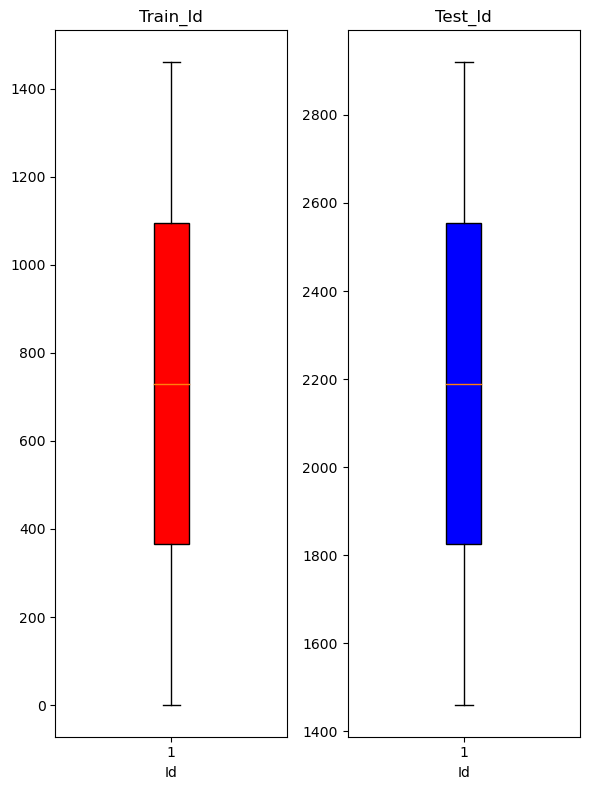

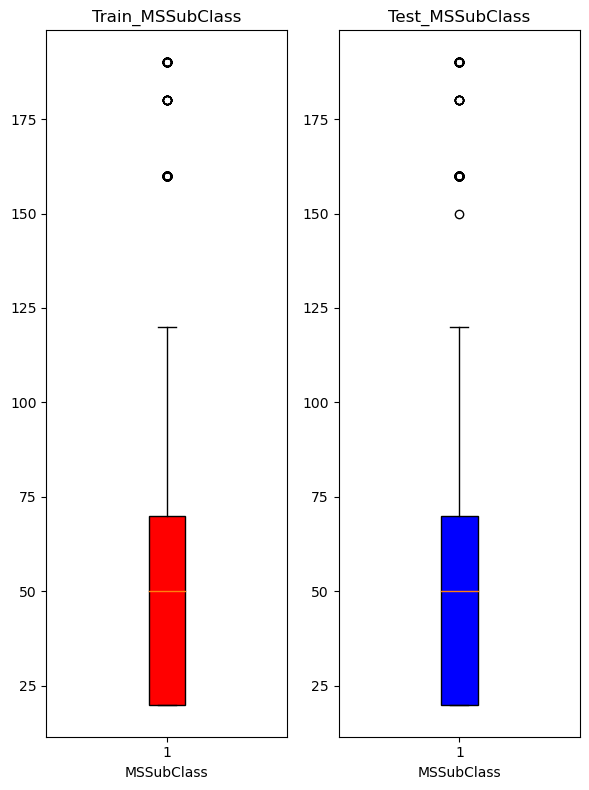

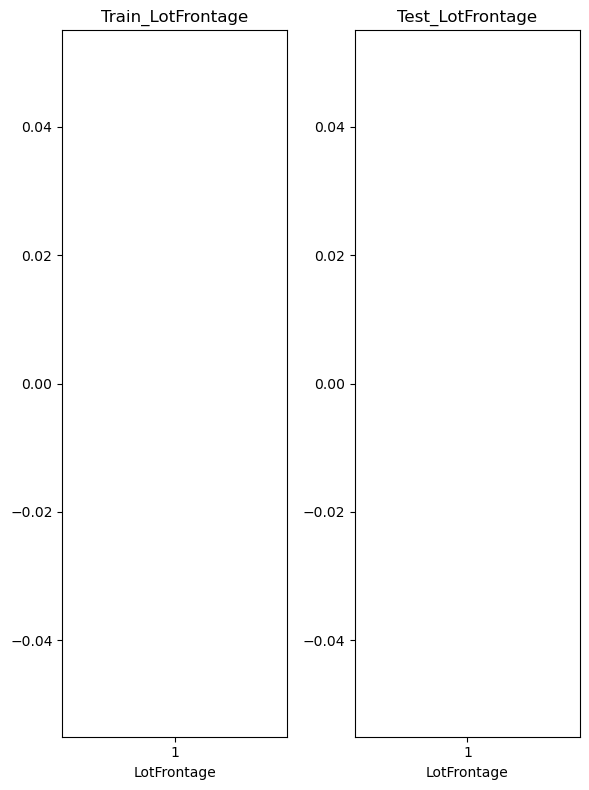

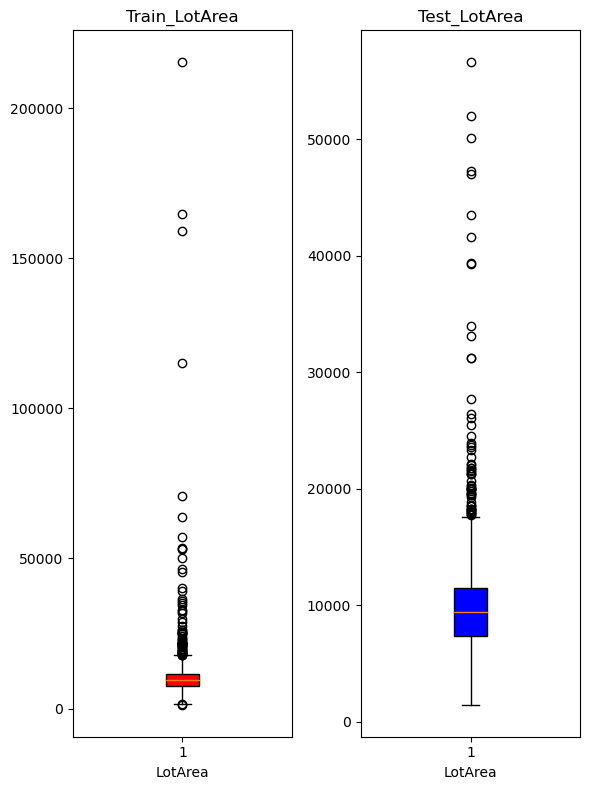

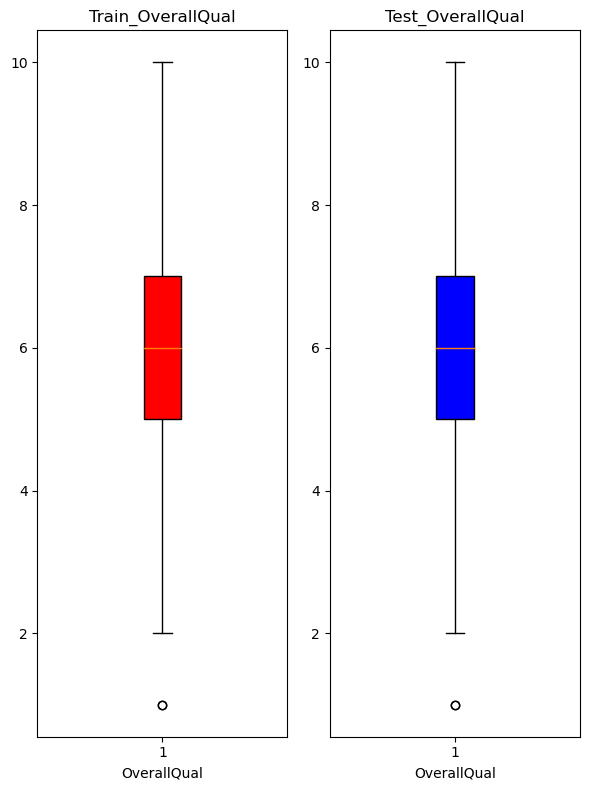

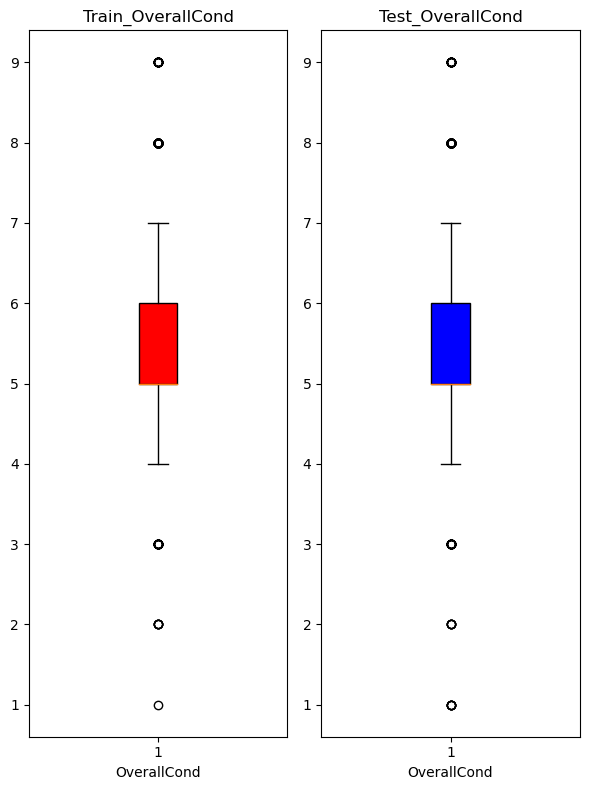

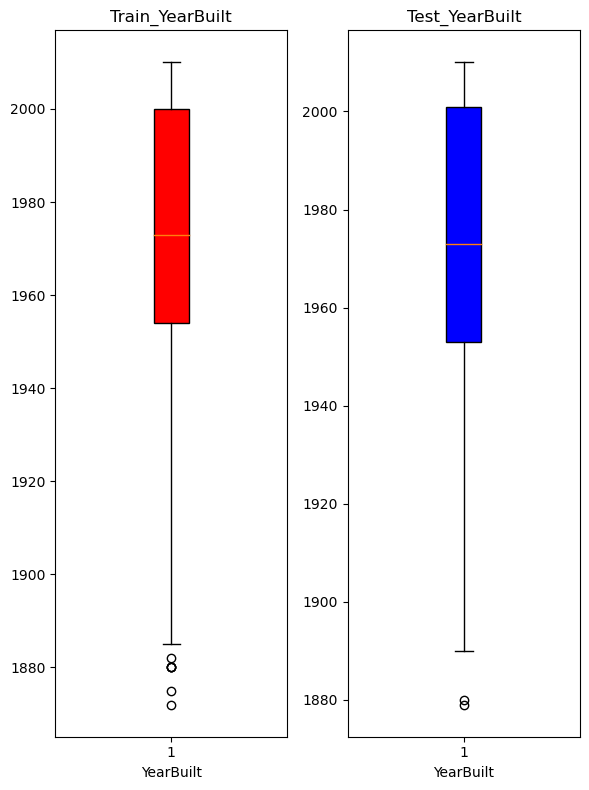

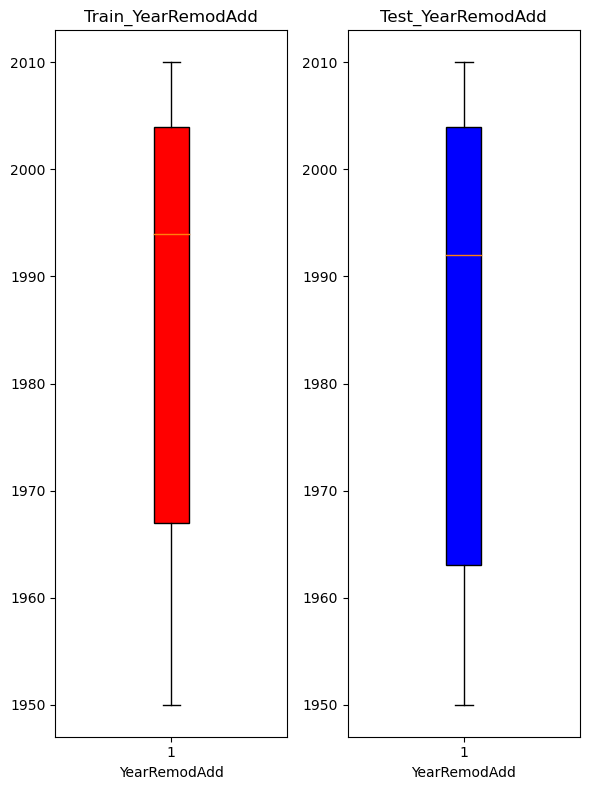

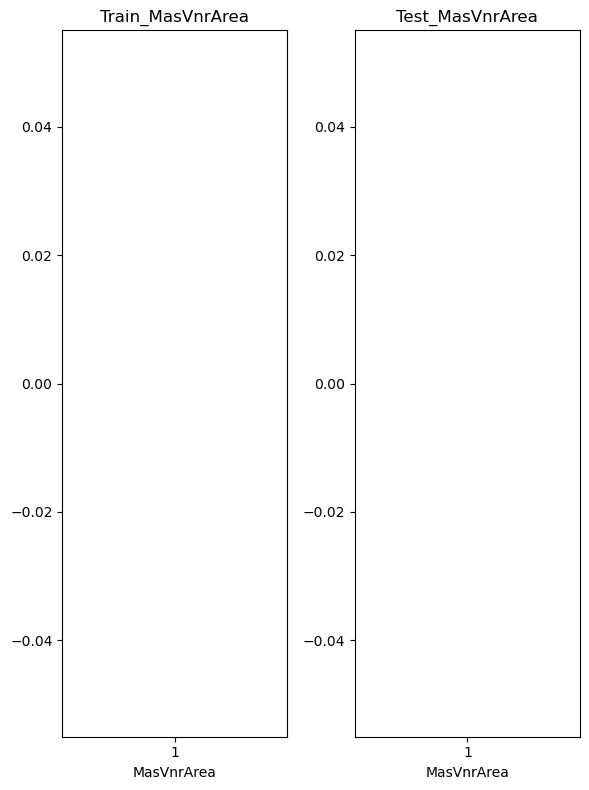

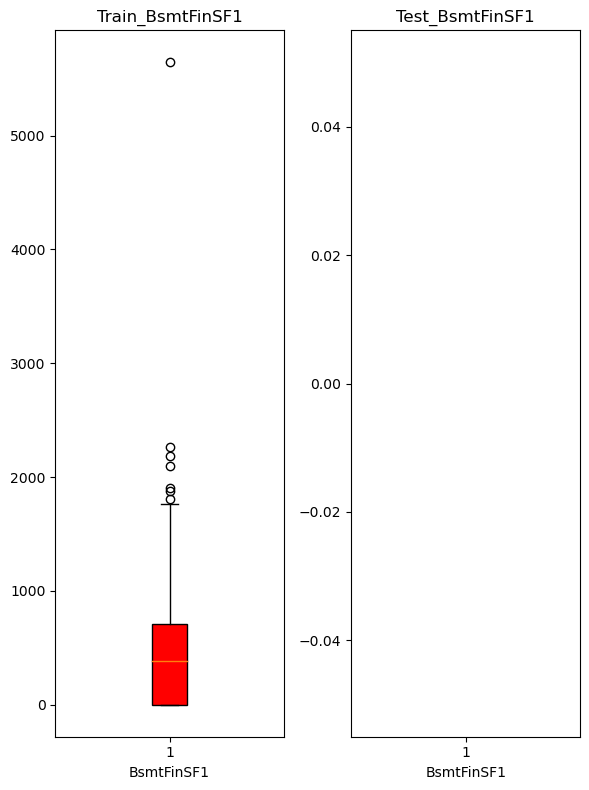

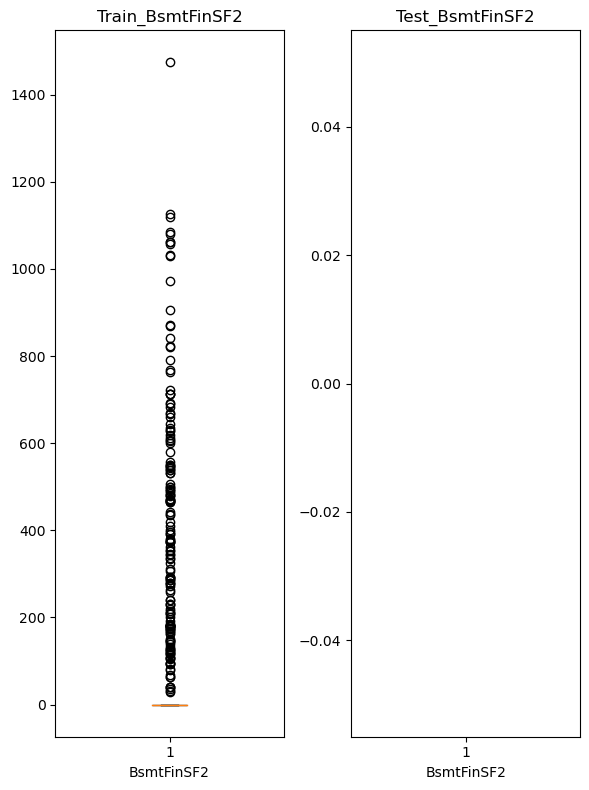

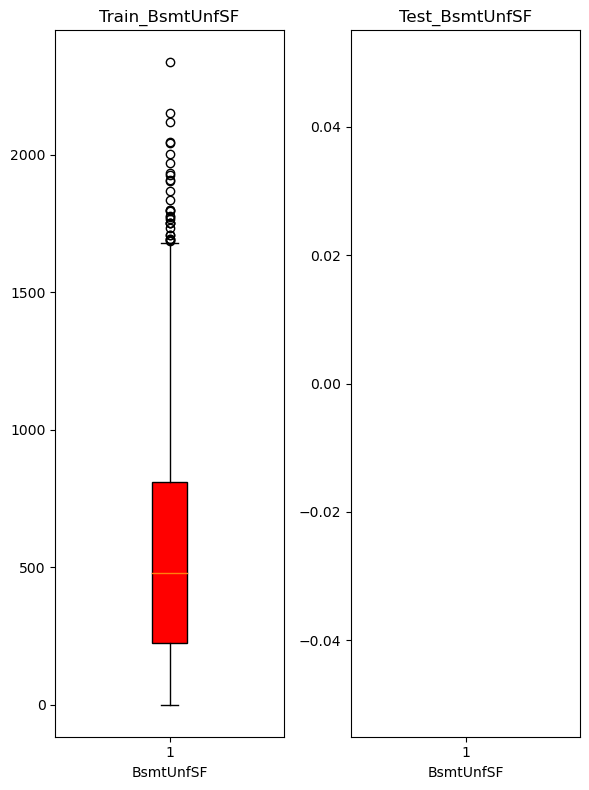

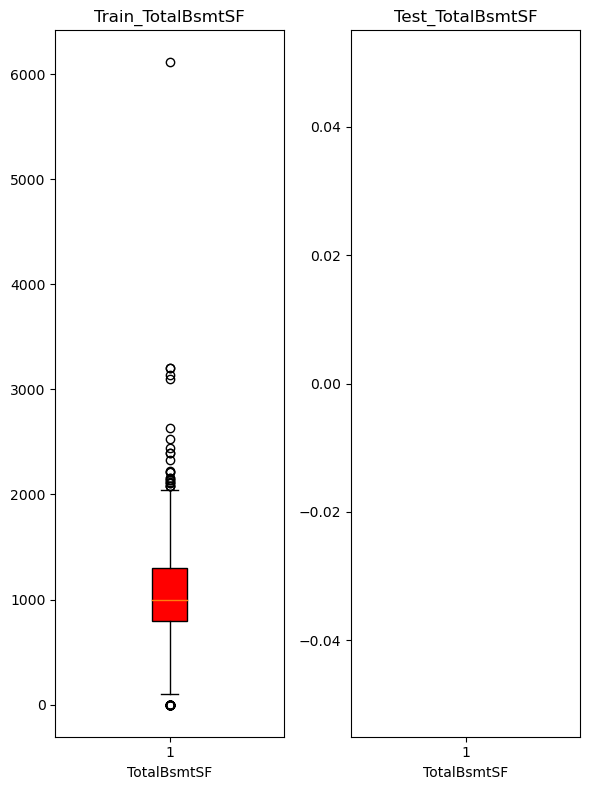

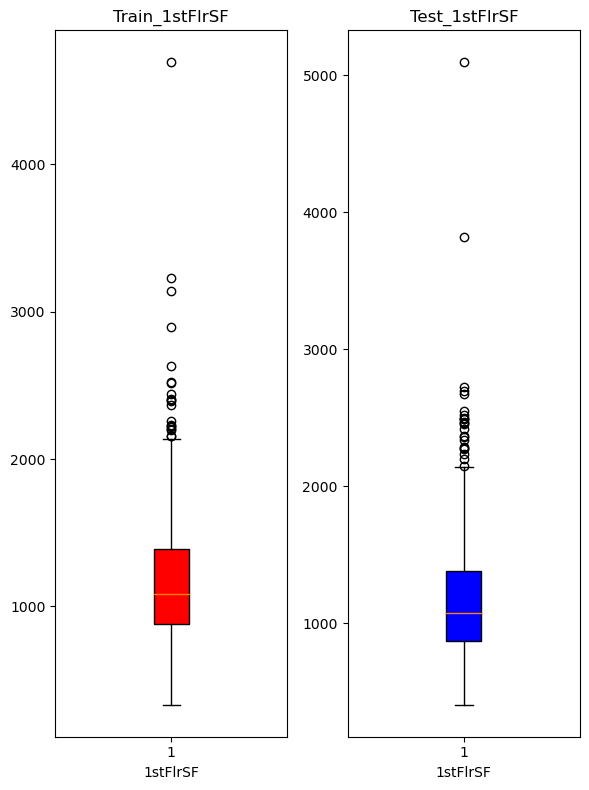

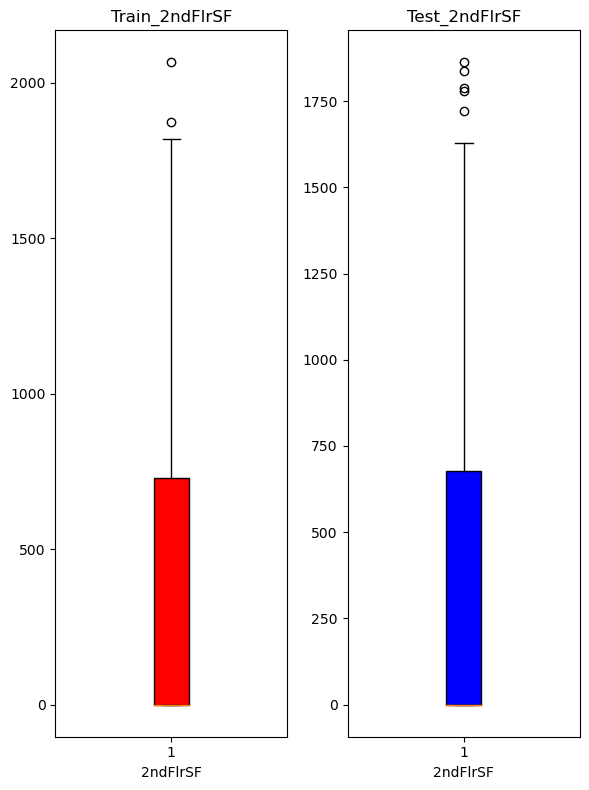

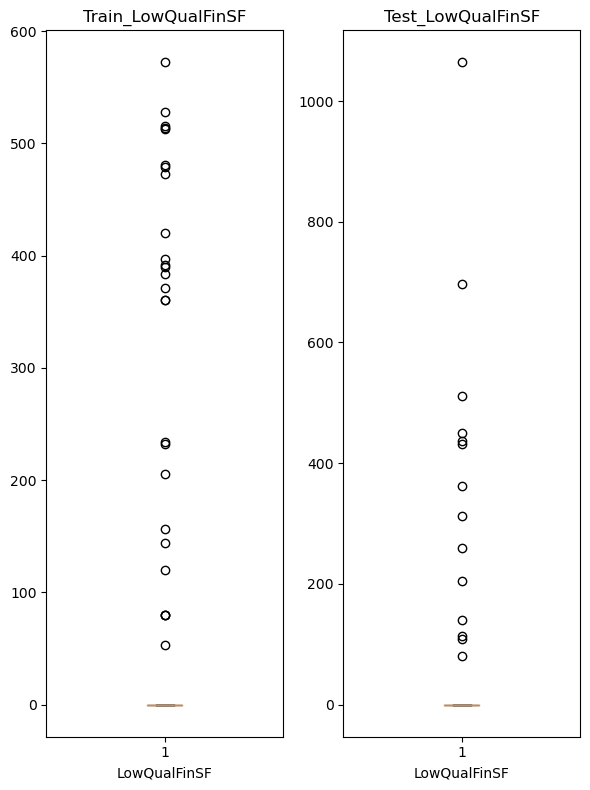

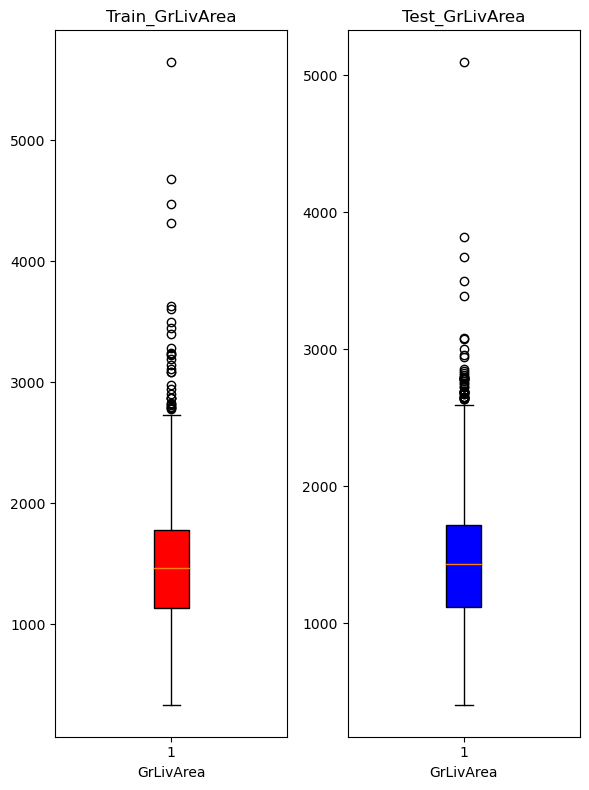

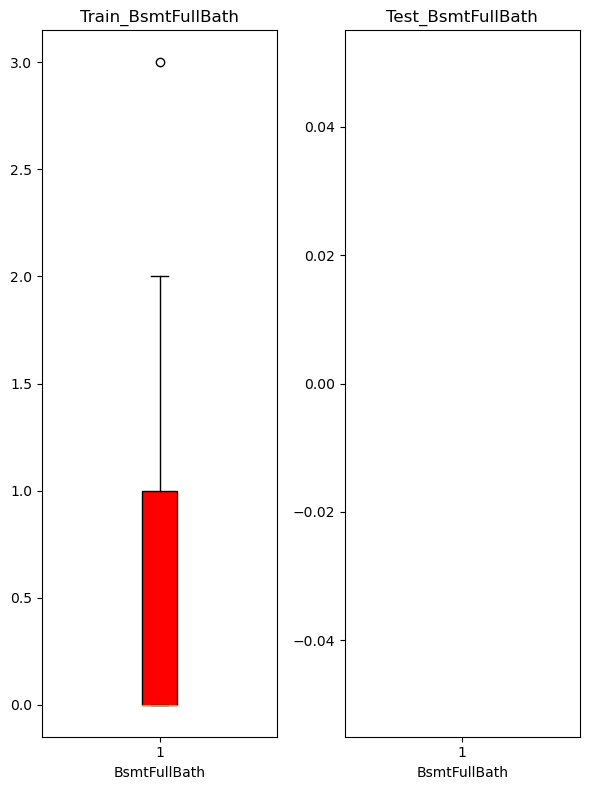

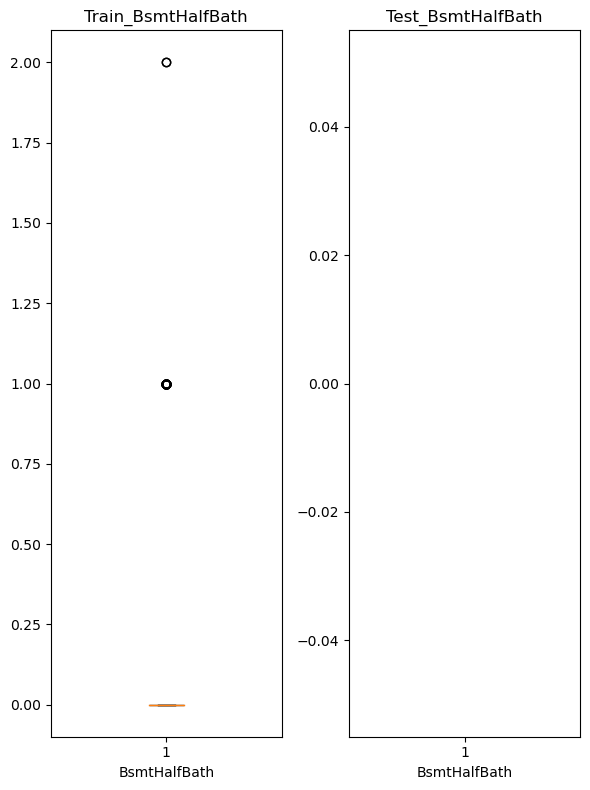

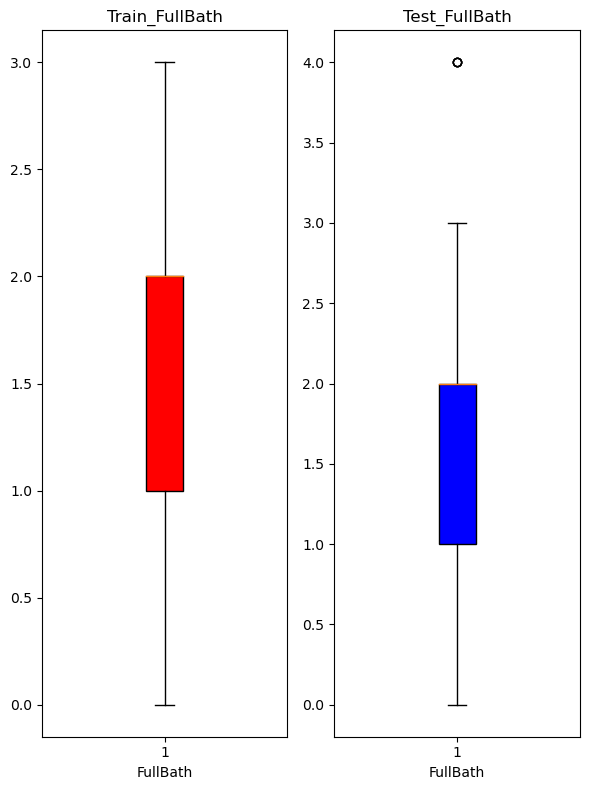

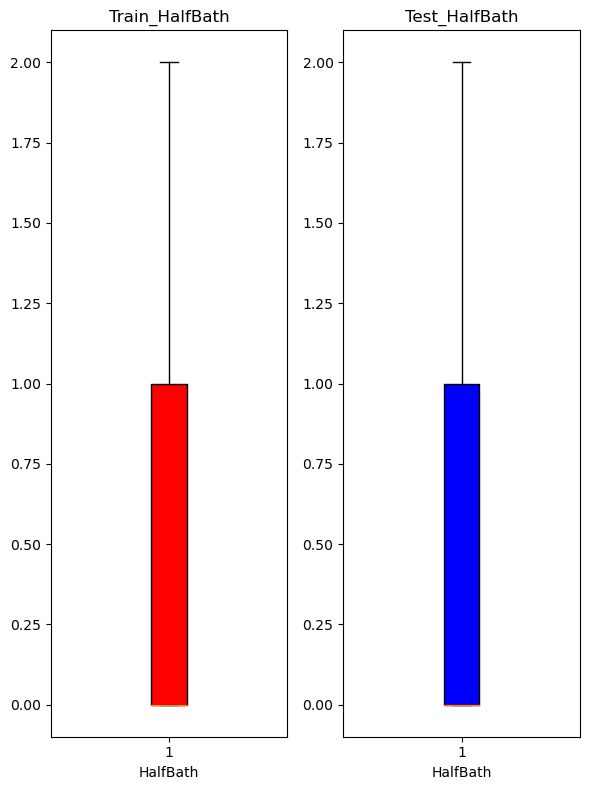

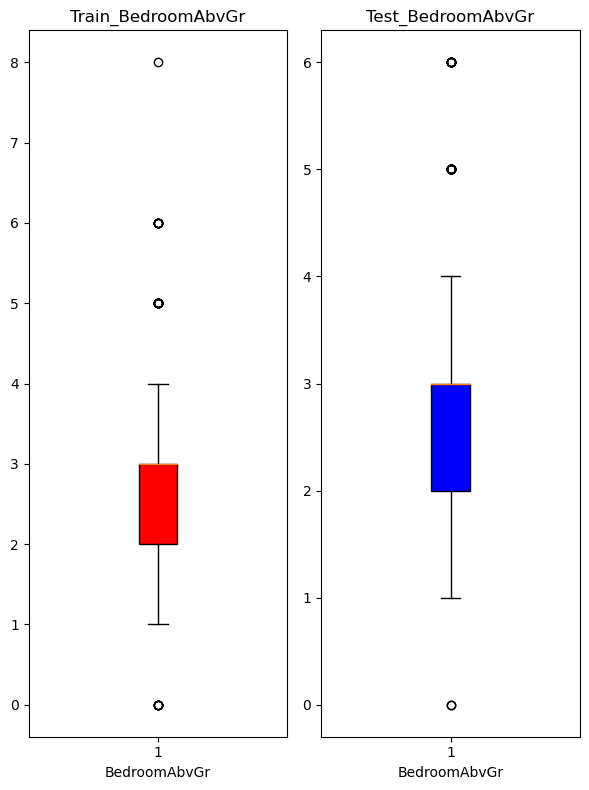

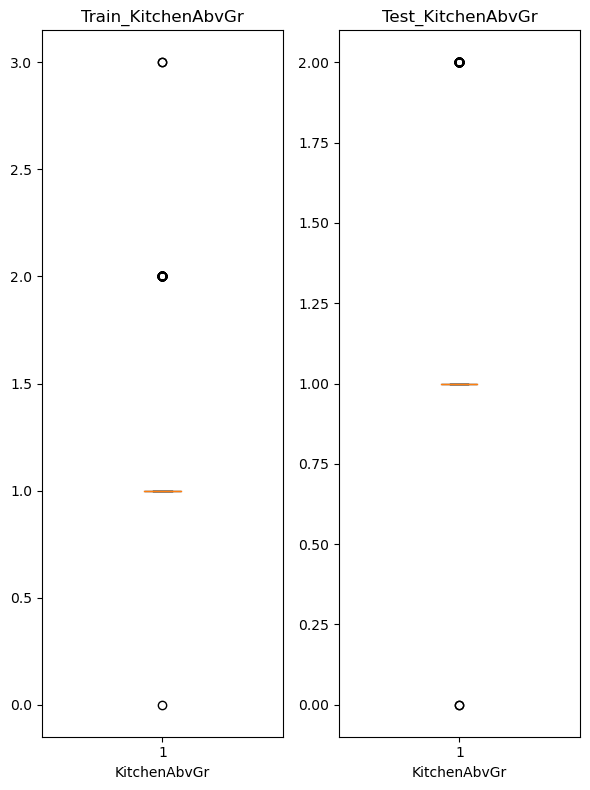

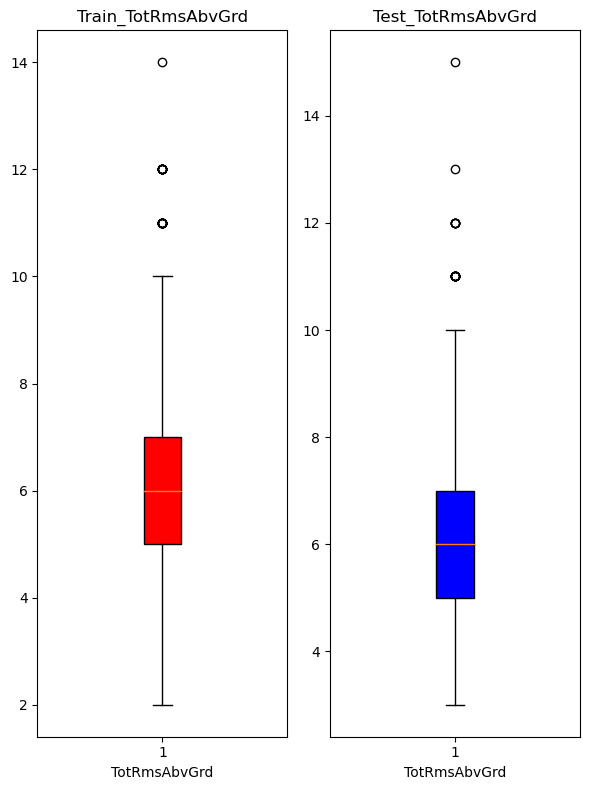

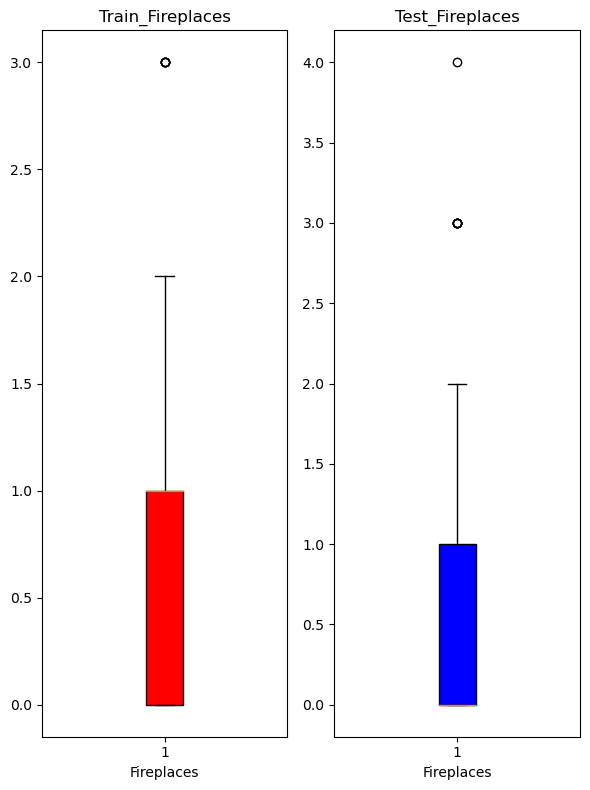

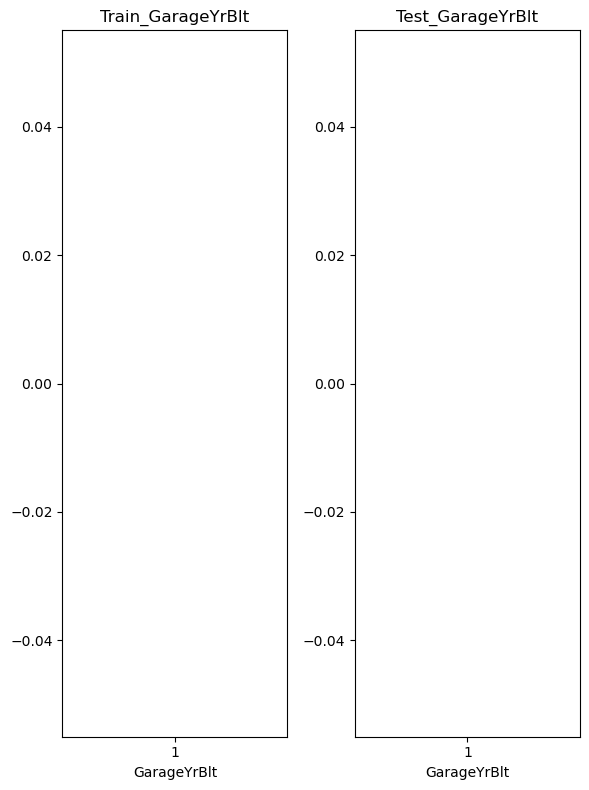

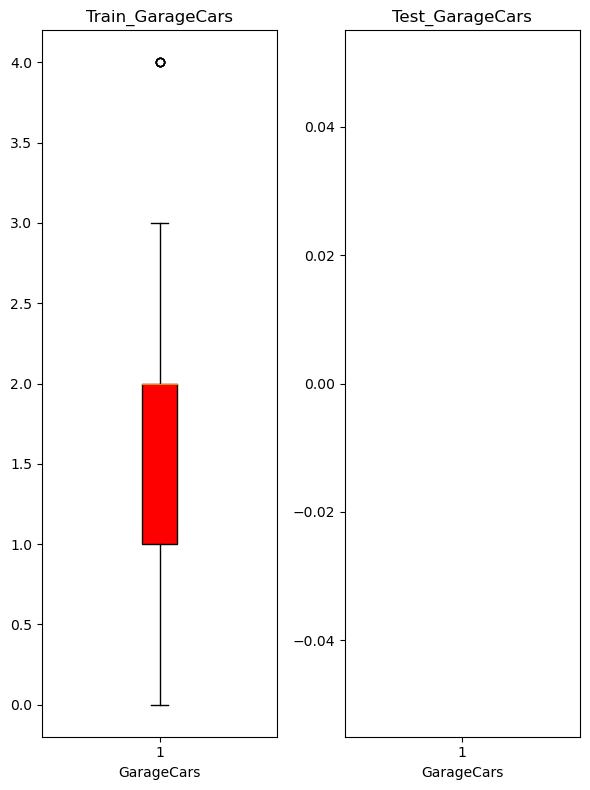

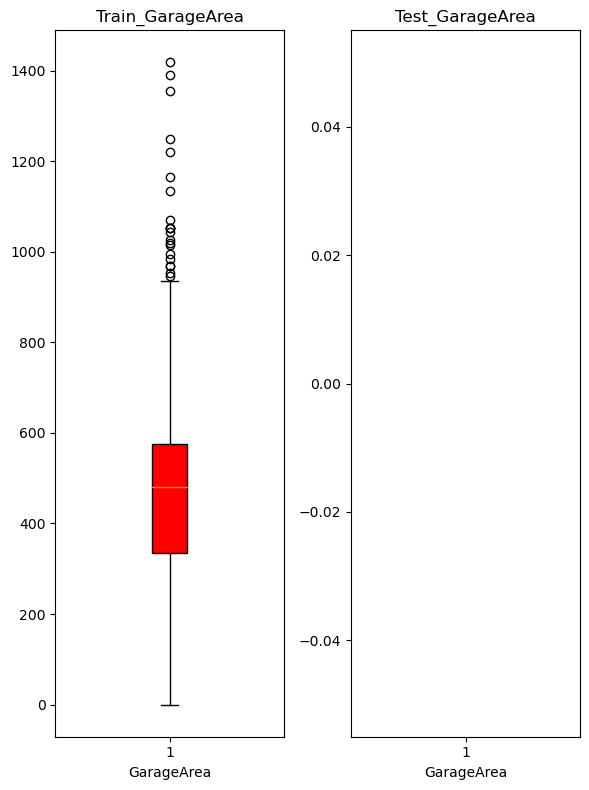

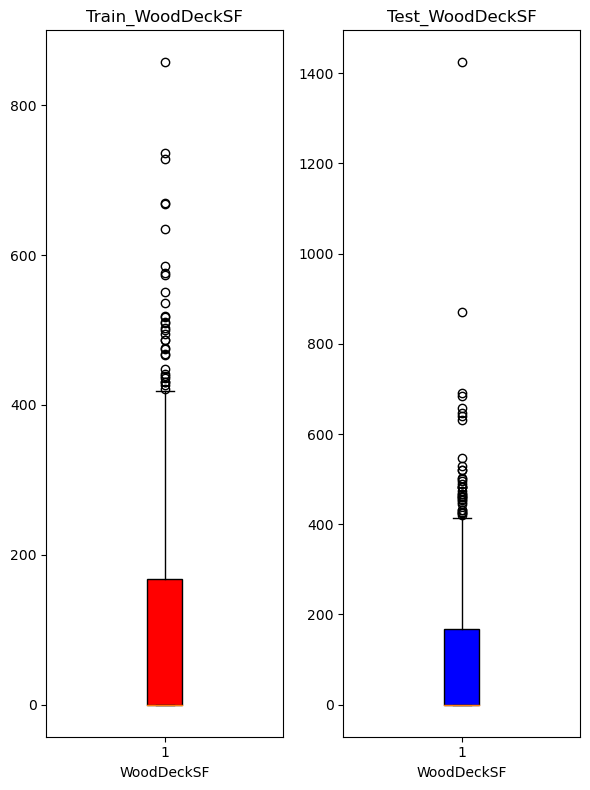

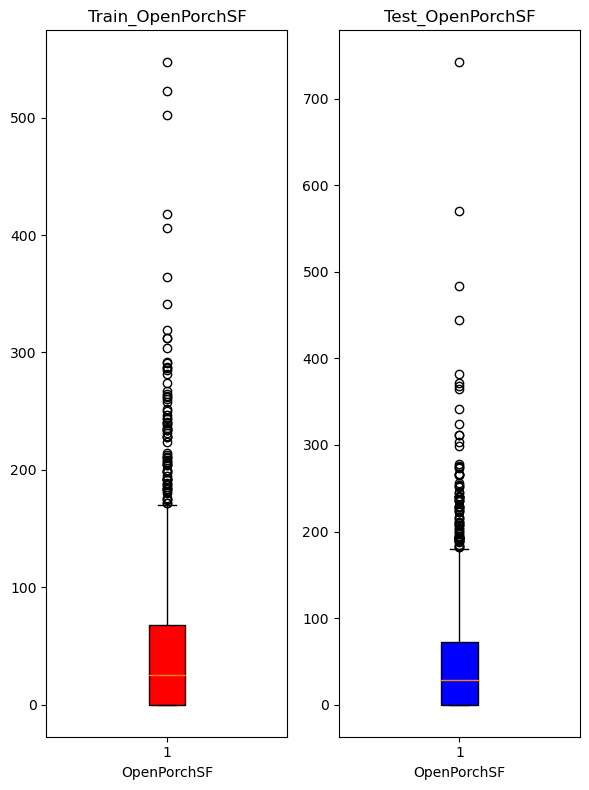

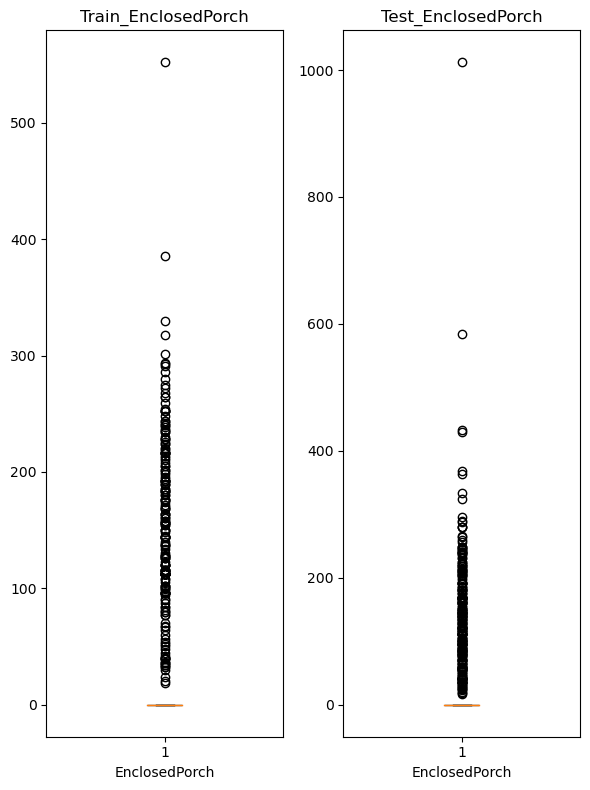

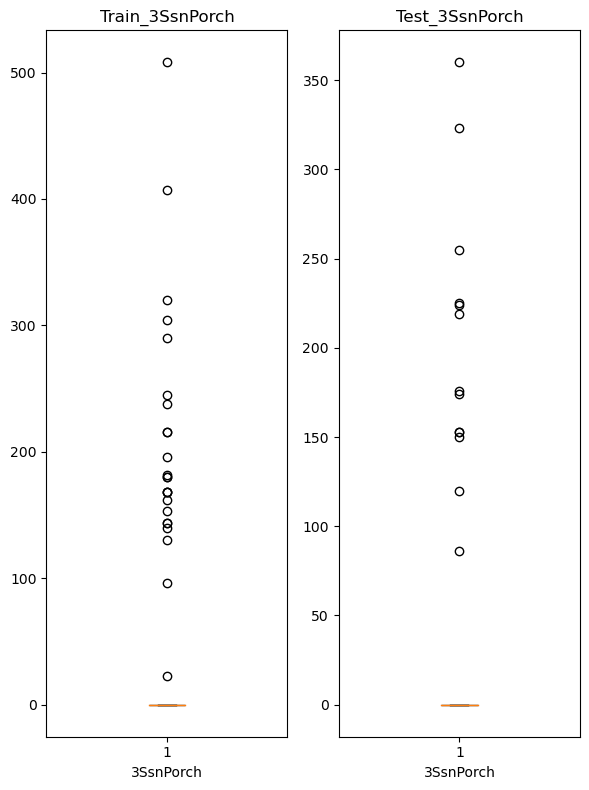

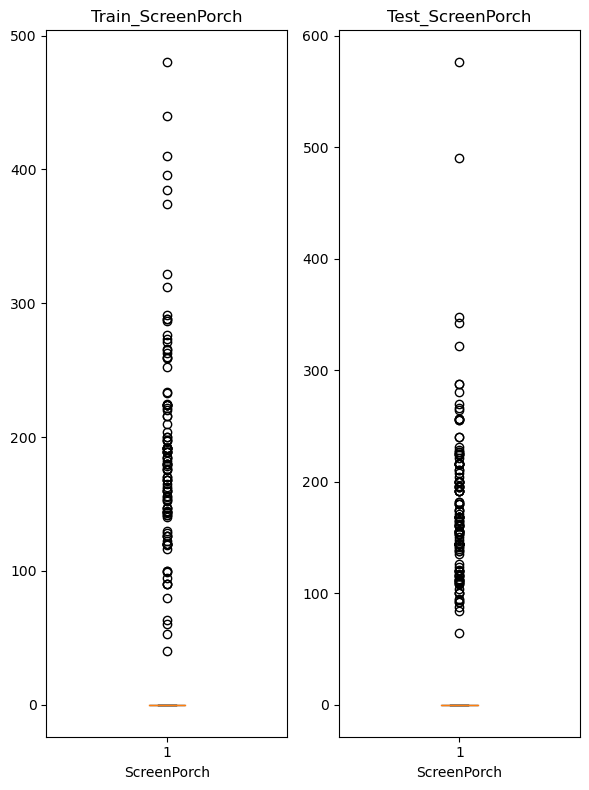

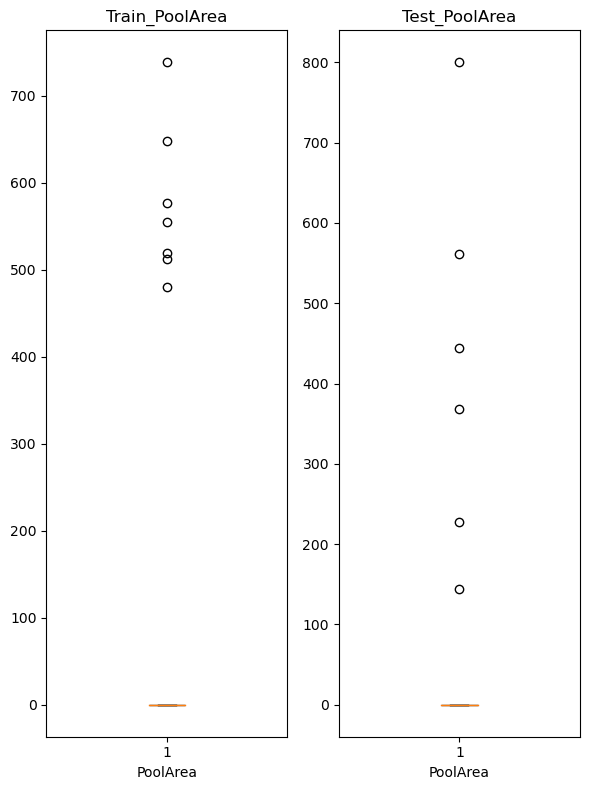

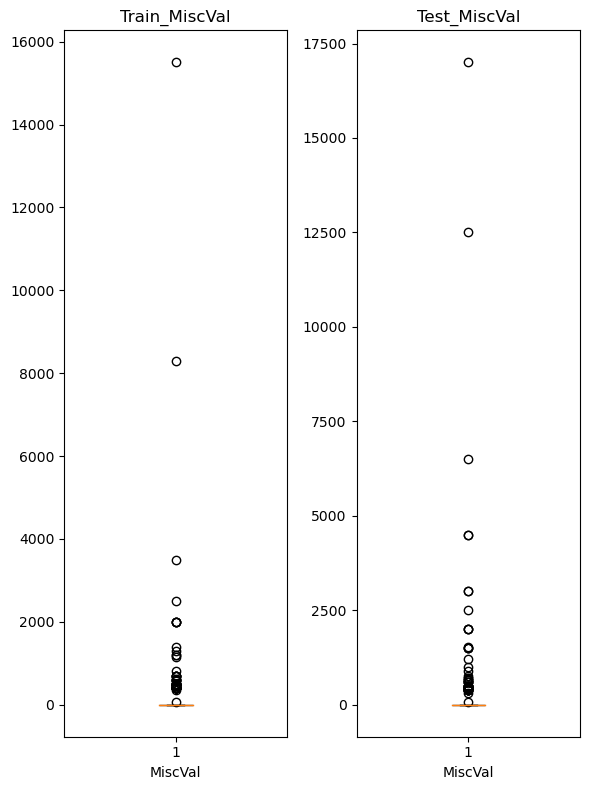

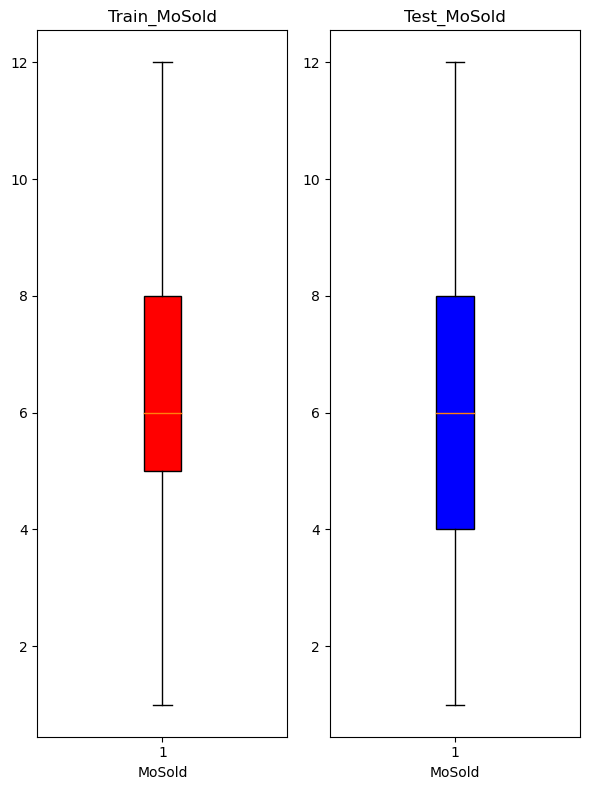

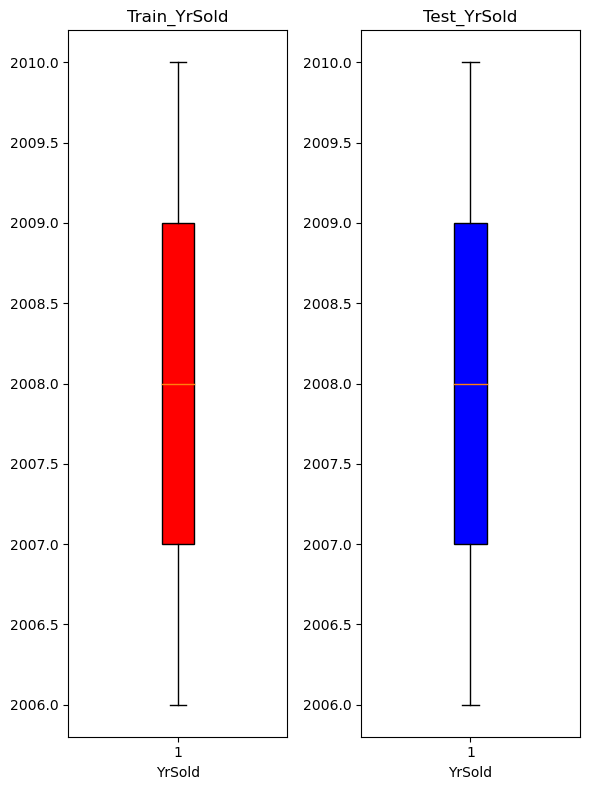

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in num_cols:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 8))

    # Plot data on the first subplot
    ax1.boxplot(x=train[col],patch_artist=True, boxprops=dict(facecolor="r"))
    ax1.set_xlabel(col)
    ax1.set_title('Train_'+col)

    # Plot data on the second subplot
    ax2.boxplot(x=test[col],patch_artist=True, boxprops=dict(facecolor="b"))
    ax2.set_xlabel(col)
    ax2.set_title('Test_'+col)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the figure
    plt.show()


In the below part I looked data one by one to find best condition for outliers.

In [15]:
cond=2000
col="MiscVal"
print("Train data has\n "+str(train[train[col]>cond].shape[0])+"\n****************")
print("Test data has \n"+str(test[test[col]>cond].shape[0])+"")


Train data has
 4
****************
Test data has 
8


The columns below weren't shown in the test data part of previous graph. Thus I will look these columns only in train dataset.

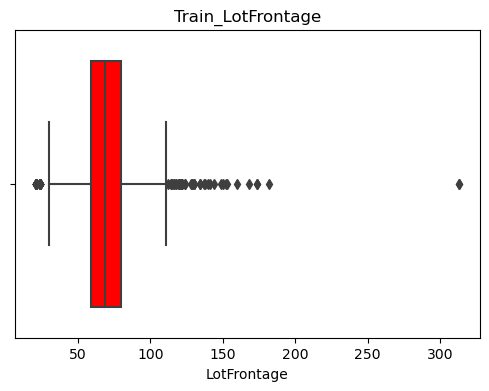

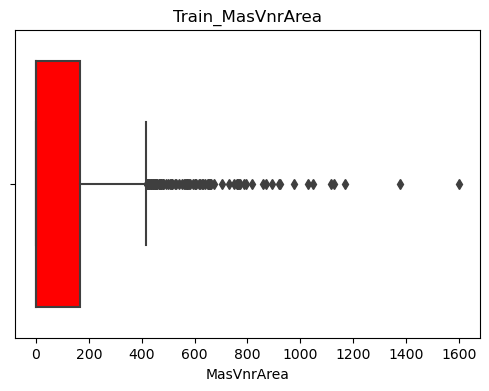

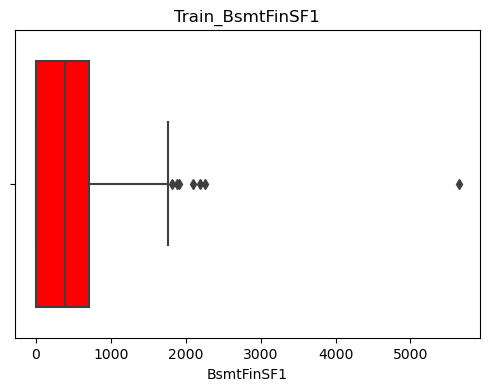

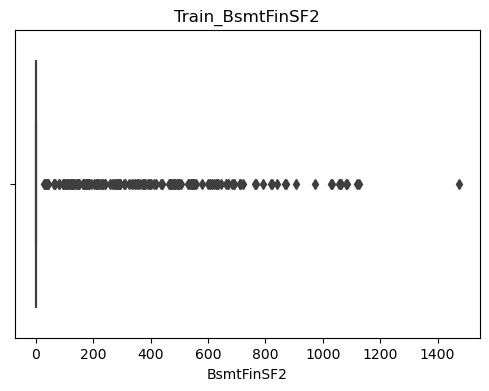

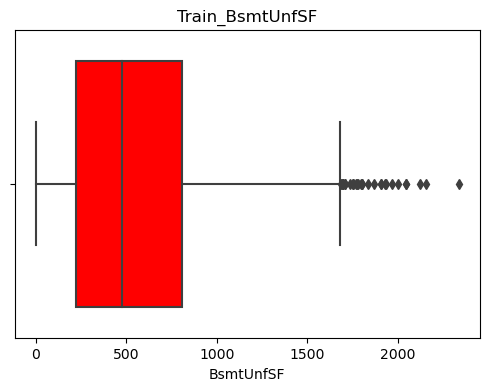

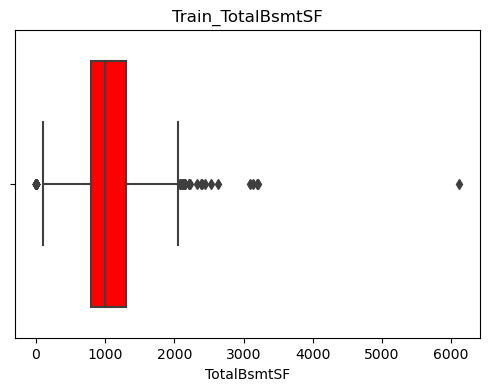

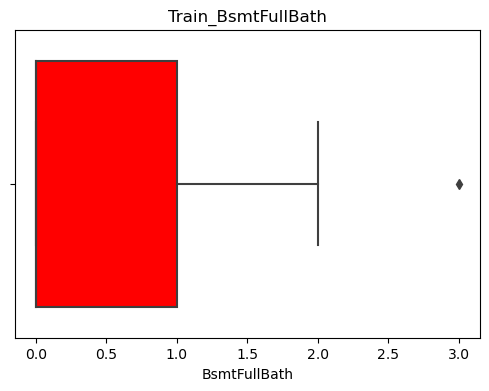

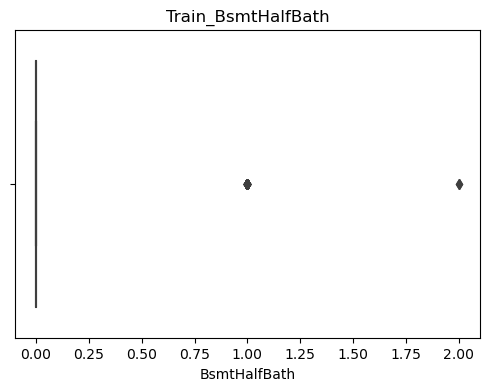

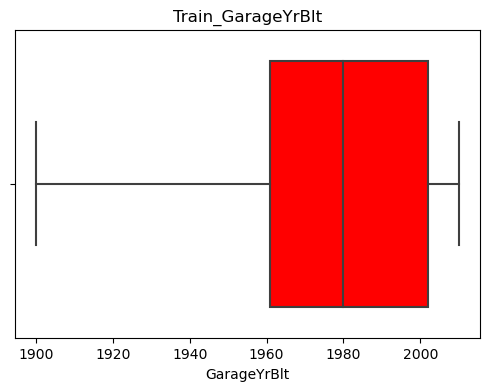

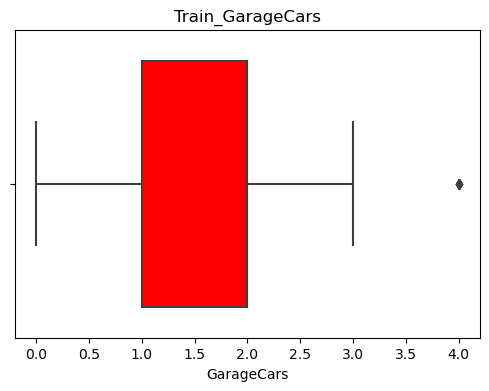

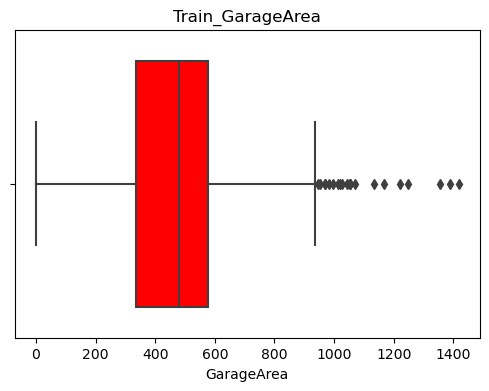

In [16]:
#LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinŞF2, BşmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageYrBuilt, GarageCars, GarageArea
cant_seen=["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageYrBlt","GarageCars","GarageArea"]
for col in cant_seen:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[col], boxprops=dict(facecolor="r"))
    plt.title("Train_"+col)

In the below part I looked data one by one to find best condition for outliers.

In [17]:
cond=1100
col="GarageArea"
print("Train data has\n "+str(train[train[col]>cond].shape[0])+"\n****************")
print("Test data has \n"+str(test[test[col]>cond].shape[0])+"")


Train data has
 7
****************
Test data has 
12


> Removing outliers

In [18]:

new_train = train[(train["LotFrontage"]<160) & # MSSubclass is numeric but has categoric meaning , we can understand that by looking desription.
              (train["LotArea"]<50000) & 
              (train["OverallQual"]>2) & 
              (train["OverallCond"]>2) &
              (train["YearBuilt"]>=1885) &
              (train["MasVnrArea"]<900) & 
              (train["BsmtFinSF1"]<2000) & 
              (train["BsmtFinSF2"]<1000) & 
              (train["BsmtUnfSF"]<2200) & 
              (train["TotalBsmtSF"]<3000) & 
              (train["1stFlrSF"]<=2700) & 
              (train["2ndFlrSF"]<1850) & 
              (train["GrLivArea"]<4000) & 
              (train["BsmtFullBath"]<2.5) & 
              (train["BsmtHalfBath"]<1.5) & 
              (train["BedroomAbvGr"]<=5) & 
              (train["KitchenAbvGr"]<2.5) & 
              (train["TotRmsAbvGrd"]<12) & 
              (train["WoodDeckSF"]<=600) & 
              (train["OpenPorchSF"]<350) & 
              (train["EnclosedPorch"]<=300) & 
              (train["3SsnPorch"]<200) & 
              (train["ScreenPorch"]<300) & 
              (train["MiscVal"]<2000) &
              (train["GarageArea"]<1100)
             ]

In [19]:
train.shape

(1460, 81)

In [20]:
new_train.shape

(1101, 81)

360 row deleted

In [21]:
train=new_train

## ***Concating two dataset***

I am merging these two datasets because I want to do the same preprocessing for both of them.

In [22]:
df = pd.concat([train, test], axis=0)  # Concatenating dataframes vertically
df.reset_index(drop=True,inplace=True)

In [23]:
df.shape

(2560, 81)

To see all columns, I am changing settings :

In [24]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Examining Missing values

In [25]:
null_vals=df.isnull().sum()[df.isnull().sum()>0]

In [26]:
print(null_vals)
print("\n\nNumber of columns that has missing values:\t"+str(len(null_vals)))

MSZoning           4
LotFrontage      227
Alley           2378
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          72
BsmtCond          73
BsmtExposure      73
BsmtFinType1      70
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1293
GarageType       135
GarageYrBlt      137
GarageFinish     137
GarageCars         1
GarageArea         1
GarageQual       137
GarageCond       137
PoolQC          2555
Fence           2060
MiscFeature     2480
SaleType           1
SalePrice       1459
dtype: int64


Number of columns that has missing values:	35


In [27]:
miss_cols=null_vals.index.tolist()
miss_counts=null_vals.values.tolist()
for i,col in enumerate(miss_cols):
    print(col+"\nCount of missing value:\t"+str(miss_counts[i])+ "\n\nValue Counts:")
    print(df[col].value_counts())
    print("\nNumber of unique values:\t"+str(df[col].nunique())+"\n")
    print("------------------------------------------------------------")
    

MSZoning
Count of missing value:	4

Value Counts:
RL         1965
RM          423
FV          125
RH           22
C (all)      21
Name: MSZoning, dtype: int64

Number of unique values:	5

------------------------------------------------------------
LotFrontage
Count of missing value:	227

Value Counts:
60.0     268
80.0     132
70.0     130
50.0     113
75.0     100
        ... 
119.0      1
25.0       1
144.0      1
153.0      1
133.0      1
Name: LotFrontage, Length: 123, dtype: int64

Number of unique values:	123

------------------------------------------------------------
Alley
Count of missing value:	2378

Value Counts:
Grvl    112
Pave     70
Name: Alley, dtype: int64

Number of unique values:	2

------------------------------------------------------------
Utilities
Count of missing value:	2

Value Counts:
AllPub    2558
Name: Utilities, dtype: int64

Number of unique values:	1

------------------------------------------------------------
Exterior1st
Count of missing value:	1

V

In [28]:
#before filling data I want to look which column I should use
temp=pd.DataFrame(abs(df.corr()["SalePrice"]).sort_values(ascending=False))
temp.columns=["SalePriceCorr"]
temp["Number_of_unique_vals"]=[int(df[col].nunique()) for col in temp.T.columns] #Number of unique values
temp["Missing_vals"]=[df[col].isnull().sum() for col in temp.T.columns] # how much missing data is in the column
temp["Most_common_val"]=[df[col].value_counts().index.tolist()[0] for col in temp.T.columns] # The most repeated value
temp["Count_of_com_val"]=[df[col].value_counts().values.tolist()[0] for col in temp.T.columns] #How much that values exist?
temp["Percentage_of_common_value (%) "]=temp["Count_of_com_val"]*(100/df.shape[0])
temp

SalePriceCorr  Number_of_unique_vals  Missing_vals  \
SalePrice           1.000000                    544          1459   
OverallQual         0.814812                     10             0   
GrLivArea           0.723518                   1186             0   
GarageCars          0.669474                      6             1   
TotalBsmtSF         0.654535                    987             1   
GarageArea          0.652077                    565             1   
1stFlrSF            0.624188                   1018             0   
YearBuilt           0.604953                    113             0   
FullBath            0.595527                      5             0   
YearRemodAdd        0.552485                     61             0   
TotRmsAbvGrd        0.545101                     12             0   
GarageYrBlt         0.544655                    103           137   
MasVnrArea          0.492775                    405            15   
Fireplaces          0.462502                      5             0   
BsmtFinSF1          0.388692                    912             1   
LotArea             0.378065                   1709             0   
OpenPorchSF         0.374952                    235             0   
WoodDeckSF          0.369884                    343             0   
LotFrontage         0.355333                    123           227   
2ndFlrSF            0.273109                    570             0   
HalfBath            0.266950                      3             0   
BsmtUnfSF           0.239766                   1069             1   
BsmtFullBath        0.235079                      4             2   
BedroomAbvGr        0.195591                      7             0   
EnclosedPorch       0.194074                    168             0   
OverallCond         0.161294                      9             0   
KitchenAbvGr        0.144256                      3             0   
MSSubClass          0.093580                     16             0   
MoSold              0.089092                     12             0   
BsmtFinSF2          0.082230                    236             1   
LowQualFinSF        0.076352                     28             0   
MiscVal             0.073751                     32             0   
ScreenPorch         0.073170                    106             0   
BsmtHalfBath        0.050062                      3             2   
3SsnPorch           0.044034                     21             0   
Id                  0.041033                   2560             0   
YrSold              0.022419                      5             0   
PoolArea            0.000657                      9             0   

               Most_common_val  Count_of_com_val  \
SalePrice             140000.0                18   
OverallQual                5.0               740   
GrLivArea                864.0                39   
GarageCars                 2.0              1369   
TotalBsmtSF                0.0                69   
GarageArea                 0.0               135   
1stFlrSF                 864.0                44   
YearBuilt               2005.0               141   
FullBath                   2.0              1334   
YearRemodAdd            1950.0               330   
TotRmsAbvGrd               6.0               767   
GarageYrBlt             2005.0               141   
MasVnrArea                 0.0              1549   
Fireplaces                 0.0              1293   
BsmtFinSF1                 0.0               838   
LotArea                 7200.0                43   
OpenPorchSF                0.0              1142   
WoodDeckSF                 0.0              1345   
LotFrontage               60.0               268   
2ndFlrSF                   0.0              1470   
HalfBath                   0.0              1633   
BsmtUnfSF                  0.0               206   
BsmtFullBath               0.0              1519   
BedroomAbvGr               3.0              1406   
EnclosedPorch          

If there is small size missing value I will fill by mode of the column else I will examine the column. 

In [29]:
for col in temp.loc[(temp["Missing_vals"]<25) & (temp["Missing_vals"]>0)].T.columns:
    df[col].fillna(temp.loc[col,"Most_common_val"],inplace=True)
    print(col+" filled by \t:"+str(temp.loc[col,"Most_common_val"]))
    
    

GarageCars filled by 	:2.0
TotalBsmtSF filled by 	:0.0
GarageArea filled by 	:0.0
MasVnrArea filled by 	:0.0
BsmtFinSF1 filled by 	:0.0
BsmtUnfSF filled by 	:0.0
BsmtFullBath filled by 	:0.0
BsmtFinSF2 filled by 	:0.0
BsmtHalfBath filled by 	:0.0


## Garage data

In [30]:
print(df.loc[df["GarageYrBlt"].isnull(),"GarageType":"GarageCond"].sample(5))
print("\n--------------------------------------------------------------\n")
print("Missing values of that column:\n\n")
print(df.loc[df["GarageYrBlt"].isnull(),"GarageType":"GarageCond"].isnull().sum())

     GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
1362        NaN          NaN          NaN         0.0         0.0        NaN   
738         NaN          NaN          NaN         0.0         0.0        NaN   
1831        NaN          NaN          NaN         0.0         0.0        NaN   
1199        NaN          NaN          NaN         0.0         0.0        NaN   
1830        NaN          NaN          NaN         0.0         0.0        NaN   

     GarageCond  
1362        NaN  
738         NaN  
1831        NaN  
1199        NaN  
1830        NaN  

--------------------------------------------------------------

Missing values of that column:


GarageType      135
GarageYrBlt     137
GarageFinish    137
GarageCars        0
GarageArea        0
GarageQual      137
GarageCond      137
dtype: int64


As I see this houses, has no garage so I could not sure about how to fill that so I will fill by median of the column.

In [31]:
garage=["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]
for col in garage:
    print(col)
    print(df[col].value_counts())
    print("\n")

GarageType
Attchd     1494
Detchd      711
BuiltIn     155
Basment      31
2Types       21
CarPort      13
Name: GarageType, dtype: int64


GarageYrBlt
2005.0    141
2006.0    111
2007.0    108
2004.0     91
2003.0     79
         ... 
1896.0      1
1895.0      1
2207.0      1
1943.0      1
1919.0      1
Name: GarageYrBlt, Length: 103, dtype: int64


GarageFinish
Unf    1100
RFn     707
Fin     616
Name: GarageFinish, dtype: int64


GarageCars
2.0    1370
1.0     708
3.0     333
0.0     135
4.0      13
5.0       1
Name: GarageCars, dtype: int64


GarageArea
0.0       136
440.0      87
576.0      82
240.0      64
528.0      59
         ... 
363.0       1
209.0       1
1017.0      1
741.0       1
714.0       1
Name: GarageArea, Length: 565, dtype: int64


GarageQual
TA    2281
Fa     116
Gd      20
Po       4
Ex       2
Name: GarageQual, dtype: int64


GarageCond
TA    2329
Fa      70
Gd      11
Po      10
Ex       3
Name: GarageCond, dtype: int64




Since this houses has no garage, I filled these columns by looking description of data. 

In [32]:
df["GarageType"].fillna("NA",inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
df["GarageFinish"].fillna("NA",inplace=True)
df["GarageCars"].fillna(0,inplace=True)
df["GarageArea"].fillna(0,inplace=True)
df["GarageQual"].fillna("NA",inplace=True)
df["GarageCond"].fillna("NA",inplace=True)

## LotFrontage data


LotFrontage: Linear feet of street connected to property

In [33]:
df[df["LotFrontage"].isnull()].sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1278  1638          60       RL          NaN    13250   Pave   NaN      IR1   
2131  2491          20       RL          NaN     9000   Pave   NaN      Reg   
1526  1886          20       RL          NaN    12782   Pave   NaN      Reg   
2480  2840          20       RL          NaN     8685   Pave   NaN      IR1   
1284  1644          60       FV          NaN     8470   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1278         Lvl    AllPub    Inside       Gtl       NWAmes       RRNn   
2131         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1526         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2480         Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
1284         Lvl    AllPub    Corner       Gtl      Somerst       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1278       Norm     1Fam     2Story            7            6       1978   
2131       Norm     1Fam     1Story            4            7       1945   
1526       Norm     1Fam     1Story            8            5       2002   
2480       Norm     1Fam     1Story            7            5       1998   
1284       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1278          1978     Gable  CompShg     HdBoard     HdBoard    BrkFace   
2131          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1526          2003       Hip  CompShg     HdBoard     HdBoard    BrkFace   
2480          1998     Gable  CompShg     VinylSd     VinylSd       None   
1284          2002     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1278       256.0        TA        TA     CBlock       Gd       TA   
2131         0.0        Fa        TA       Slab      NaN      NaN   
1526       164.0        Gd        TA      PConc       Ex       TA   
2480         0.0        TA        TA      PConc       Gd       TA   
1284         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1278           No          Unf         0.0          Unf         0.0   
2131          NaN          NaN         0.0          NaN         0.0   
1526           Gd          GLQ      1360.0          Unf         0.0   
2480           Mn          GLQ       846.0          Unf         0.0   
1284           No          GLQ       225.0          ALQ       276.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1278      832.0        832.0    GasA        TA          Y      SBrkr   
2131        0.0          0.0    GasA        TA          N      FuseA   
1526      462.0       1822.0    GasA        Ex          Y      SBrkr   
2480      579.0       1425.0    GasA        Ex          Y      SBrkr   
1284      471.0        972.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1278      1154       896             0       2050           0.0           0.0   
2131       998         0             0        998           0.0           0.0   
1526      1828         0             0       1828           1.0           0.0   
2480      1425         0             0       1425           1.0           0.0   
1284       972       839             0       1811           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1278         2         1             4             1          Gd   
2131         1         0             3             1          TA   
1526         2         0             3             1          Gd   
2480         2         0             3             1          TA   
1284         2         1             3             1          Gd   

   

It is a numeric column so I will fill it by looking at the most correlated column.

In [34]:
abs(df.corr()["LotFrontage"]).sort_values(ascending=False)[:5]

LotFrontage    1.000000
LotArea        0.609102
MSSubClass     0.447117
1stFlrSF       0.430797
GarageArea     0.356037
Name: LotFrontage, dtype: float64

**LotArea** is the most corelated column.

Lets plot it !

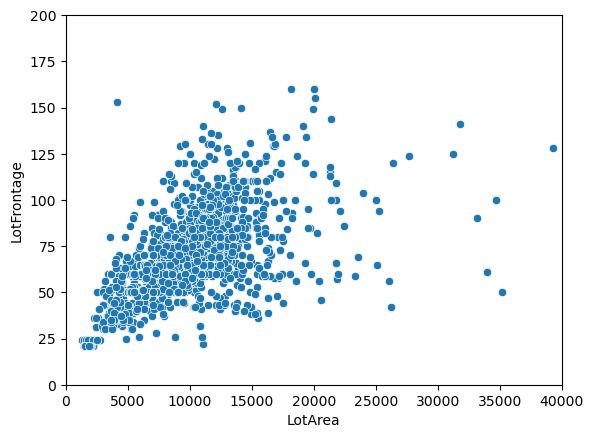

In [35]:
sns.scatterplot(data=df,x="LotArea",y="LotFrontage")
plt.gca().set_xlim([0, 40000])  # limit x-axis to values between 0 and 10000
plt.gca().set_ylim([0, 200])  # limit y-axis to values between 0 and 100
plt.show()

It has almost linear relation, at least we can say that if we increase LotArea, LotFrontage is also increasing.

Since there is too diffrent value in LotArea so I will just round that column 

In [36]:
ex_area=df["LotArea"]
df["LotArea"]=df["LotArea"].apply(lambda x: round(x/1000)*1000)

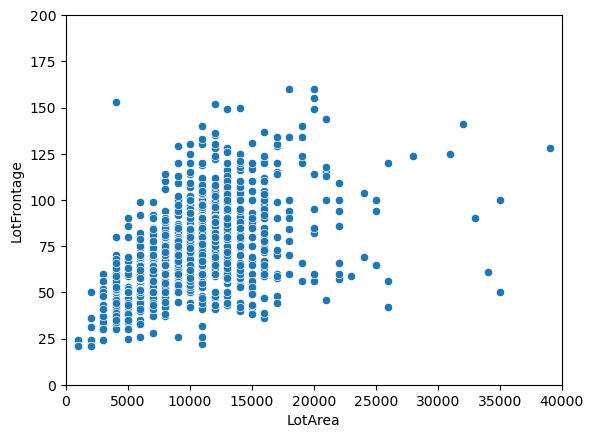

In [37]:
sns.scatterplot(data=df,x="LotArea",y="LotFrontage")
plt.gca().set_xlim([0, 40000])  # limit x-axis to values between 0 and 10000
plt.gca().set_ylim([0, 200])  # limit y-axis to values between 0 and 100
plt.show()

In [38]:
df["LotFrontage"].fillna(df.groupby("LotArea")["LotFrontage"].transform("mean"),inplace=True)

In [39]:
df["LotArea"]=ex_area

In [40]:
df[df["LotFrontage"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1891  2251          70      NaN          NaN    56600   Pave   NaN      IR1   
2541  2901          20       RL          NaN    50102   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1891         Low    AllPub    Inside       Gtl       IDOTRR       Norm   
2541         Low    AllPub    Inside       Mod       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1891       Norm     1Fam     2.5Unf            5            1       1900   
2541       Norm     1Fam     1Story            6            5       1958   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1891          1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
2541          1958     Gable  Tar&Grv     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1891         0.0        TA        TA     BrkTil       TA       TA   
2541         0.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1891           No          Unf         0.0          Unf         0.0   
2541           Gd          BLQ       909.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1891      686.0        686.0    GasA        Ex          Y      SBrkr   
2541      723.0       1632.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1891      1150       686             0       1836           0.0           0.0   
2541      1650         0             0       1650           1.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1891         2         0             4             1          TA   
2541         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1891             7       Maj1           0         NaN     Detchd       1900.0   
2541             6        Typ           2          Gd     Attchd       1958.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1891          Unf         1.0       288.0         TA         Fa          N   
2541          Unf         2.0       518.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1891           0            0              0          0            0   
2541           0            0              0          0          138   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1891         0    NaN   NaN         NaN        0       1    2008       WD   
2541         0    NaN   NaN         NaN        0       3    2006       WD   

     SaleCondition  SalePrice  
1891        Normal        NaN  
2541        Alloca        NaN

2 values remaining I will fill this values by 1stFlrSF because it is second in the corelation table with LotFrontage

In [41]:
ex_first=df["1stFlrSF"]
df["1stFlrSF"]=df["1stFlrSF"].apply(lambda x: round(x/10)*10)
df["LotFrontage"].fillna(df.groupby("1stFlrSF")["LotFrontage"].transform("mean"),inplace=True)
df["1stFlrSF"]=ex_first

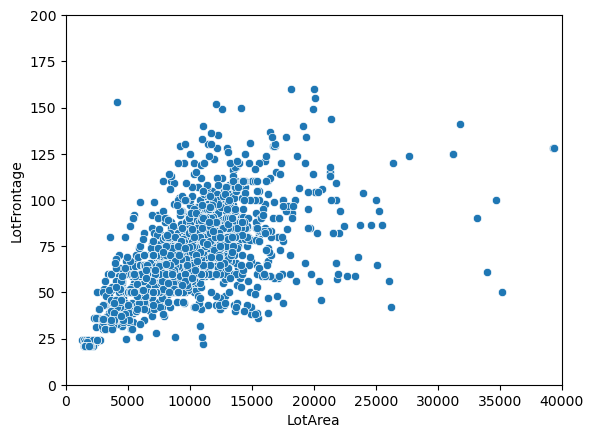

In [42]:
sns.scatterplot(data=df,x="LotArea",y="LotFrontage")
plt.gca().set_xlim([0, 40000])  # limit x-axis to values between 0 and 10000
plt.gca().set_ylim([0, 200])  # limit y-axis to values between 0 and 100
plt.show()

## Object type missing values

Firstly I will look at the columns that has less than 100 missing values

In [43]:
less_null=df.isnull().sum()[(df.isnull().sum()>0)&(df.isnull().sum()<100)]
less_null

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
BsmtQual        72
BsmtCond        73
BsmtExposure    73
BsmtFinType1    70
BsmtFinType2    70
Electrical       1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64

In [44]:
cols=less_null.index.tolist()
for i,col in enumerate(cols):
    print(col)
    print(df[col].value_counts())
    print("\n")
    print("Missing values:\t"+str(less_null[i]))
    print("\n")

MSZoning
RL         1965
RM          423
FV          125
RH           22
C (all)      21
Name: MSZoning, dtype: int64


Missing values:	4


Utilities
AllPub    2558
Name: Utilities, dtype: int64


Missing values:	2


Exterior1st
VinylSd    922
MetalSd    407
HdBoard    373
Wd Sdng    359
Plywood    175
CemntBd    110
BrkFace     73
WdShing     53
AsbShng     39
Stucco      36
BrkComm      6
AsphShn      2
CBlock       2
Stone        1
ImStucc      1
Name: Exterior1st, dtype: int64


Missing values:	1


Exterior2nd
VinylSd    914
MetalSd    406
Wd Sdng    345
HdBoard    340
Plywood    208
CmentBd    112
Wd Shng     73
BrkFace     40
Stucco      39
AsbShng     34
Brk Cmn     22
ImStucc     13
Stone        5
AsphShn      4
CBlock       3
Other        1
Name: Exterior2nd, dtype: int64


Missing values:	1


MasVnrType
None       1551
BrkFace     743
Stone       232
BrkCmn       18
Name: MasVnrType, dtype: int64


Missing values:	16


BsmtQual
TA    1127
Gd    1046
Ex     230
Fa      85
Name

In [45]:
df["MSZoning"].fillna("RL",inplace=True)
# there are only 4 values so I just filled by mode of the column.

df.drop("Utilities",axis=1,inplace=True)
#There is only one value and it is AllPub, in Utilities column. Then I droped.

In [46]:
df[df["Exterior1st"].isnull()]
#same data for Exterior2nd

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1792  2152          30       RL         85.0    19550   Pave   NaN      Reg   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
1792         Lvl    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1792     1Fam     1Story            5            7       1940          2007   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1792      Flat  Tar&Grv         NaN         NaN       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1792        TA        TA      PConc       TA       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1792          ALQ      1035.0          Unf         0.0      545.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1792       1580.0    GasA        Ex          Y      SBrkr      1518         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1792             0       1518           1.0           0.0         1         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1792             2             1          Fa             5        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
1792           2          Gd         NA       1979.0           NA         0.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
1792         0.0         NA         NA          Y           0           39   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  \
1792              0          0            0         0    NaN   NaN   

     MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
1792         NaN        0       1    2008       WD        Normal        NaN

In [47]:
df["Exterior1st"].fillna("VinylSd",inplace=True)
df["Exterior2nd"].fillna("VinylSd",inplace=True)
#there is only one miss value so I just filled by mode of the column.

df["MasVnrType"].fillna("None",inplace=True)
# mode

In [48]:
df["Electrical"].fillna("SBrkr",inplace=True)
df["KitchenQual"].fillna("TA",inplace=True)
df["Functional"].fillna("Typ",inplace=True)
df["SaleType"].fillna("WD",inplace=True)
# these columns had missing values like one or two values so I just filled by mode of the column

**Basement columns**

In [49]:
df.loc[df["BsmtQual"].isnull(),"BsmtQual":"TotalBsmtSF"].sample(10,random_state=1)

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
763       NaN      NaN          NaN          NaN         0.0          NaN   
2093      NaN      NaN          NaN          NaN         0.0          NaN   
409       NaN      NaN          NaN          NaN         0.0          NaN   
2445      NaN      NaN          NaN          NaN         0.0          NaN   
2028      NaN      NaN          NaN          NaN         0.0          NaN   
932       NaN      NaN          NaN          NaN         0.0          NaN   
1556      NaN      NaN          NaN          NaN         0.0          NaN   
2076      NaN      NaN          NaN          NaN         0.0          NaN   
1488      NaN      NaN          NaN          NaN         0.0          NaN   
2188      NaN      NaN          NaN          NaN         0.0          NaN   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
763          0.0        0.0          0.0  
2093         0.0        0.0          0.0  
409          0.0        0.0          0.0  
2445         0.0        0.0          0.0  
2028         0.0        0.0          0.0  
932          0.0        0.0          0.0  
1556         0.0        0.0          0.0  
2076         0.0        0.0          0.0  
1488         0.0        0.0          0.0  
2188         0.0        0.0          0.0

As I see this rows has not Basement. In the description part if there is no basement the value is "NA" so I will fill by "NA"

In [50]:
basement_cat=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
for bsmt in basement_cat:
    df[bsmt].fillna("NA",inplace=True)


In [51]:
df.isnull().sum()[(df.isnull().sum()>0)]

Alley          2378
FireplaceQu    1293
PoolQC         2555
Fence          2060
MiscFeature    2480
SalePrice      1459
dtype: int64

## Alley

In [52]:
print("Nunique:\t"+str(df["Alley"].nunique()))
print("unique values:")
print(df["Alley"].unique())
df["Alley"].fillna("NA",inplace=True)
#According to description nan values means no accses to street

Nunique:	2
unique values:
[nan 'Grvl' 'Pave']


## FireplaceQu

In [53]:
col="FireplaceQu"
print("Nunique:\t"+str(df[col].nunique()))
print("unique values:")
print(df[col].unique())
df[col].fillna("NA",inplace=True)
#According to description nan values means no fireplace

Nunique:	5
unique values:
[nan 'TA' 'Gd' 'Ex' 'Fa' 'Po']


## PoolQC         

In [54]:
col="PoolQC"
print("Nunique:\t"+str(df[col].nunique()))
print("unique values:")
print(df[col].unique())
df[col].fillna("NA",inplace=True)
#According to description nan values means no pool

Nunique:	3
unique values:
[nan 'Fa' 'Gd' 'Ex']


## Fence

In [55]:
col="Fence"
print("Nunique:\t"+str(df[col].nunique()))
print("unique values:")
print(df[col].unique())
df[col].fillna("NA",inplace=True)
#According to description nan values means no Fence

Nunique:	4
unique values:
[nan 'GdPrv' 'MnPrv' 'GdWo' 'MnWw']


## MiscFeature

In [56]:
col="MiscFeature"
print("Nunique:\t"+str(df[col].nunique()))
print("unique values:")
print(df[col].unique())
df[col].fillna("NA",inplace=True)
#According to description nan values means None,it means there is no additional features

Nunique:	3
unique values:
[nan 'Shed' 'Othr' 'Gar2']


---

In [57]:
df.isnull().sum()[(df.isnull().sum()>0)]

SalePrice    1459
dtype: int64

Missing values filled!

## Feature Engineering

competitons released at 2016

In [58]:
df["HomeAge"]=2016-df.YearBuilt
df["HomeAge_ReModel"]=2016-df.YearRemodAdd
df["GarageAge"]=2016-df.GarageYrBlt
df["YrSold"]=2016-df.YrSold
df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
df["area_with_basement"]  = df["GrLivArea"] + df["TotalBsmtSF"]
df["HomeAge_ReModel"].fillna(0,inplace=True)
df.drop(["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"],axis=1,inplace=True)

In [59]:
df.shape

(2560, 81)

## Replacing and changing

In [60]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.decomposition import PCA

In [61]:
scaler = StandardScaler()
le=LabelEncoder()

In [62]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
obj_cols=df.select_dtypes(include="object").columns.tolist()

***Ordinal Categories***

**I will change order columns by numeric value, it is like rating from 0 to 5**
              
| Value | Meaning         | New value |
|-------|-----------------|-----------|
| Ex    | Excellent       | 5         |
| Gd    | Good            | 4         |
| TA    | Typical/Average | 3         |
| Fa    | Fair            | 2         |
| Po    | Poor            | 1         |
| NA    | No Garage       | 0         |

In [63]:
order_cols=["PoolQC","GarageFinish","FireplaceQu","KitchenQual","CentralAir","HeatingQC","BsmtFinType1","BsmtExposure","LandContour","ExterQual","ExterCond","BsmtQual","BsmtCond","GarageQual","GarageCond"]

In [64]:
df["PoolQC"].replace(["Ex","Gd","TA","Fa","NA"],[4,3,2,1,0],inplace=True)
df["GarageFinish"].replace(["Fin","RFn","Unf","NA"],[3,2,1,0],inplace=True)
df["FireplaceQu"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)
df["KitchenQual"].replace(["Ex","Gd","TA","Fa","Po"],[4,3,2,1,0],inplace=True)
df["CentralAir"].replace(["N","Y"],[1,0],inplace=True)
df["HeatingQC"].replace(["Ex","Gd","TA","Fa","Po"],[4,3,2,1,0],inplace=True)
df["BsmtFinType1"].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],[6,5,4,3,2,1,0],inplace=True)
df["BsmtExposure"].replace(["Gd","Av","Mn","No","NA"],[4,3,2,1,0],inplace=True)
df["LandContour"].replace(["Lvl","Bnk","HLS","Low"],[3,2,1,0],inplace=True)
df["ExterQual"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)
df["ExterCond"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)
df["BsmtQual"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)
df["BsmtCond"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)
df["GarageQual"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)
df["GarageCond"].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0],inplace=True)

In [65]:
num_cols.pop(-6)# SalePrice
num_cols.pop(0)#ID
num_cols.pop(0)#MSSubClass, acording to description it has categorcal meaning

'MSSubClass'

In [66]:
#Scaling Numeric values
df[num_cols]=pd.DataFrame(scaler.fit_transform(df[num_cols]),columns=df[num_cols].columns)

<Axes: >

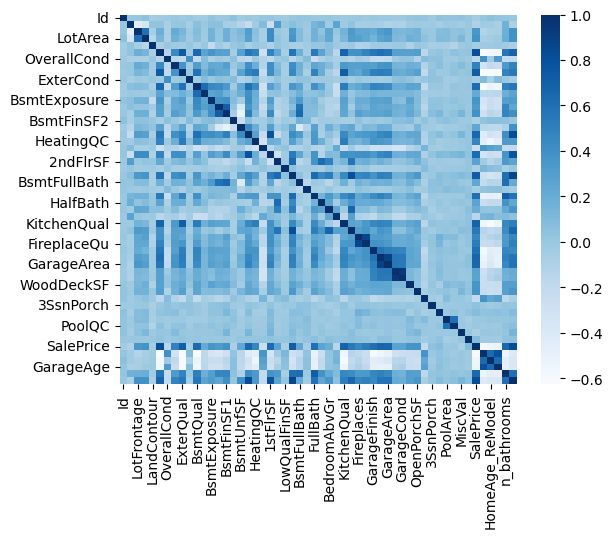

In [67]:
sns.heatmap(df.corr(),annot=False,cmap="Blues")

I could not be sure about using Label encoder or dummy variables in object columns. so I will use both.

In [68]:
#Removing order columns in object columns

a=[col if col not in order_cols else None for col in obj_cols]
for i in range(a.count(None)):
    a.pop(a.index(None))
    
#Creating Label Encoder DataFrame
df_le=pd.DataFrame(columns=df.columns)
df_le[order_cols]=df[order_cols]
df_le[num_cols]=df[num_cols]

In [69]:
for col in obj_cols:
    df_le[col]=le.fit_transform(df[col].astype(str))
    
df_le["SalePrice"]=df["SalePrice"]
df_le["MSSubClass"]=df["MSSubClass"]

In [70]:
df_le.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0  NaN          60         3    -0.189284 -0.255867       1      1         3   
1  NaN          20         3     0.518515 -0.005184       1      1         3   
2  NaN          60         3    -0.047725  0.354492       1      1         0   
3  NaN          70         3    -0.425217 -0.016083       1      1         0   
4  NaN          60         3     0.707261  1.010627       1      1         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0             5           2           2   
1            3          2          0            24           1           2   
2            3          4          0             5           2           2   
3            3          0          0             6           2           2   
4            3          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         0           5     0.661877    -0.523213          1         0   
1         0           2    -0.055483     2.230916          1         0   
2         0           5     0.661877    -0.523213          1         0   
3         0           5     0.661877    -0.523213          1         0   
4         0           5     1.379237    -0.523213          1         0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0           12           13           1    0.596852          2          2   
1            8            8           2   -0.575230          1          2   
2           12           13           1    0.393531          2          2   
3           13           15           2   -0.575230          1          2   
4           12           13           1    1.517773          2          2   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         3         3             1             6    0.634017   
1           1         3         3             4             5    1.252850   
2           2         3         3             2             6    0.133490   
3           0         2         4             1             5   -0.480793   
4           2         3         3             3             6    0.517986   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             6   -0.288237  -0.948044    -0.434420        0          4   
1             6   -0.288237  -0.643156     0.525947        0          4   
2             6   -0.288237  -0.301864    -0.283032        0          4   
3             6   -0.288237  -0.060684    -0.670963        0          3   
4             6   -0.288237  -0.174448     0.249191        0          4   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           0           3 -0.769329  1.275245     -0.092739   0.495673   
1           0           3  0.303431 -0.784620     -0.092739  -0.454866   
2           0           3 -0.600224  1.304189     -0.092739   0.656925   
3           0           3 -0.491891  1.038867     -0.092739   0.510525   
4           0           3 -0.005714  1.755237     -0.092739   1.531082   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      1.113715     -0.247800  0.806866  1.260416      0.193360     -0.210011   
1     -0.804933      3.925679  0.806866 -0.741237      0.193360     -0.210011   
2      1.113715     -0.247800  0.806866  1.260416      0.193360     -0.210011   
3      1.113715     -0.247800 -1.027572 -0.741237      0.193360     -0.210011   
4      1.113715     -0.247800  0.806866  1.260416      1.459347     -0.210011   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            2      1.067835           6   -0.896693            0           1   
1            1     -0.267285           6    0.679910            3           1   
2            2     -0.267285           6    0.679910     

In [71]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0   1          60       RL    -0.189284 -0.255867   Pave    NA      Reg   
1   2          20       RL     0.518515 -0.005184   Pave    NA      Reg   
2   3          60       RL    -0.047725  0.354492   Pave    NA      IR1   
3   4          70       RL    -0.425217 -0.016083   Pave    NA      IR1   
4   5          60       RL     0.707261  1.010627   Pave    NA      IR1   

   LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
0            3    Inside       Gtl      CollgCr       Norm       Norm   
1            3       FR2       Gtl      Veenker      Feedr       Norm   
2            3    Inside       Gtl      CollgCr       Norm       Norm   
3            3    Corner       Gtl      Crawfor       Norm       Norm   
4            3       FR2       Gtl      NoRidge       Norm       Norm   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0     1Fam     2Story     0.661877    -0.523213     Gable  CompShg   
1     1Fam     1Story    -0.055483     2.230916     Gable  CompShg   
2     1Fam     2Story     0.661877    -0.523213     Gable  CompShg   
3     1Fam     2Story     0.661877    -0.523213     Gable  CompShg   
4     1Fam     2Story     1.379237    -0.523213     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     VinylSd     VinylSd    BrkFace    0.596852          4          3   
1     MetalSd     MetalSd       None   -0.575230          3          3   
2     VinylSd     VinylSd    BrkFace    0.393531          4          3   
3     Wd Sdng     Wd Shng       None   -0.575230          3          3   
4     VinylSd     VinylSd    BrkFace    1.517773          4          3   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0      PConc         4         3             1             6    0.634017   
1     CBlock         4         3             4             5    1.252850   
2      PConc         4         3             2             6    0.133490   
3     BrkTil         3         4             1             5   -0.480793   
4      PConc         4         3             3             6    0.517986   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0          Unf   -0.288237  -0.948044    -0.434420    GasA          4   
1          Unf   -0.288237  -0.643156     0.525947    GasA          4   
2          Unf   -0.288237  -0.301864    -0.283032    GasA          4   
3          Unf   -0.288237  -0.060684    -0.670963    GasA          3   
4          Unf   -0.288237  -0.174448     0.249191    GasA          4   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           0      SBrkr -0.769329  1.275245     -0.092739   0.495673   
1           0      SBrkr  0.303431 -0.784620     -0.092739  -0.454866   
2           0      SBrkr -0.600224  1.304189     -0.092739   0.656925   
3           0      SBrkr -0.491891  1.038867     -0.092739   0.510525   
4           0      SBrkr -0.005714  1.755237     -0.092739   1.531082   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      1.113715     -0.247800  0.806866  1.260416      0.193360     -0.210011   
1     -0.804933      3.925679  0.806866 -0.741237      0.193360     -0.210011   
2      1.113715     -0.247800  0.806866  1.260416      0.193360     -0.210011   
3      1.113715     -0.247800 -1.027572 -0.741237      0.193360     -0.210011   
4      1.113715     -0.247800  0.806866  1.260416      1.459347     -0.210011   

   KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  \
0            3      1.067835        Typ   -0.896693            0     Attchd   
1            2     -0.267285        Typ    0.679910            3     Attchd   
2            3     -0.267285        Typ    0.679910            3     Attchd   
3            3      0.400275        Typ    0.679910            4     Detchd   
4            3      1.735394  

In [72]:
#Id is not important
df.drop("Id",axis=1,inplace=True)
df_le.drop("Id",axis=1,inplace=True)

In [73]:
#Creating Dummy variable column
df_dum=pd.get_dummies(df,drop_first=False)

In [74]:
df.shape,df_le.shape,df_dum.shape

((2560, 80), (2560, 80), (2560, 237))

Firstly I compared df_dum and df_le then I see that df_dum has more accuracy while it has more columns. So I will create df_fs, df_pca and df_corr by using df_dum

## Creating df_pca

In [75]:
X_pca=df_dum.drop("SalePrice",axis=1)
y_pca=df_dum.loc[:,"SalePrice"]

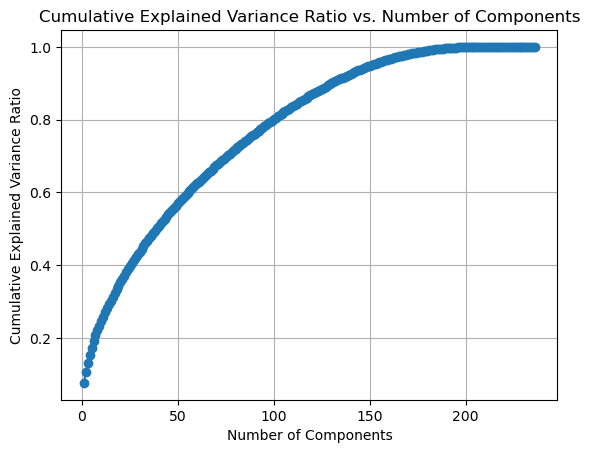

In [76]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [77]:
cumulative_variance_ratio[170] #from 237 columns

0.9810071993143243

In [78]:
pca=PCA(n_components=170)
new_x=pca.fit_transform(X_pca)


In [79]:
X_pca=pd.DataFrame(new_x)

X_train_pca=X_pca[y_pca.notnull()]
X_test_pca=X_pca[y_pca.isnull()]

y_train_pca=y_pca[y_pca.notnull()]

df_pca=pd.concat([X_train_pca,X_test_pca])
df_pca["SalePrice"]=y_train_pca
df_pca.head()

0         1         2         3         4         5         6  \
0   2.789689  2.479289 -1.523881 -2.235339  2.866001 -2.408096 -0.155723   
1 -37.276397  1.402553 -2.109764  1.519923 -0.811015 -0.221262  0.215636   
2   2.769315  3.843075 -0.790129 -0.380404  0.595965 -2.492192 -0.439595   
3  12.739989  0.582547  0.159776  2.642980 -0.396049 -1.219022 -0.474259   
4   2.749745  6.094829  0.504006  0.292818  2.209052 -1.570722  0.220865   

          7         8         9        10        11        12        13  \
0 -0.649570 -0.532346 -0.267036  0.944835 -0.199334 -0.124299 -0.399619   
1  1.641891  1.679895  1.458309 -2.673074 -1.600120  1.085950 -0.524455   
2 -1.126192 -0.320919 -0.071141  0.131862  0.020263 -0.122929  0.430069   
3  1.034252 -1.714362 -2.779274  1.353893 -1.830789  0.191088  0.054691   
4 -0.055839 -0.220064  0.260966 -0.147381  0.116569 -0.124943  0.355429   

         14        15        16        17        18        19        20  \
0  0.165295  1.336755 -0.609287  0.651725  0.014018 -0.906227  0.198641   
1  0.535538 -0.762046  0.802057  0.345366 -0.883649 -1.459543  0.529748   
2 -0.184222 -0.539054 -0.230115 -0.757526  0.190934 -0.180163 -0.038915   
3  0.314835  0.475833  0.066269 -1.356872 -1.419736 -1.049831  1.087971   
4 -1.010711 -1.482167  0.026290 -1.329048  0.978051 -0.238460 -0.552684   

         21        22        23        24        25        26        27  \
0  0.048826 -0.368941 -0.172779 -0.274791  0.242490  0.124814 -0.180201   
1 -1.502977 -0.367385 -0.582264 -0.318063 -0.683287 -0.112643 -0.704316   
2  0.605001 -0.802228  0.030766 -0.339914  0.176639  0.583994 -0.228696   
3  0.760355  0.257420  0.668736  1.167666  0.005698  1.004536 -0.133557   
4  0.047291 -0.132874  0.595320  0.036746  0.375795  0.204510 -0.301252   

         28        29        30        31        32        33        34  \
0  0.044062  0.071680 -0.543432  0.295968  0.060959  0.108500 -0.450762   
1 -0.045684  0.093759 -0.507109 -1.760870  0.086187  0.301665  0.913826   
2  1.025241  0.547413 -0.271325 -0.060744 -0.289001 -0.641994 -0.299268   
3 -0.625230  0.075146  1.769577  0.602850 -1.421894 -0.696385 -0.548730   
4  0.278880  0.562059  0.139665 -0.000485 -0.572654 -1.154824 -0.258942   

         35        36        37        38        39        40        41  \
0  0.184961 -0.049159  0.419661 -0.365550 -0.314266  0.246429 -0.061398   
1 -0.124517  0.601438 -0.370554 -0.272662  0.835384  0.115946 -0.538613   
2 -0.081020 -0.015893  0.200617 -0.335597 -0.554321 -0.098539  0.156510   
3  0.117552  0.260034 -0.244206  0.124095 -0.335420  1.290590  0.443873   
4 -0.071573  0.134311  0.054269 -0.435046 -0.173467  0.090716 -0.205644   

         42        43        44        45        46        47        48  \
0 -0.018165 -0.195402 -0.372963 -0.169500 -0.464032  0.021743  0.105368   
1 -0.089093 -0.349360 -0.278415  0.541147 -0.473617  0.206600 -0.030515   
2 -0.167502 -0.158219  0.434285 -0.125300  0.082901 -0.430604 -0.527259   
3 -0.376273 -0.256387 -0.335300  0.291835  0.334624  0.306942 -0.014193   
4 -0.006956 -0.604926  0.105027 -0.211207 -0.277188 -0.156457 -0.122289   

         49        50        51        52        53        54        55  \
0 -0.226614  0.397851 -0.057365 -0.213956  0.111471 -0.296855  0.095954   
1 -0.298745 -0.446238 -0.323226  1.101930 -0.030818 -0.561005  0.103088   
2  0.034923  0.442468  0.222667 -0.211074  0.256490 -0.080214  0.151972   
3 -0.332856  0.675441 -0.183367 -0.747422  0.498785  0.736836 -0.664992   
4 -0.038259 -0.001720 -0.127071 -0.189048 -0.090634 -0.030694 -0.063224   

         56        57        58        59        60        61        62  \
0  0.150975 -0.101792 -0.129909  0.111541  0.139506  0.385637 -0.199144   
1 -0.253940  0.091331 -0.266527 -0.492319 -0.751755  0.095335 -0.210568   
2  0.057996 -0.097654 -0.312277  0.096823  0.145755  0.442031 -0.279895   
3 -0.488186 -0.704657  0.601125 -0.611111  0.005008 -0.127960 -0.168265   
4  0.042792  0.088201 

## Creating df_corr

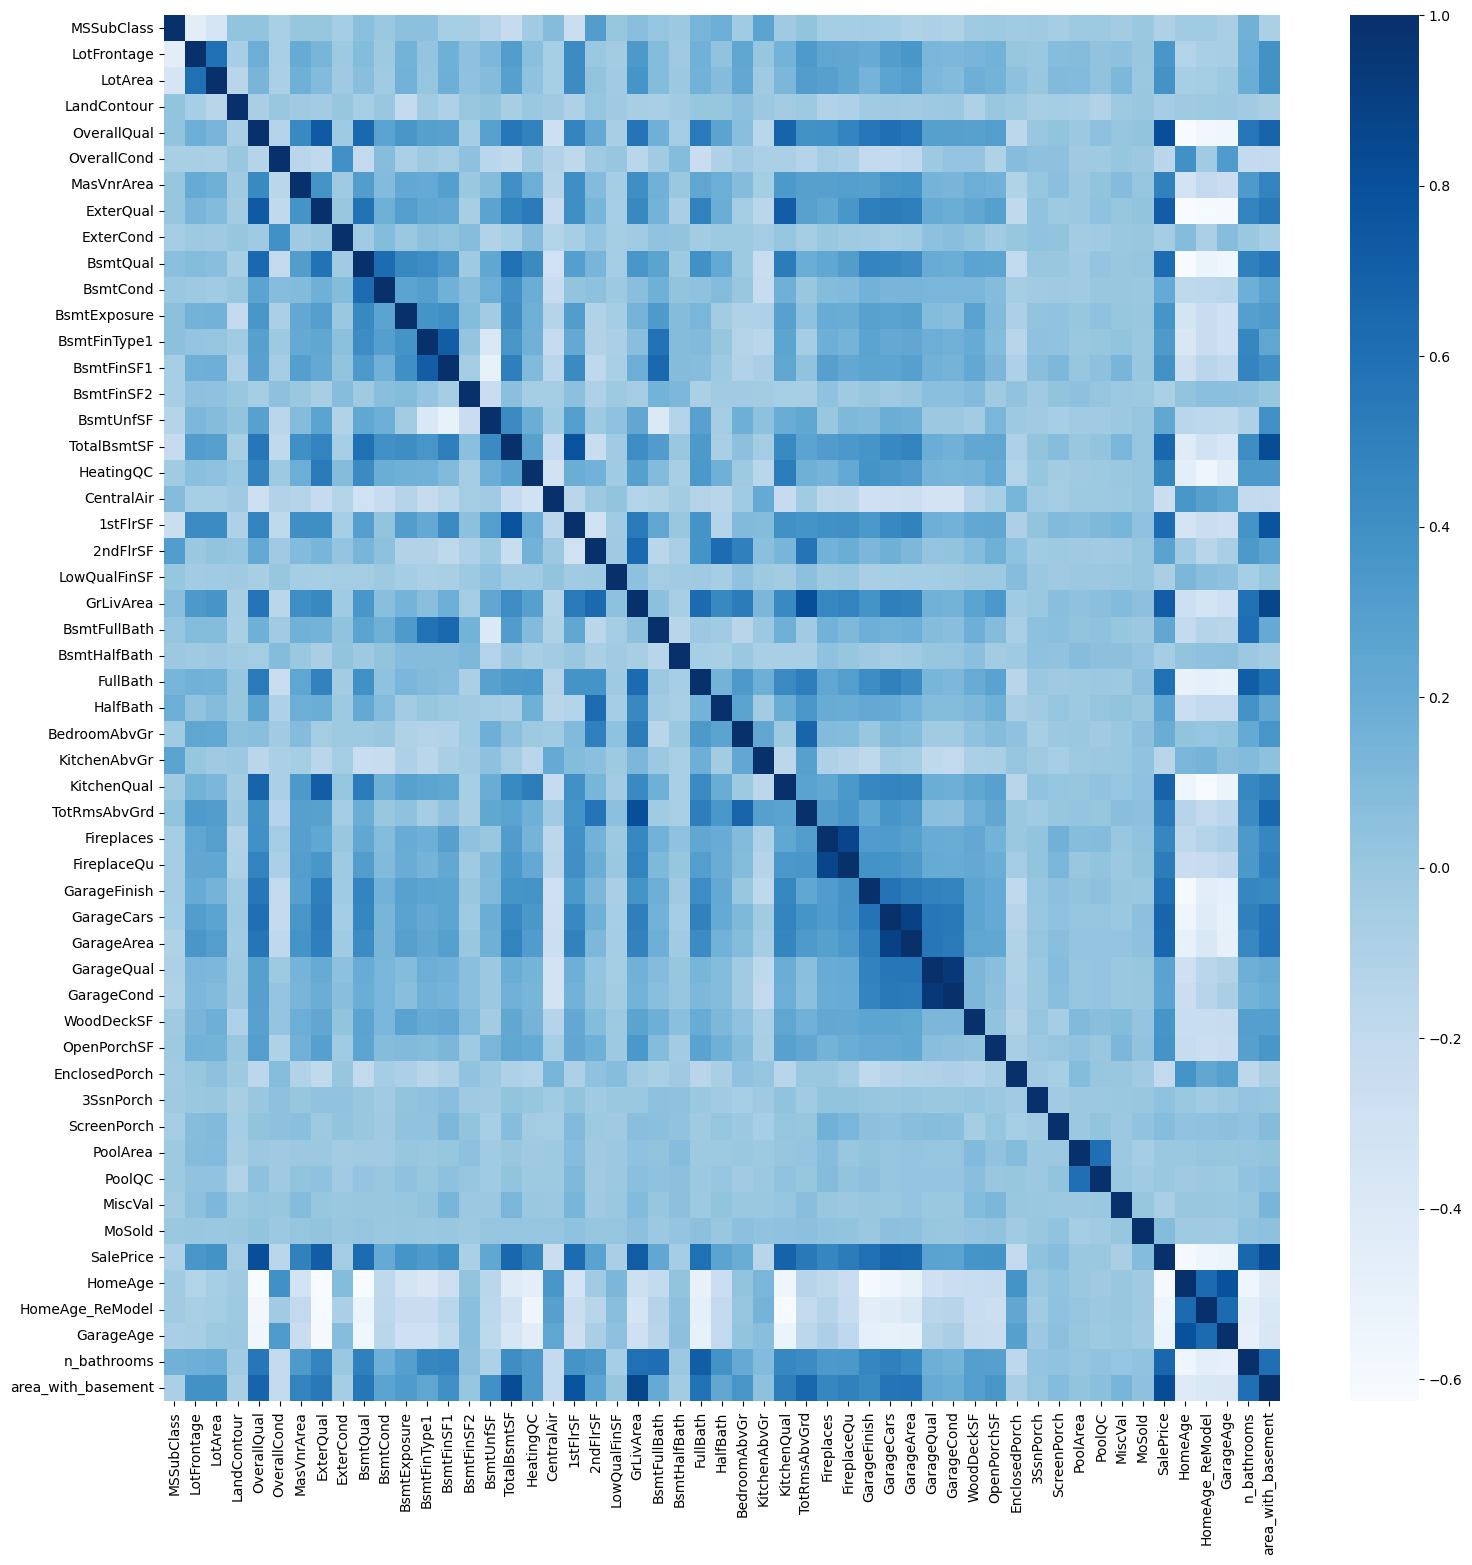

In [80]:
# Create a larger figure
plt.figure(figsize=(18, 18))

# Generate the heatmap
sns.heatmap(df.corr(), annot=False, cmap="Blues")

# Adjust the tick labels
#plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
#plt.yticks(range(len(df.columns)), df.columns)

# Display the heatmap
plt.show()

In [81]:
corr_cols=abs(df_dum.corr()["SalePrice"]).sort_values()[(abs(df_dum.corr()["SalePrice"]).sort_values()>0.05)].sort_values(ascending=True).index.tolist()
df_cor=pd.DataFrame(columns=df_dum[corr_cols].columns)
df_cor[corr_cols]=df_dum[corr_cols]
#by looking to corelation table , I taked columns that has more than 0.05 corelate with SalePrice column
df_cor

BsmtHalfBath  Fence_MnWw  MasVnrType_BrkCmn  LotConfig_Inside  \
0        -0.247800           0                  0                 1   
1         3.925679           0                  0                 0   
2        -0.247800           0                  0                 1   
3        -0.247800           0                  0                 0   
4        -0.247800           0                  0                 0   
...            ...         ...                ...               ...   
2555     -0.247800           0                  0                 1   
2556     -0.247800           0                  0                 1   
2557     -0.247800           0                  0                 1   
2558      3.925679           0                  0                 1   
2559     -0.247800           0                  0                 1   

      Neighborhood_Veenker  Exterior1st_Stucco  Exterior2nd_Brk Cmn  \
0                        0                   0                    0   
1                        1                   0                    0   
2                        0                   0                    0   
3                        0                   0                    0   
4                        0                   0                    0   
...                    ...                 ...                  ...   
2555                     0                   0                    0   
2556                     0                   0                    0   
2557                     0                   0                    0   
2558                     0                   0                    0   
2559                     0                   0                    0   

      BsmtFinType2_LwQ  SaleType_Con  Electrical_FuseP  SaleCondition_AdjLand  \
0                    0             0                 0                      0   
1                    0             0                 0                      0   
2                    0             0                 0                      0   
3                    0             0                 0                      0   
4                    0             0                 0                      0   
...                ...           ...               ...                    ...   
2555                 0             0                 0                      0   
2556                 0             0                 0                      0   
2557                 0             0                 0                      0   
2558                 0             0                 0                      0   
2559                 0             0                 0                      0   

      Neighborhood_Mitchel  SaleCondition_Family  Heating_Wall  \
0                        0                     0             0   
1                        0                     0             0   
2                        0                     0             0   
3                        0                     0             0   
4                        0                     0             0   
...                    ...                   ...           ...   
2555                     0                     0             0   
2556                     0                     0             0   
2557                     1                     0             0   
2558                     1                     0             0   
2559                     1                     0             0   

      Exterior2nd_Other  Exterior1st_BrkComm  Exterior1st_WdShing  \
0                     0                    0                    0   
1                     0                    0                    0   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   
...                 ...                  ...                  ...   
2555                  0                    0       

## Feature Selection by looking feature importance

In [82]:
train=df_dum.loc[df["SalePrice"].notnull()]
test=df_dum.loc[df["SalePrice"].isnull()]
X_train=train.drop("SalePrice",axis=1)
y_train=train["SalePrice"]
X_test=test.drop("SalePrice",axis=1)

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesRegressor(n_estimators=200)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
selected_features = model.get_support()
selected_names = X_train.columns[selected_features]

# create a new dataframe with the selected features and their corresponding names
X_train_fs = pd.DataFrame(model.transform(X_train), columns=selected_names)


selected_features = model.get_support()
selected_names = X_test.columns[selected_features]

# create a new dataframe with the selected features and their corresponding names
X_test_fs = pd.DataFrame(model.transform(X_test), columns=selected_names)
X_test_fs.head()

OverallQual  ExterQual  BsmtQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0    -0.772843        3.0       3.0    0.092538    -0.372918 -0.663638   
1    -0.055483        3.0       3.0    1.127719     0.684431  0.480463   
2    -0.772843        3.0       4.0    0.827403    -0.264108 -0.579085   
3    -0.055483        3.0       3.0    0.397404    -0.268839 -0.584370   
4     1.379237        4.0       4.0   -0.373862     0.568525  0.350992   

   GrLivArea  FullBath  KitchenQual  Fireplaces  FireplaceQu  GarageFinish  \
0  -1.231423 -1.027572          2.0   -0.896693          0.0           1.0   
1  -0.312710 -1.027572          3.0   -0.896693          0.0           1.0   
2   0.323812  0.806866          2.0    0.679910          3.0           3.0   
3   0.270769  0.806866          3.0    0.679910          4.0           3.0   
4  -0.416675  0.806866          3.0   -0.896693          0.0           2.0   

   GarageCars  GarageArea   HomeAge  HomeAge_ReModel  GarageAge  n_bathrooms  \
0   -0.994108    1.223382  0.336529         1.095084   0.672731    -1.488979   
1   -0.994108   -0.740955  0.434790         1.236530   0.790984    -0.865731   
2    0.315005    0.057938 -0.842596        -0.649418  -0.746300     0.380766   
3    0.315005    0.001546 -0.875350        -0.649418  -0.785718     0.380766   
4    0.315005    0.170723 -0.678829        -0.366526  -0.549212    -0.242482   

   area_with_basement  Foundation_PConc  GarageType_Detchd  
0           -0.979389               0.0                0.0  
1            0.188388               0.0                0.0  
2            0.054359               1.0                0.0  
3            0.018530               1.0                0.0  
4            0.058340               1.0                0.0

In [84]:
df_fs=pd.concat([X_train_fs,X_test_fs], axis=0)
df_fs.reset_index(drop=True,inplace=True)
df_fs["SalePrice"]=y_train
df_fs.sample(10,random_state=42)

OverallQual  ExterQual  BsmtQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
2156    -0.055483        3.0       4.0    0.254072    -0.957181 -1.324204   
1737    -0.772843        3.0       2.0   -0.972219    -0.841275 -1.223798   
1173    -0.772843        3.0       3.0   -0.348836     0.727009  0.528024   
478     -0.772843        3.0       3.0    0.301849    -0.141106 -0.441688   
1356     0.661877        4.0       4.0   -0.972219     0.421868  0.187171   
2385    -0.055483        3.0       3.0    0.902482     0.024475 -0.256729   
2425    -0.772843        3.0       3.0   -0.972219    -0.529037 -0.875019   
178      0.661877        4.0       4.0   -0.917616     0.885493  0.705055   
1208    -0.055483        3.0       4.0    1.220999     0.182959 -0.079697   
782     -1.490203        3.0       4.0    0.185818    -0.969008 -1.366480   

      GrLivArea  FullBath  KitchenQual  Fireplaces  FireplaceQu  GarageFinish  \
2156  -0.357266  0.806866          3.0   -0.896693          0.0           2.0   
1737  -0.841023 -1.027572          3.0   -0.896693          0.0           0.0   
1173  -0.274518 -1.027572          3.0   -0.896693          0.0           1.0   
478   -1.053197 -1.027572          2.0   -0.896693          0.0           1.0   
1356  -0.548223 -1.027572          3.0   -0.896693          0.0           2.0   
2385  -0.904675 -1.027572          3.0   -0.896693          0.0           2.0   
2425   0.190143 -1.027572          3.0   -0.896693          0.0           1.0   
178   -0.132362  0.806866          3.0   -0.896693          0.0           2.0   
1208   1.070665  0.806866          3.0    0.679910          3.0           3.0   
782   -1.795806 -1.027572          2.0   -0.896693          0.0           1.0   

      GarageCars  GarageArea   HomeAge  HomeAge_ReModel  GarageAge  \
2156    0.315005    0.128429 -0.842596        -1.026608  -0.746300   
1737   -2.303222   -2.207159  2.662028        -0.555121  -0.036785   
1173    0.315005    0.382195  0.467543         1.283679   0.830401   
478     0.315005    0.067337 -0.187527         0.340705  -0.312707   
1356    0.315005    0.499679 -1.170131        -1.073757  -1.140475   
2385   -0.994108   -0.863139  0.565804        -0.743716   0.948654   
2425    0.315005   -0.092442  1.548409         1.613720   0.081468   
178     0.315005    0.114331 -1.071871        -0.932311  -1.022223   
1208    0.315005    0.245913 -0.220280        -0.366526   0.002633   
782    -0.994108   -0.863139  0.041748         0.670746   0.317973   

      n_bathrooms  area_with_basement  Foundation_PConc  GarageType_Detchd  \
2156     1.627262           -0.760431               1.0                0.0   
1737    -1.488979           -0.997967               0.0                0.0   
1173     0.380766            0.236161               0.0                1.0   
478     -1.488979           -0.737872               0.0                1.0   
1356    -0.865731           -0.106210               1.0                1.0   
2385    -0.242482           -0.552089               0.0                0.0   
2425    -0.865731           -0.177869               1.0                1.0   
178     -0.242482            0.413981               1.0                0.0   
1208     1.627262            0.772277               1.0                0.0   
782     -0.242482           -1.666785               0.0                0.0   

      SalePrice  
2156        NaN  
1737        NaN  
1173        NaN  
478    135000.0  
1356        NaN  
2385        NaN  
2425        NaN  
178    185500.0  
1208        NaN  
782     80000.0

In [85]:
df_fs.shape

(2560, 22)

## Predicting using ML algorithms

In [86]:
import graphviz # for visulation graph
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [87]:
sub=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

These Predicting part (until Deeplearning part), I try to find best models therefore I changed train test dataset by looking **df_le, df_dum, df_fs, df_pca, and  df_cor** in the below cell.

In [88]:
# Splitting the data into train and test sets
train=df_dum.loc[df_cor["SalePrice"].notnull()]# df_le df_dum df_fs df_pca df_cor
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((880, 236), (221, 236), (880,), (221,))

# Linear regression

In [90]:
def evaluate(y_test,y_pred):
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = (mean_squared_error(y_test,y_pred))**0.5
    mae = mean_absolute_error(y_test, y_pred)

    
    print("Best estimator:",random_search.best_estimator_)
    print("Best parameters:", random_search.best_params_)
    print("R2 score:", r2)
    print("Mean squared error:", mse)
    print("Mean absolute error:", mae)

In [91]:
model = LinearRegression(n_jobs=-1)

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=50, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_lin = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_lin.predict(X_test)

evaluate(y_test,y_pred)

Best estimator: LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)
Best parameters: {'positive': True, 'fit_intercept': False, 'copy_X': True}
R2 score: 0.9151403648455118
Mean squared error: 23065.17194916309
Mean absolute error: 16291.540854487315


### Results

#### for df_cor_dum

LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)

Best parameters: {'positive': True, 'fit_intercept': False, 'copy_X': True}

R2 score: 0.9166419798956568

Mean squared error: 22860.18874879218

Mean absolute error: 16301.221129938644

#### for df_pca_dum

LinearRegression(n_jobs=-1)

0.8781080927739632

Best parameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}

R2 score: 0.9044841272485925

Mean squared error: 24470.559012921694

Mean absolute error: 17266.794617241416

#### for df_fs_dum
LinearRegression(n_jobs=-1)

0.8711042365660496

Best parameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}

R2 score: 0.8821483057098907

Mean squared error: 27181.538323406203

Mean absolute error: 19534.09540953733

#### for df_dum
LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)

0.8892757940617659

Best parameters: {'positive': True, 'fit_intercept': False, 'copy_X': True}

R2 score: 0.9145189544955712

Mean squared error: 23149.46875803767

Mean absolute error: 16375.890291592548

#### for df_le
LinearRegression(n_jobs=-1)

0.8812425800550077

Best parameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}

R2 score: 0.9078903665671606

Mean squared error: 24030.269610578092

Mean absolute error: 16836.19707726317

# Ridge

In [92]:
model = Ridge(random_state=42)

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    "solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"],
    "alpha":np.linspace(0,200,300),
    "max_iter":[round(num) for num in np.linspace(1,2000,50)]
}
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=200, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_rid = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rid.predict(X_test)

evaluate(y_test,y_pred)

Best estimator: Ridge(alpha=20.066889632107024, copy_X=False, max_iter=939, random_state=42)
Best parameters: {'solver': 'auto', 'max_iter': 939, 'fit_intercept': True, 'copy_X': False, 'alpha': 20.066889632107024}
R2 score: 0.9233360389574683
Mean squared error: 21923.08883622648
Mean absolute error: 15145.05397250624


### Results



#### for df_cor_dum

Ridge(alpha=15.384615384615385, max_iter=1347, random_state=42, solver='svd')

0.9011292319128016

Best parameters: {'solver': 'svd', 'max_iter': 1347, 'fit_intercept': True, 'copy_X': True, 'alpha': 15.384615384615385}

R2 score: 0.9216806713192734

Mean squared error: 22158.512077752508

Mean absolute error: 15303.26895561953

#### for df_pca_dum

Ridge(alpha=20.066889632107024, copy_X=False, max_iter=939, random_state=42)

0.9000713640347664

Best parameters: {'solver': 'auto', 'max_iter': 939, 'fit_intercept': True, 'copy_X': False, 'alpha': 20.066889632107024}

R2 score: 0.9232745673145825

Mean squared error: 21931.876395797048

Mean absolute error: 15147.608716792614


#### for df_fs_dum 

Ridge(alpha=15.384615384615385, max_iter=1347, random_state=42, solver='svd')

0.8715264533966552

Best parameters: {'solver': 'svd', 'max_iter': 1347, 'fit_intercept': True, 'copy_X': True, 'alpha': 15.384615384615385}

R2 score: 0.8821732278992

Mean squared error: 27178.664120937156

Mean absolute error: 19427.03287702776

#### for df_dum

Ridge(alpha=20.066889632107024, copy_X=False, max_iter=939, random_state=42)

0.9000869955317592

Best parameters: {'solver': 'auto', 'max_iter': 939, 'fit_intercept': True, 'copy_X': False, 'alpha': 20.066889632107024}

R2 score: 0.9233191520311763

Mean squared error: 21925.503224914177

Mean absolute error: 15129.317280119143

#### for df_le
Ridge(alpha=42.80936454849498, copy_X=False, max_iter=776, random_state=42,
      solver='lsqr')

0.8868524541058447

Best parameters: {'solver': 'lsqr', 'max_iter': 776, 'fit_intercept': True, 'copy_X': False, 'alpha': 42.80936454849498}

R2 score: 0.9062473649639731

Mean squared error: 24243.641759643855

Mean absolute error: 16860.626798568963

# Lasso

In [93]:
model = Lasso(random_state=42)

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    "alpha":np.linspace(0,200,300),
    "max_iter":[round(num) for num in np.linspace(50,2000,50)],
    "selection":["cyclic","random"],
}
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=200, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_las = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_las.predict(X_test)


evaluate(y_test,y_pred)

Best estimator: Lasso(alpha=111.70568561872909, max_iter=90, random_state=42,
      selection='random')
Best parameters: {'selection': 'random', 'max_iter': 90, 'fit_intercept': True, 'copy_X': True, 'alpha': 111.70568561872909}
R2 score: 0.9231217291371835
Mean squared error: 21953.709836394657
Mean absolute error: 15048.111033332732


### Results


#### for df_cor_dum

Lasso(alpha=71.57190635451505, copy_X=False, max_iter=50, random_state=42,
      selection='random')

0.9022951305944267

Best parameters: {'selection': 'random', 'max_iter': 50, 'fit_intercept': True, 'copy_X': False, 'alpha': 
71.57190635451505}

R2 score: 0.9227855145663884

Mean squared error: 22001.662948335263

Mean absolute error: 15211.823002212466

#### for df_pca_dum

Lasso(alpha=149.16387959866222, copy_X=False, max_iter=1522, random_state=42,
      selection='random')

0.9003066066602136

Best parameters: {'selection': 'random', 'max_iter': 1522, 'fit_intercept': True, 'copy_X': False, 'alpha': 149.16387959866222}

R2 score: 0.9210920090977742

Mean squared error: 22241.62987770711

Mean absolute error: 15162.159186335339

#### for df_fs_dum 

Lasso(alpha=69.56521739130434, max_iter=169, random_state=42)

0.871366344214653

Best parameters: {'selection': 'cyclic', 'max_iter': 169, 'fit_intercept': True, 'copy_X': True, 'alpha': 69.56521739130434}

R2 score: 0.8822399635524237

Mean squared error: 27170.96619808461

Mean absolute error: 19467.40611717227

#### for df_dum

Lasso(alpha=111.70568561872909, max_iter=90, random_state=42,
      selection='random')

0.8998896044657183

Best parameters: {'selection': 'random', 'max_iter': 90, 'fit_intercept': True, 'copy_X': True, 'alpha': 111.70568561872909}

R2 score: 0.9230798617732142

Mean squared error: 21959.686940484782

Mean absolute error: 15030.02204061426

#### for df_le
Lasso(alpha=200.0, copy_X=False, max_iter=1602, random_state=42,
      selection='random')
      
0.8860610332677343

Best parameters: {'selection': 'random', 'max_iter': 1602, 'fit_intercept': True, 'copy_X': False, 'alpha': 200.0}

R2 score: 0.9068295062784102

Mean squared error: 24168.256133483454

Mean absolute error: 16671.915251039525

# ElasticNet

In [94]:
model = ElasticNet(random_state=42)

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    "alpha":np.linspace(0,200,300),
    "max_iter":[round(num) for num in np.linspace(50,2000,50)],
    "selection":["cyclic","random"],
    "l1_ratio": np.linspace(0,1,20)
}
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=200, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_ela = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_ela.predict(X_test)


evaluate(y_test,y_pred)

Best estimator: ElasticNet(alpha=138.46153846153845, copy_X=False, l1_ratio=1.0, max_iter=209,
           random_state=42, selection='random')
Best parameters: {'selection': 'random', 'max_iter': 209, 'l1_ratio': 1.0, 'fit_intercept': True, 'copy_X': False, 'alpha': 138.46153846153845}
R2 score: 0.9226566887084822
Mean squared error: 22020.00925888614
Mean absolute error: 15076.788966063208


### Results



#### for df_cor_dum

ElasticNet(alpha=138.46153846153845, copy_X=False, l1_ratio=1.0, max_iter=209,
           random_state=42, selection='random')

0.9004085658599379

Best parameters: {'selection': 'random', 'max_iter': 209, 'l1_ratio': 1.0, 'fit_intercept': True, 'copy_X': False, 'alpha': 138.46153846153845}

R2 score: 0.9211500282189312

Mean squared error: 22233.451510102477

Mean absolute error: 15189.92440523527

#### for df_pca_dum

ElasticNet(alpha=138.46153846153845, copy_X=False, l1_ratio=1.0, max_iter=209,
           random_state=42, selection='random')

0.9002509745216063

Best parameters: {'selection': 'random', 'max_iter': 209, 'l1_ratio': 1.0, 'fit_intercept': True, 'copy_X': False, 'alpha': 138.46153846153845}

R2 score: 0.9215155807771834

Mean squared error: 22181.85392125339

Mean absolute error: 15137.64035369739


#### for df_fs_dum 

ElasticNet(alpha=168.561872909699, copy_X=False, l1_ratio=1.0, max_iter=50,
           random_state=42)

0.8714347780778772

Best parameters: {'selection': 'cyclic', 'max_iter': 50, 'l1_ratio': 1.0, 'fit_intercept': True, 'copy_X': False, 'alpha': 168.561872909699}

R2 score: 0.8819767195057783

Mean squared error: 27201.31861004537

Mean absolute error: 19388.15764199143

#### for df_dum

ElasticNet(alpha=138.46153846153845, copy_X=False, l1_ratio=1.0, max_iter=209,
           random_state=42, selection='random')

0.8996289766637554

Best parameters: {'selection': 'random', 'max_iter': 209, 'l1_ratio': 1.0, 'fit_intercept': True, 'copy_X': False, 'alpha': 138.46153846153845}

R2 score: 0.9223990562642855

Mean squared error: 22056.65336088755

Mean absolute error: 15070.618151689352

#### for df_le
ElasticNet(alpha=190.63545150501673, l1_ratio=1.0, max_iter=647,
           random_state=42, selection='random')

0.886010030020856

Best parameters: {'selection': 'random', 'max_iter': 647, 'l1_ratio': 1.0, 'fit_intercept': True, 'copy_X': True, 'alpha': 190.63545150501673}

R2 score: 0.9069599038686749

Mean squared error: 24151.337763308795

Mean absolute error: 16662.282907695277

# SVR

In [95]:
model = SVR()

param_grid = {"C":np.linspace(0,500,300),
           "gamma": np.linspace(0,10,50),
    "kernel":["linear", "poly", "rbf", "sigmoid"],
    "epsilon":np.linspace(0,10,200),
    "max_iter":[round(num) for num in np.linspace(50,2000,50)],
    }
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=200, cv=5, random_state=42)

random_search.fit(X_train, y_train)

print(random_search.best_estimator_)
print(random_search.best_score_)

#Predict from the test set

best_svr = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = (mean_squared_error(y_test,y_pred))**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Best parameters:", random_search.best_params_)
print("R2 score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)

SVR(C=493.31103678929765, epsilon=4.020100502512563, gamma=4.8979591836734695,
    kernel='linear', max_iter=1602)
0.891172429899014
Best parameters: {'max_iter': 1602, 'kernel': 'linear', 'gamma': 4.8979591836734695, 'epsilon': 4.020100502512563, 'C': 493.31103678929765}
R2 score: 0.9046006752743074
Mean squared error: 24455.625024528017
Mean absolute error: 16080.32006005566


### Results


#### for df_cor_dum

SVR(C=396.32107023411373, epsilon=7.939698492462312, gamma=4.285714285714286,
    kernel='linear', max_iter=1323)

0.8896350551769803

Best parameters: {'max_iter': 1323, 'kernel': 'linear', 'gamma': 4.285714285714286, 'epsilon': 7.939698492462312, 'C': 396.32107023411373}

R2 score: 0.8964604051459397


Mean squared error: 25477.648822514777

Mean absolute error: 17335.498682029815

#### for df_pca_dum

SVR(C=488.2943143812709, epsilon=9.396984924623116, gamma=8.36734693877551,
    kernel='linear', max_iter=1881)

0.8900671491373758

Best parameters: {'max_iter': 1881, 'kernel': 'linear', 'gamma': 8.36734693877551, 'epsilon': 9.396984924623116, 'C': 488.2943143812709}

R2 score: 0.9048047468646372

Mean squared error: 24429.454136512897

Mean absolute error: 15920.283097754364

#### for df_fs_dum 

SVR(C=155.51839464882943, epsilon=3.919597989949749, gamma=0.20408163265306123,
    kernel='poly', max_iter=1841)

0.8800474916515837

Best parameters: {'max_iter': 1841, 'kernel': 'poly', 'gamma': 0.20408163265306123, 'epsilon': 3.919597989949749, 'C': 155.51839464882943}

R2 score: -1.7950059390850375

Mean squared error: 132372.41250339977

Mean absolute error: 91109.24964266631

#### for df_dum

SVR(C=493.31103678929765, epsilon=4.020100502512563, gamma=4.8979591836734695,
    kernel='linear', max_iter=1602)

0.8901885491719268

Best parameters: {'max_iter': 1602, 'kernel': 'linear', 'gamma': 4.8979591836734695, 'epsilon': 4.020100502512563, 'C': 493.31103678929765}

R2 score: 0.9037012647771079

Mean squared error: 24570.63656139063

Mean absolute error: 16208.701239998234

#### for df_le
SVR(C=500.0, epsilon=2.1105527638190957, gamma=4.081632653061225,
    kernel='linear', max_iter=1483)

0.8765635018850052

Best parameters: {'max_iter': 1483, 'kernel': 'linear', 'gamma': 4.081632653061225, 'epsilon': 2.1105527638190957, 'C': 500.0}

R2 score: 0.882700646828473

Mean squared error: 27117.767013986202

Mean absolute error: 18326.388564025005

# Decision Tree

In [96]:
model = DecisionTreeRegressor(random_state=42)

param_grid = {"criterion":["squared_error"],
          "min_samples_leaf":[round(num) for num in np.linspace(5,30,20)],
          "max_depth":[round(num) for num in np.linspace(5,30,15)],
          "min_samples_split":[round(num) for num in np.linspace(2,10,8)],
          "max_features":["log2"],
              "splitter":["best","random"]
    }
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=500, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_tree = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_tree.predict(X_test)

evaluate(y_test,y_pred)

Best estimator: DecisionTreeRegressor(max_depth=7, max_features='log2', min_samples_leaf=8,
                      min_samples_split=3, random_state=42)
Best parameters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'squared_error'}
R2 score: 0.7245966739872101
Mean squared error: 41551.88276018006
Mean absolute error: 28762.011986229147


### Results


#### for df_cor_dum

DecisionTreeRegressor(max_depth=7, max_features='log2', min_samples_leaf=17,
                      min_samples_split=10, random_state=42)

0.701652117938689

Best parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 17, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'squared_error'}

R2 score: 0.7293850375611841

Mean squared error: 41189.07312055712

Mean absolute error: 28908.912538212753

#### for df_pca_dum

DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=8,
                      min_samples_split=7, random_state=42, splitter='random')

0.3660445476452674

Best parameters: {'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'squared_error'}

R2 score: 0.14483246296377117

Mean squared error: 73220.33636070207

Mean absolute error: 53092.40565412578

#### for df_fs_dum 

DecisionTreeRegressor(max_depth=9, max_features='log2', min_samples_leaf=8,
                      min_samples_split=4, random_state=42)

0.7988340336499302

Best parameters: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'squared_error'}

R2 score: 0.6124440183191309

Mean squared error: 49291.64802201261

Mean absolute error: 40198.92745609817

#### for df_dum

DecisionTreeRegressor(max_depth=7, max_features='log2', min_samples_leaf=5,
                      min_samples_split=3, random_state=42)

0.7094770909406903

Best parameters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'squared_error'}

R2 score: 0.7060474961374724

Mean squared error: 42928.39963960629

Mean absolute error: 29006.291927633738

#### for df_le
DecisionTreeRegressor(max_depth=19, max_features='log2', min_samples_leaf=8,
                      min_samples_split=7, random_state=42)

0.7529232875829843

Best parameters: {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'squared_error'}

R2 score: 0.6962808265078726

Mean squared error: 43635.7275187457

Mean absolute error: 30638.908893243508

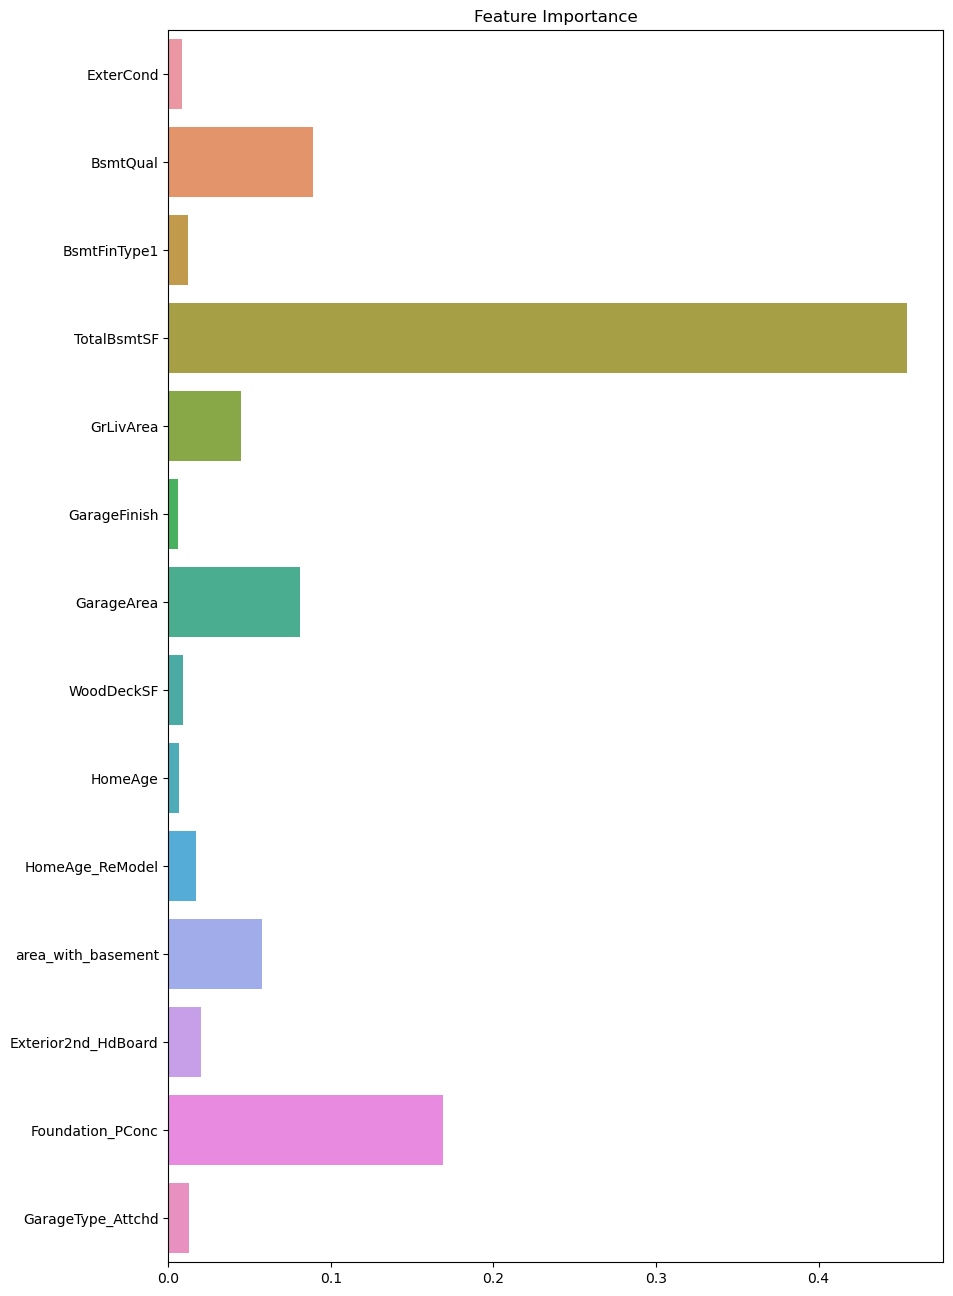

In [97]:
values = best_tree.feature_importances_
plt.figure(figsize=(10,16))
sns.barplot(y=X_train.columns[values>0.005], x=values[values>0.005]).set(title='Feature Importance')
plt.show()

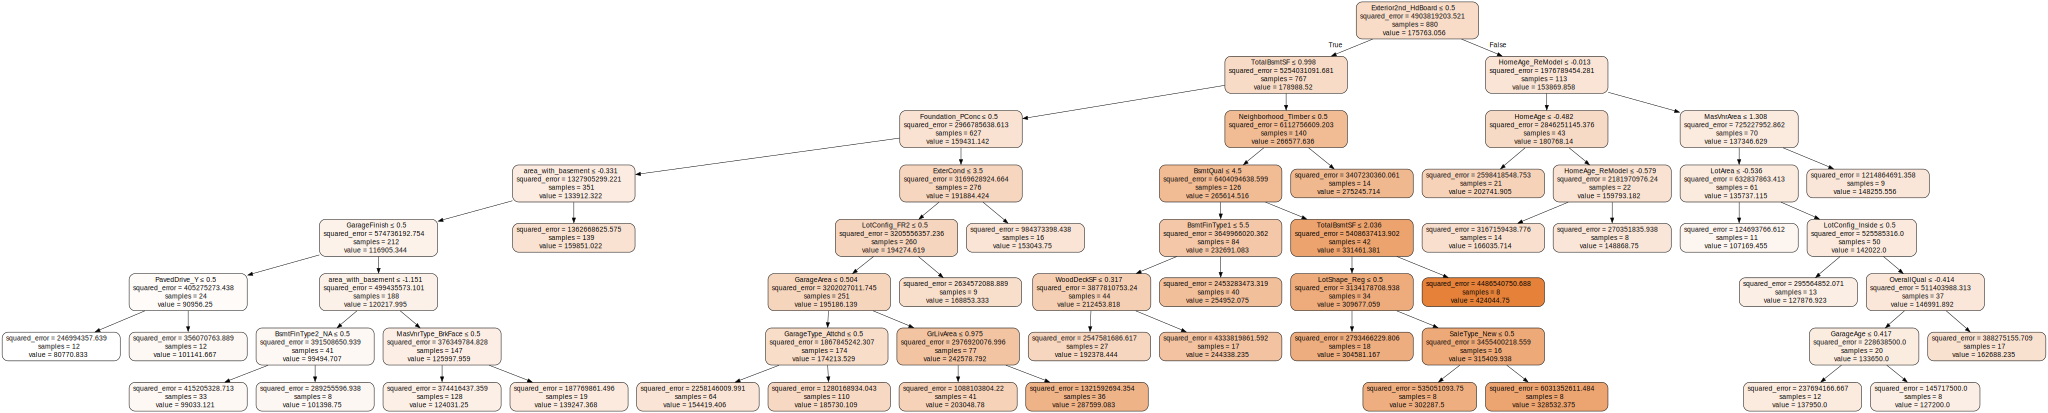

In [98]:
dot_data = export_graphviz(best_tree,   
                      out_file=None, 
                      feature_names=X_train.columns,       #Provide X Variables Column Names 
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

# Save the graph as a PNG file
#graph.render("my_tree_graph")

graph 

## RandomForest

In [99]:
model = RandomForestRegressor(random_state=42,n_jobs=-1)

param_grid = {"criterion":["squared_error"],
          "min_samples_leaf":[round(num) for num in np.linspace(5,30,20)],
          "n_estimators":[round(num) for num in np.linspace(50,2000,80)],
          "max_depth":[round(num) for num in np.linspace(5,30,15)],
          "min_samples_split":[round(num) for num in np.linspace(2,10,8)],
          "max_features":["log2"],
     }
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=100, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_ran = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_ran.predict(X_test)


evaluate(y_test,y_pred)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best estimator: RandomForestRegressor(max_depth=12, max_features='log2', min_samples_leaf=5,
                      n_estimators=396, n_jobs=-1, random_state=42)
Best parameters: {'n_estimators': 396, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'squared_error'}
R2 score: 0.8124217737941033
Mean squared error: 34292.35641142137
Mean absolute error: 21776.772187348102


### Results


#### for df_cor_dum

RandomForestRegressor(max_depth=28, max_features='log2', min_samples_leaf=5,
                      min_samples_split=8, n_estimators=1161, n_jobs=-1,
                      random_state=42)

0.8386283360214293

Best parameters: {'n_estimators': 1161, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 28, 'criterion': 'squared_error'}

R2 score: 0.8281865996679143

Mean squared error: 32819.70196841337

Mean absolute error: 20679.161895832265

#### for df_pca_dum
RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5,
                      n_estimators=1580, n_jobs=-1, random_state=42)

0.5301962903950539

Best parameters: {'n_estimators': 1580, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'squared_error'}

R2 score: 0.5079598694062235

Mean squared error: 55540.06440424851

Mean absolute error: 39208.94049544076

#### for df_fs_dum

RandomForestRegressor(max_depth=28, max_features='log2', min_samples_leaf=5,
                      min_samples_split=8, n_estimators=1161, n_jobs=-1,
                      random_state=42)

0.8777494205796144

Best parameters: {'n_estimators': 1161, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 28, 'criterion': 'squared_error'}

R2 score: 0.7407659475410011

Mean squared error: 40313.651855633565

Mean absolute error: 33977.44809822934

#### for df_dum

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5,
                      n_estimators=1580, n_jobs=-1, random_state=42)

0.8017241844753649

Best parameters: {'n_estimators': 1580, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'squared_error'}

R2 score: 0.7927869721010975

Mean squared error: 36042.47823944879

Mean absolute error: 22926.588769747457

#### for df_le
RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5,
                      n_estimators=1580, n_jobs=-1, random_state=42)

0.8659709201039952

Best parameters: {'n_estimators': 1580, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'squared_error'}

R2 score: 0.850441580126577

Mean squared error: 30620.448708315947

Mean absolute error: 19276.206382366883

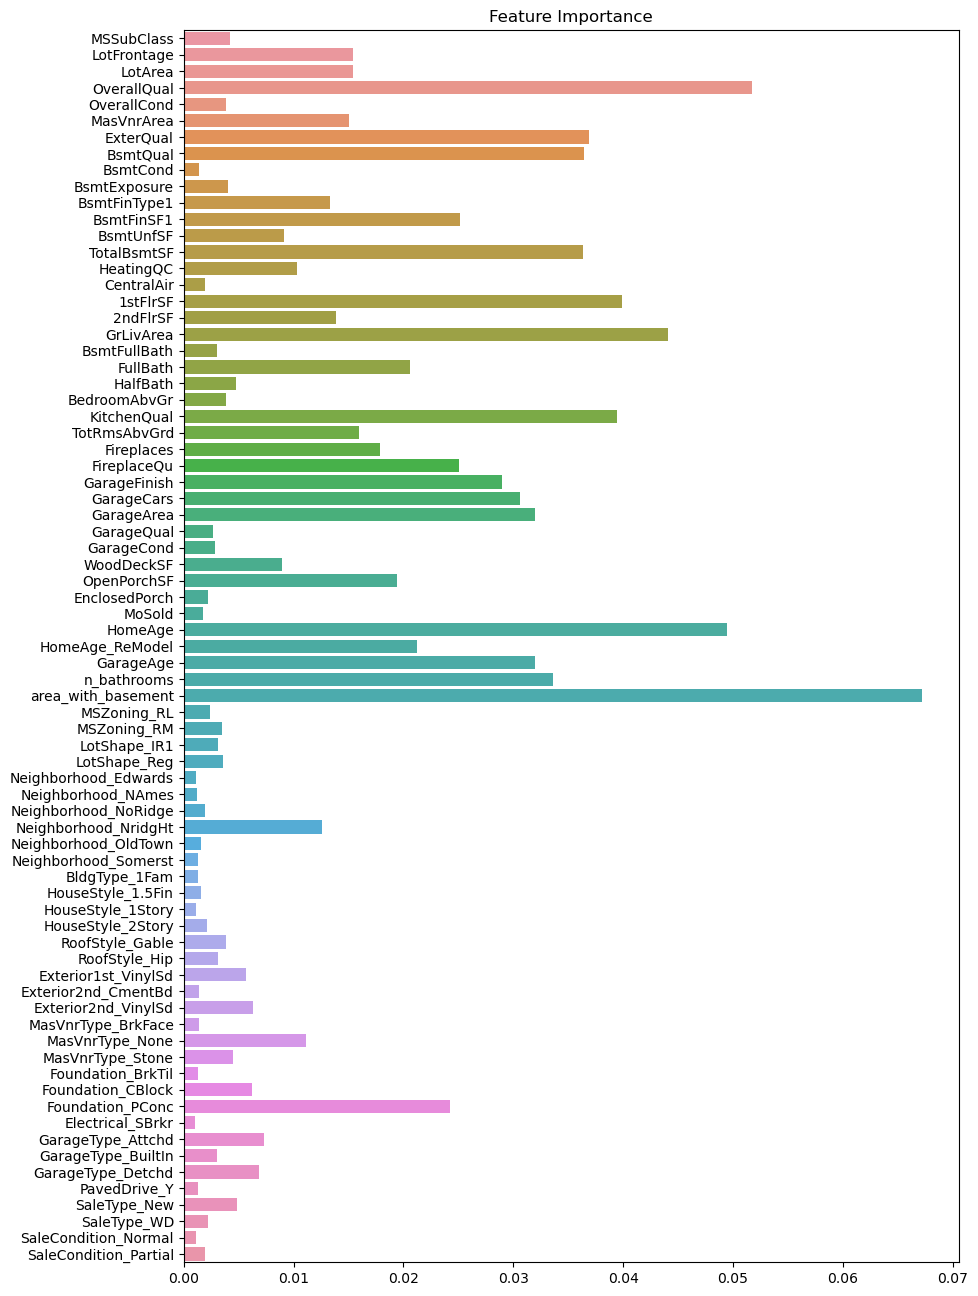

In [100]:
values = best_ran.feature_importances_
plt.figure(figsize=(10,16))

sns.barplot(y=X_train.columns[values>0.001], x=values[values>0.001]).set(title='Feature Importance')
plt.show()

# GradientBoostingRegressor

In [101]:
model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7,9,11],
    'min_samples_split': [2, 5, 10,12],
    'min_samples_leaf': [1, 2, 4,6,8,10,12],
    'max_features': ['log2']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
                                   scoring='r2', cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_gdr = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_gdr.predict(X_test)


evaluate(y_test,y_pred)

Best estimator: GradientBoostingRegressor(max_depth=7, max_features='log2', min_samples_leaf=6,
                          min_samples_split=10, n_estimators=200,
                          random_state=42)
Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1}
R2 score: 0.9142028775483757
Mean squared error: 23192.22830755219
Mean absolute error: 15253.445905394967


### Results


#### for df_cor_dum
GradientBoostingRegressor(max_features='log2', min_samples_split=10,
                          n_estimators=300, random_state=42)

0.9163242967408104

Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.1}

R2 score: 0.9136856082121914

Mean squared error: 23262.036015763642

Mean absolute error: 15707.532411782531

#### for df_pca_dum

GradientBoostingRegressor(max_features='log2', min_samples_split=10,
                          n_estimators=300, random_state=42)

0.785720281938054

Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.1}

R2 score: 0.7967829577641047

Mean squared error: 35693.257039545926

Mean absolute error: 24720.561438575598

#### for df_fs_dum

GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=8,
                          min_samples_split=10, random_state=42)

0.9016922361149261

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}

R2 score: 0.8182335925415729

Mean squared error: 33756.92884569188

Mean absolute error: 26075.46688651935

#### for df_dum

GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=10,
                          min_samples_split=12, n_estimators=300,
                          random_state=42)

0.9150467326872658

Best parameters: {'n_estimators': 300, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}

R2 score: 0.9113816838424387

Mean squared error: 23570.449419779463

Mean absolute error: 15309.77992238352

#### for df_le
GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=6,
                          min_samples_split=12, random_state=42)

0.9158299573222987

Best parameters: {'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}

R2 score: 0.9054490541707252

Mean squared error: 24346.641186001376

Mean absolute error: 15319.363008686978

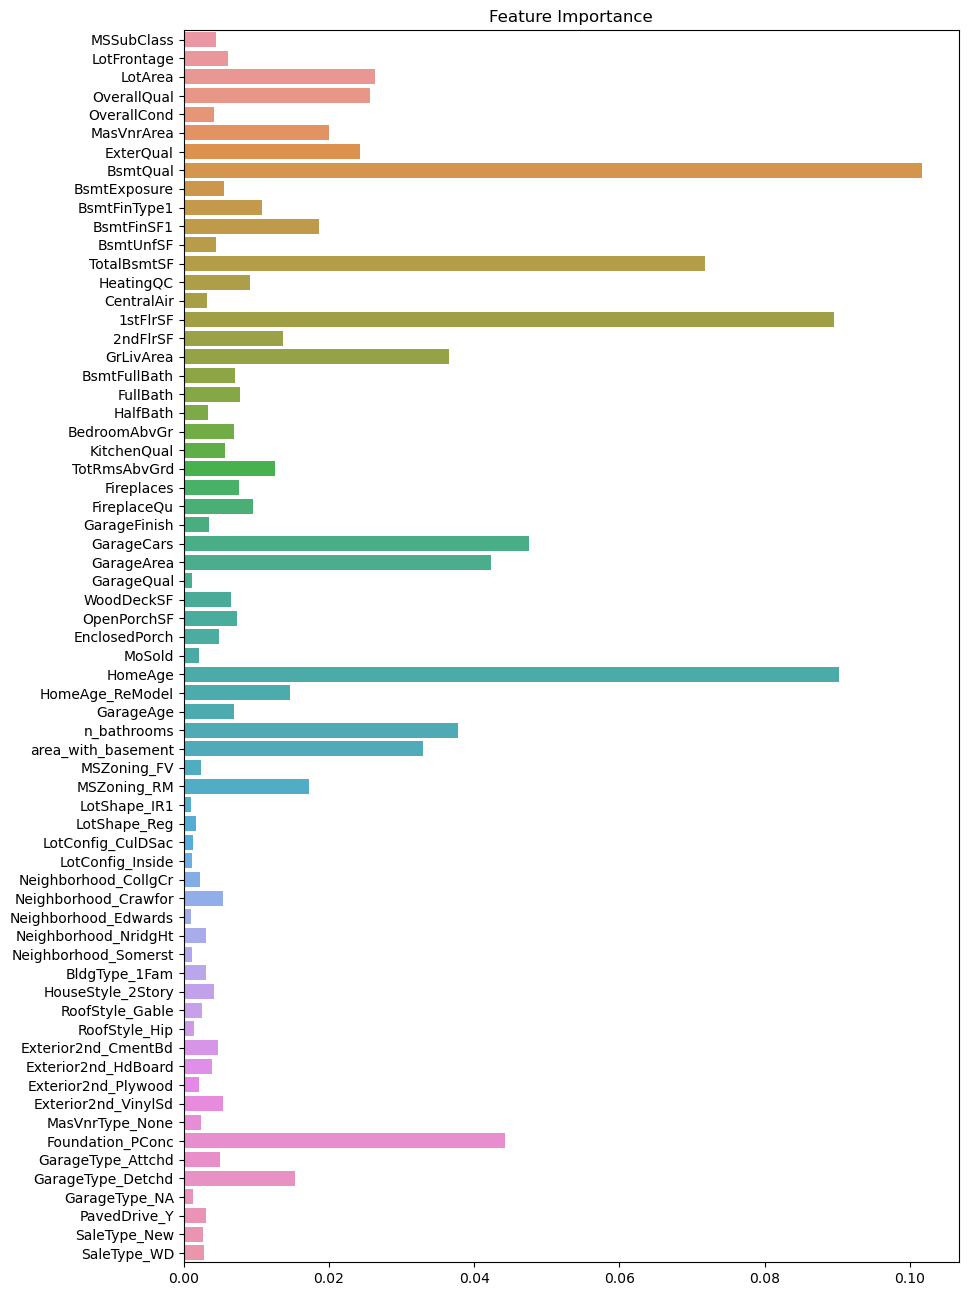

In [102]:

values = best_gdr.feature_importances_
plt.figure(figsize=(10,16))

sns.barplot(y=X_train.columns[values>0.001], x=values[values>0.001]).set(title='Feature Importance')
plt.show()

# ExtraTreesRegressor

In [103]:
model = ExtraTreeRegressor(random_state=42)

param_grid = {"criterion":["squared_error"],
          "min_samples_leaf":[round(num) for num in np.linspace(5,30,20)],
          "max_depth":[round(num) for num in np.linspace(5,30,15)],
          "min_samples_split":[round(num) for num in np.linspace(2,10,8)],
          "max_features":["log2"],
     }
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=100, cv=5, random_state=42)

random_search.fit(X_train, y_train)

print(random_search.best_estimator_)
print(random_search.best_score_)

#Predict from the test set

best_etr = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_etr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = (mean_squared_error(y_test,y_pred))**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Best parameters:", random_search.best_params_)
print("R2 score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)

ExtraTreeRegressor(max_depth=16, max_features='log2', min_samples_leaf=5,
                   min_samples_split=4, random_state=42)
0.5743986503257748
Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'squared_error'}
R2 score: 0.5960462373350808
Mean squared error: 50323.62823607442
Mean absolute error: 36360.17335074356


### Results


#### for df_cor_dum

ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5,
                   min_samples_split=8, random_state=42)

0.6493555372043269

Best parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'squared_error'}

R2 score: 0.7292956834199869

Mean squared error: 41195.87265311827

Mean absolute error: 28192.922883269035

#### for df_pca_dum

ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5,
                   min_samples_split=8, random_state=42)

0.28471550700204257

Best parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'squared_error'}

R2 score: 0.11481497046185407

Mean squared error: 74494.31768650546

Mean absolute error: 56227.982907785314

#### for df_fs_dum

ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5,
                   min_samples_split=8, random_state=42)

0.7235537141509585

Best parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'squared_error'}

R2 score: 0.5357121547260512

Mean squared error: 53951.03412931808

Mean absolute error: 42179.54245269533

#### for df_dum

ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5,
                   min_samples_split=8, random_state=42)

0.5505832421199803

Best parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'squared_error'}

R2 score: 0.675287580576625

Mean squared error: 45118.594905207465

Mean absolute error: 31838.62598484898

#### for df_le
ExtraTreeRegressor(max_depth=16, max_features='log2', min_samples_leaf=5,
                   min_samples_split=4, random_state=42)

0.6513227699025035

Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'squared_error'}

R2 score: 0.69274566533438

Mean squared error: 43888.94341439505

Mean absolute error: 31349.387931512938

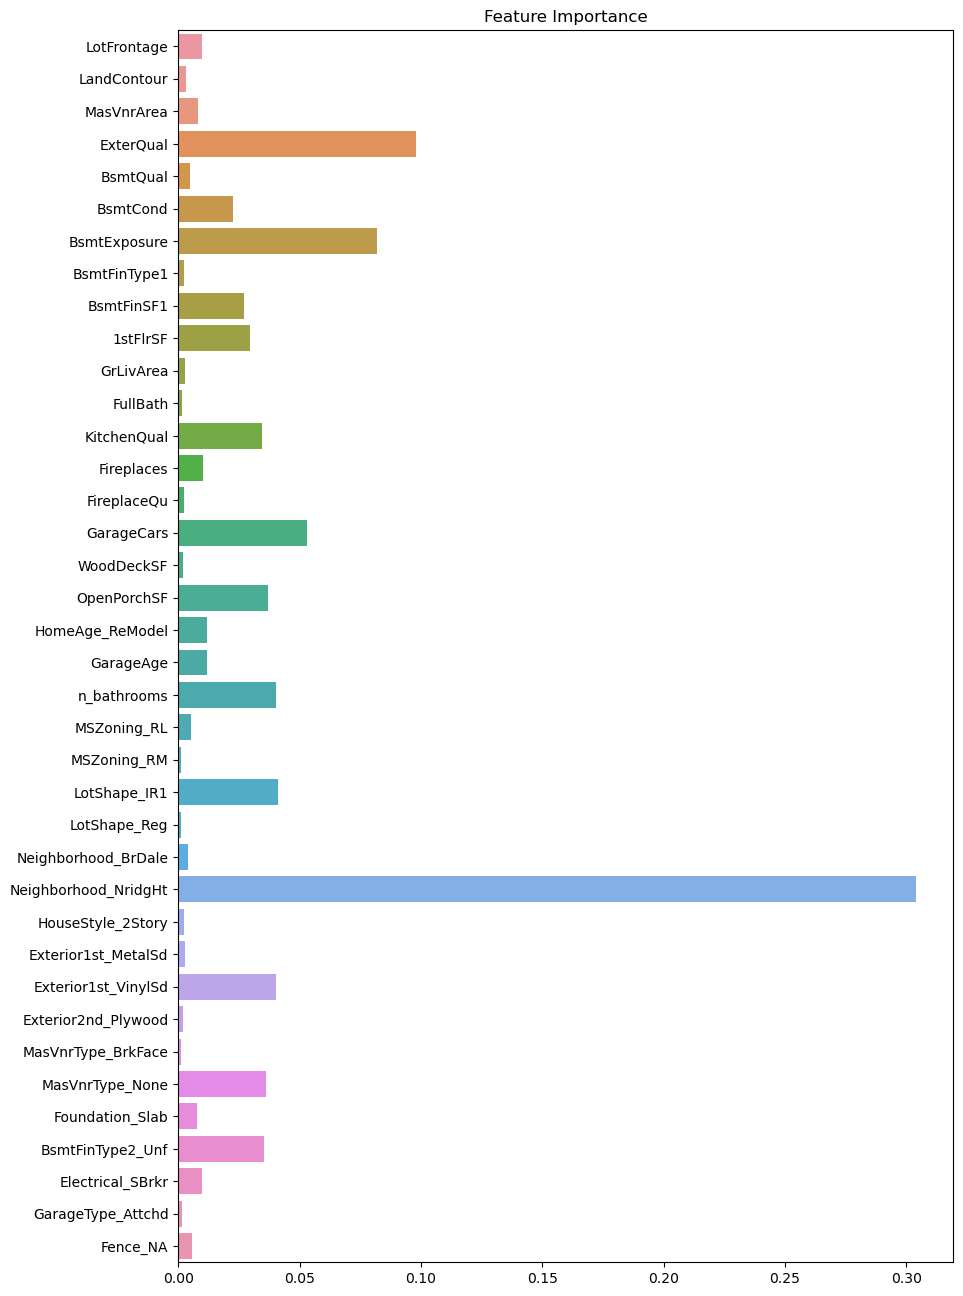

In [104]:
values = best_etr.feature_importances_
plt.figure(figsize=(10,16))

sns.barplot(y=X_train.columns[values>0.001], x=values[values>0.001]).set(title='Feature Importance')
plt.show()

# KNeighborsRegressor

In [105]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_jobs=-1)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='r2', n_iter=200, cv=5, random_state=42)

random_search.fit(X_train, y_train)

#Predict from the test set

best_knn = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

evaluate(y_test,y_pred)

Best estimator: KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                    n_jobs=-1, n_neighbors=7, weights='distance')
Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}
R2 score: 0.854449898134195
Mean squared error: 30207.33231509359
Mean absolute error: 20366.849849223207


### Results


#### for df_cor_dum

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                    n_jobs=-1, n_neighbors=7, weights='distance')

0.8299842803385342

Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}

R2 score: 0.8437443228835393

Mean squared error: 31298.535663041253

Mean absolute error: 20808.740658473056

#### for df_pca_dum

KNeighborsRegressor(algorithm='brute', leaf_size=50, n_jobs=-1,
                    weights='distance')

0.7985008267055028

Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 50, 'algorithm': 'brute'}

R2 score: 0.8437724287223693

Mean squared error: 31295.720689609345

Mean absolute error: 21309.889518649168

#### for df_fs_dum

KNeighborsRegressor(algorithm='kd_tree', metric='manhattan', n_jobs=-1, p=1,
                    weights='distance')

0.8544844429366105

Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}

R2 score: 0.8171574503875468

Mean squared error: 33856.70978053404

Mean absolute error: 24333.62236505962


#### for df_dum

KNeighborsRegressor(algorithm='kd_tree', metric='manhattan', n_jobs=-1, p=1,
                    weights='distance')

0.8296298485079088

Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}

R2 score: 0.8584926307395742

Mean squared error: 29784.86562065431

Mean absolute error: 19941.7951789203

#### for df_le
KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                    n_jobs=-1, n_neighbors=7, weights='distance')


0.8281304626834969


Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}


R2 score: 0.8298287868486869


Mean squared error: 32662.480537474134


Mean absolute error: 22293.926364691353

Changing train and test dataset to normal train and test dataset

In [106]:
train=df_dum.loc[df_cor["SalePrice"].notnull()]
test=df_dum.loc[df_cor["SalePrice"].isnull()]
X_train=train.drop("SalePrice",axis=1)
y_train=train["SalePrice"]
X_test=test.drop("SalePrice",axis=1)

In [107]:
X_train.shape,y_train.shape,X_test.shape

((1101, 236), (1101,), (1459, 236))

In [108]:
algos=[best_lin,best_rid,best_las,best_ela,best_svr,best_tree,best_ran,best_etr,best_gdr,best_knn]
algonames=["Linear","Ridge","Lasso","Elastic","SVR","DecisonTree","RAndomFor","ExtreTree","GradientBoost","KNneighbour"]

In [109]:
for i,algo in enumerate(algos):
    algo.fit(X_train, y_train)
    data=algo.predict(X_test)
    sub["SalePrice"]=data
    sub.to_csv(f"{algonames[i]}.csv",index=False)

### Results

#### for df_fs_dum
linear score: 0.37851

ridge score: 0.38088

lasso score: 0.38362

elastic score: 0.39064

SVR score: 0.45598

decisontree score: 0.27437

randomfor score: 0.25367

ExtraTree score: 0.31774

gradient score: 0.31107

KNN score: 0.20701




#### for df_cor_dum
linear score:      0.16704

ridge score:       0.14741

lasso score:       0.15161

elastic score:     0.14764

SVR score:         0.1525

decisontree score: 0.25757

randomfor score:   0.18005

ExtraTree score:   0.24906

gradient score:    0.14098

KNN score:         0.16968


#### for df_pca_dum
linear score:      0.20618

ridge score:       0.14888

lasso score:       0.1582

elastic score:     0.15711

SVR score:         0.1525

decisontree score: 0.38951

randomfor score:   0.29795

ExtraTree score:   0.38737

gradient score:    0.23008

KNN score:         0.19511


#### for df_dum

linear score: 0.1612

ridge score: 0.14894

lasso score: 0.14977

elastic score: 0.14949

SVR score: 0.144

decisontree score: 0.2306

randomfor score: 0.19343

ExtraTree score: 0.27196

gradient score: 0.1361

KNN score: 0.18937


#### for df_le
linear score: 0.36376

ridge score: 0.16462

lasso score: 0.16562

elastic score: 0.16522

SVR score: 0.16365

decisontree score: 0.2314

randomfor score: 0.16923

ExtraTree score: 0.24288

gradient score: 0.13769

KNN score: 0.19372


## Predicting using Deeplearning

In [110]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


In [112]:
train=df_dum.loc[df_cor["SalePrice"].notnull()] # df_le df_dum df_cor df_pca df_fs
test= df_dum.loc[df_cor["SalePrice"].isnull()]
X_train=train.drop("SalePrice",axis=1)
y_train=train["SalePrice"]
X_test=test.drop("SalePrice",axis=1)

In [113]:
n_feas=X_train.shape[1]
X_train.shape,y_train.shape,X_test.shape

((1101, 236), (1101,), (1459, 236))

# Just dense deep learning


In [114]:
model = Sequential()
model.add(Dense(n_feas, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="Adam", loss="mse")
model.fit(x=X_train, y=y_train, batch_size=128, epochs=1500, verbose=1)


Epoch 1/1500
9/9 [==============================] - 2s 6ms/step - loss: 35868495872.0000
Epoch 2/1500
9/9 [==============================] - 0s 5ms/step - loss: 35865759744.0000
Epoch 3/1500
9/9 [==============================] - 0s 5ms/step - loss: 35859562496.0000
Epoch 4/1500
9/9 [==============================] - 0s 5ms/step - loss: 35843842048.0000
Epoch 5/1500
9/9 [==============================] - 0s 5ms/step - loss: 35804454912.0000
Epoch 6/1500
9/9 [==============================] - 0s 5ms/step - loss: 35712512000.0000
Epoch 7/1500
9/9 [==============================] - 0s 5ms/step - loss: 35516751872.0000
Epoch 8/1500
9/9 [==============================] - 0s 5ms/step - loss: 35134017536.0000
Epoch 9/1500
9/9 [==============================] - 0s 5ms/step - loss: 34430881792.0000
Epoch 10/1500
9/9 [==============================] - 0s 5ms/step - loss: 33196113920.0000
Epoch 11/1500
9/9 [==============================] - 0s 5ms/step - loss: 31191293952.0000
Epoch 12/1500
9/9 [

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 236)               55932     
                                                                 
 dense_1 (Dense)             (None, 64)                15168     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73,853
Trainable params: 73,853
Non-traina

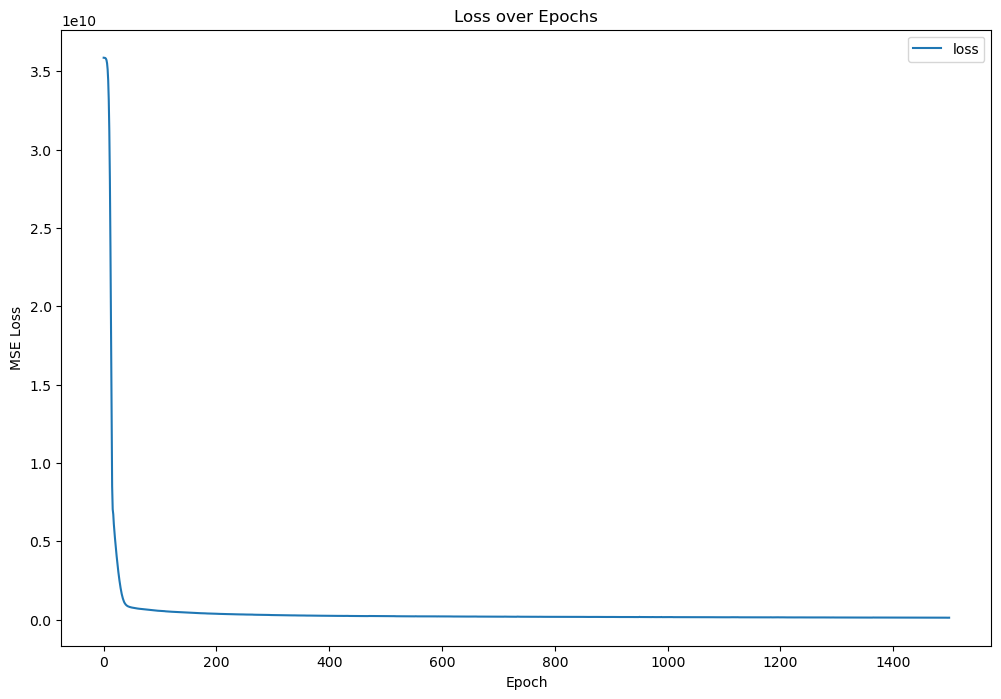

In [116]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')

plt.savefig("losofdeep.png")

In [117]:
y_pred=model.predict(X_test)
sub["SalePrice"]=y_pred
sub.to_csv("Jdense_DL.csv",index=False)

46/46 [==============================] - 0s 2ms/step


#  Regularization+ DeepLearning

In [118]:
model = Sequential()
model.add(Dense(n_feas, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(32, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
#model.add(Dropout(0.2))  # Add dropout with a rate of 0.2 (20% dropout rate)
model.add(Dense(16, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
#model.add(BatchNormalization())
model.add(Dense(8, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1))

model.compile(optimizer="Adam", loss="mse")
model.fit(x=X_train, y=y_train, batch_size=128, epochs=1500, verbose=1)


Epoch 1/1500
9/9 [==============================] - 1s 5ms/step - loss: 35867566080.0000
Epoch 2/1500
9/9 [==============================] - 0s 4ms/step - loss: 35863044096.0000
Epoch 3/1500
9/9 [==============================] - 0s 4ms/step - loss: 35851894784.0000
Epoch 4/1500
9/9 [==============================] - 0s 4ms/step - loss: 35827335168.0000
Epoch 5/1500
9/9 [==============================] - 0s 4ms/step - loss: 35774148608.0000
Epoch 6/1500
9/9 [==============================] - 0s 4ms/step - loss: 35664871424.0000
Epoch 7/1500
9/9 [==============================] - 0s 5ms/step - loss: 35452354560.0000
Epoch 8/1500
9/9 [==============================] - 0s 4ms/step - loss: 35053703168.0000
Epoch 9/1500
9/9 [==============================] - 0s 4ms/step - loss: 34360037376.0000
Epoch 10/1500
9/9 [==============================] - 0s 5ms/step - loss: 33163786240.0000
Epoch 11/1500
9/9 [==============================] - 0s 4ms/step - loss: 31283027968.0000
Epoch 12/1500
9/9 [

In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 236)               55932     
                                                                 
 dense_7 (Dense)             (None, 64)                15168     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 73,853
Trainable params: 73,853
Non-trai

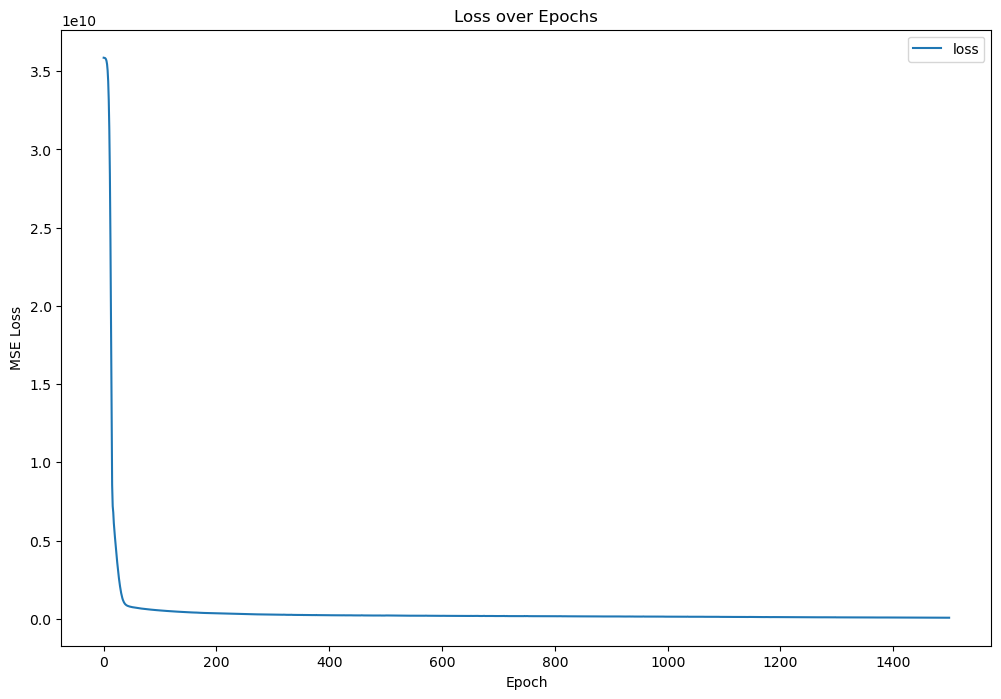

In [120]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.savefig("losofregdeeep.png")

In [121]:
y_pred=model.predict(X_test)
sub["SalePrice"]=y_pred
sub.to_csv("Regula_DL.csv",index=False)

46/46 [==============================] - 0s 2ms/step


epoch=1500

batch_size=128

### Results


#### df_le
Just Dense DL: score 0.14399

Regula +DL: score 0.14233

#### df_dum

Just Dense DL: score 0.14951

Regula +DL: score 0.15258

#### df_corr_dum
Just Dense DL: score 0.14176

Regula+ DL: score 0.14375

#### df_pca_dum
Just Dense DL: score 0.18914

Regula+ DL: score 0.18515
 
 
#### df_fs_dum
Just Dense DL: score 0.15536

Regula + DL: score 0.16472



# Voting

In [122]:
from sklearn.ensemble import VotingRegressor

In [123]:
voting_regressor = VotingRegressor([('linear', best_lin), 
                                    ('ridge', best_rid), 
                                    ('lasso', best_las), 
                                    ('decisiontree', best_tree), 
                                    ('elastic', best_ela), 
                                    ('extratree', best_etr), 
                                    ('Gradient', best_gdr), 
                                    ('knn', best_knn), 
                                    ('Ran', best_ran), 
                                    ('svr', best_svr)])
# Fit the VotingRegressor on the training data
voting_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_regressor.predict(X_test)


sub["SalePrice"]=y_pred
sub.to_csv("voting.csv",index=False) 

In [124]:
voting_regressor = VotingRegressor([('linear', best_lin), 
                                    ('ridge', best_rid), 
                                    ('lasso', best_las), 
                                    #('decisiontree', best_tree), 
                                    ('elastic', best_ela), 
                                    #('extratree', best_etr), 
                                    ('Gradient', best_gdr), 
                                    ('knn', best_knn), 
                                    ('Ran', best_ran), 
                                    ('svr', best_svr)])

# Fit the VotingRegressor on the training data
voting_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_regressor.predict(X_test)


sub["SalePrice"]=y_pred
sub.to_csv("voting_without_dtree_extre.csv",index=False) 

In [125]:
voting_regressor = VotingRegressor([('linear', best_lin), 
                                    ('ridge', best_rid), 
                                    ('lasso', best_las), 
                                    #('decisiontree', best_tree), 
                                    ('elastic', best_ela), 
                                    #('extratree', best_etr), 
                                    ('Gradient', best_gdr), 
                                    ('knn', best_knn), 
                                    #('Ran', best_ran), 
                                    ('svr', best_svr)])
# Fit the VotingRegressor on the training data
voting_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_regressor.predict(X_test)


sub["SalePrice"]=y_pred
sub.to_csv("voting_withouttrees_ran_extr_dtre.csv",index=False) 

### Results


#### for df_cor_dum
all score: 0.14113

without dtree etr score: 0.13309

without random dtree etr score: 0.13569

#### for df_pca_dum
all score: 0.17195

without random dtree etr grd score: 0.13969

without random dtree etr grd lin knn score: 0.15098

#### for df_dum
all score: 0.14

**without random dtree etr score: 0.13191**

without random dtree etr knn score: 0.1367

#### for df_le
all score: 0.14261

without lin dtree etr score: 0.13604

without lin dtree etr knn score: 0.138

![](best.jpg)

## Feature Importance Totally

#### Decision Tree

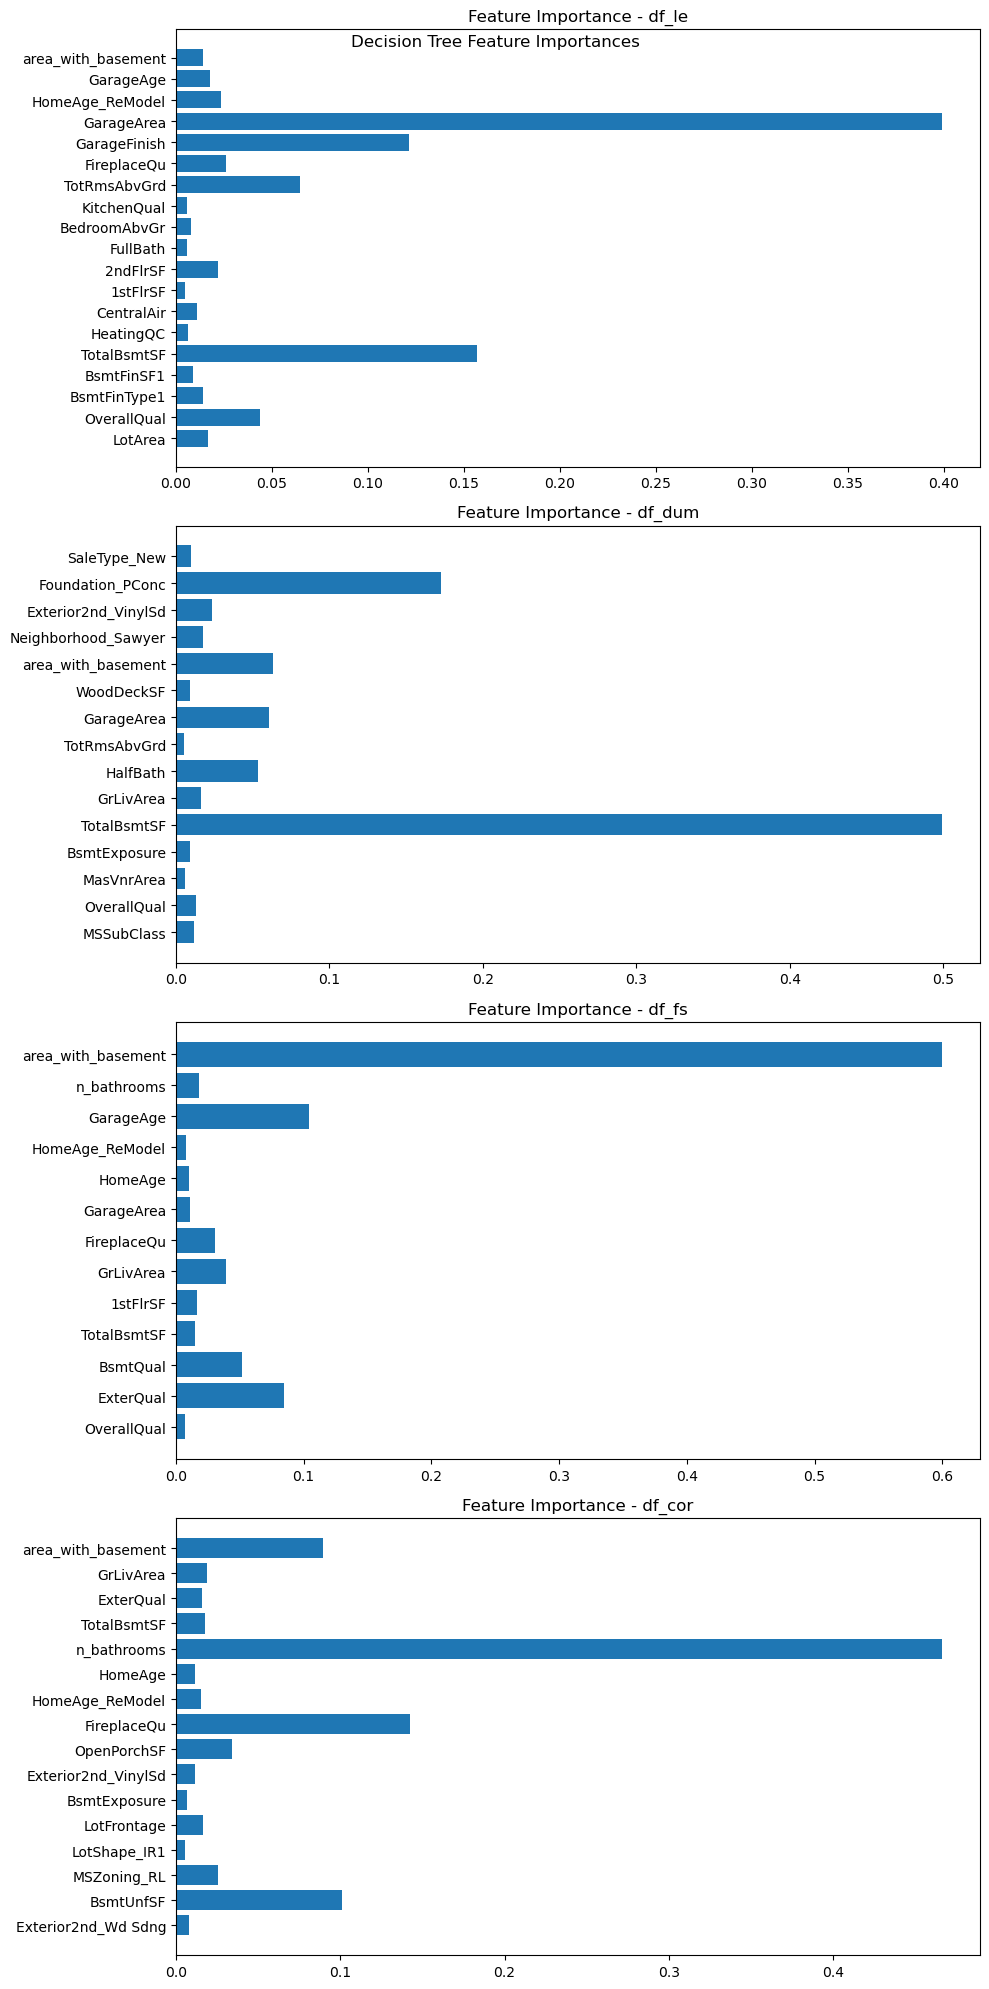

In [126]:
# Train-test split for each dataframe/model
train_le = df_le.loc[df_le["SalePrice"].notnull()] 
test_le = df_le.loc[df_le["SalePrice"].isnull()]
X_train_le = train_le.drop("SalePrice", axis=1)
y_train_le = train_le["SalePrice"]
X_test_le = test_le.drop("SalePrice", axis=1)

train_dum = df_dum.loc[df_dum["SalePrice"].notnull()] 
test_dum = df_dum.loc[df_dum["SalePrice"].isnull()]
X_train_dum = train_dum.drop("SalePrice", axis=1)
y_train_dum = train_dum["SalePrice"]
X_test_dum = test_dum.drop("SalePrice", axis=1)


train_cor = df_cor.loc[df_cor["SalePrice"].notnull()] 
test_cor = df_cor.loc[df_cor["SalePrice"].isnull()]
X_train_cor = train_cor.drop("SalePrice", axis=1)
y_train_cor = train_cor["SalePrice"]
X_test_cor = test_cor.drop("SalePrice", axis=1)

train_fs = df_fs.loc[df_fs["SalePrice"].notnull()] 
test_fs = df_fs.loc[df_fs["SalePrice"].isnull()]
X_train_fs = train_fs.drop("SalePrice", axis=1)
y_train_fs = train_fs["SalePrice"]
X_test_fs = test_fs.drop("SalePrice", axis=1)

# Models
best_treele = DecisionTreeRegressor(max_depth=19, max_features='log2', min_samples_leaf=8, min_samples_split=7, random_state=42)
best_treedum = DecisionTreeRegressor(max_depth=7, max_features='log2', min_samples_leaf=5, min_samples_split=3, random_state=42)
best_treecor = DecisionTreeRegressor(max_depth=7, max_features='log2', min_samples_leaf=17, min_samples_split=10, random_state=42)
best_treefs = DecisionTreeRegressor(max_depth=9, max_features='log2', min_samples_leaf=8, min_samples_split=4, random_state=42)

# Fit models and retrieve feature importances
best_treele.fit(X_train_le, y_train_le)
feature_importance_le = best_treele.feature_importances_

best_treedum.fit(X_train_dum, y_train_dum)
feature_importance_dum = best_treedum.feature_importances_



best_treecor.fit(X_train_cor, y_train_cor)
feature_importance_cor = best_treecor.feature_importances_

best_treefs.fit(X_train_fs, y_train_fs)
feature_importance_fs = best_treefs.feature_importances_

# Plotting
# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot feature importance for model with df_le
axs[0].barh(y=X_train_le.columns[feature_importance_le > 0.005], width=feature_importance_le[feature_importance_le > 0.005])
axs[0].set_title('Feature Importance - df_le')

# Plot feature importance for model with df_dum
axs[1].barh(y=X_train_dum.columns[feature_importance_dum > 0.005], width=feature_importance_dum[feature_importance_dum > 0.005])
axs[1].set_title('Feature Importance - df_dum')

# Plot feature importance for model with df_pca

# Plot feature importance for model with df_cor
axs[3].barh(y=X_train_cor.columns[feature_importance_cor > 0.005], width=feature_importance_cor[feature_importance_cor > 0.005])
axs[3].set_title('Feature Importance - df_cor')

# Plot feature importance for model with df_fs
axs[2].barh(y=X_train_fs.columns[feature_importance_fs > 0.005], width=feature_importance_fs[feature_importance_fs > 0.005])
axs[2].set_title('Feature Importance - df_fs')

# Adjust spacing between subplots
plt.tight_layout()

plt.suptitle("Decision Tree Feature Importances")
# Save the figure
plt.savefig("featrees.png")

# Show the plot
plt.show()


####  Random Forest

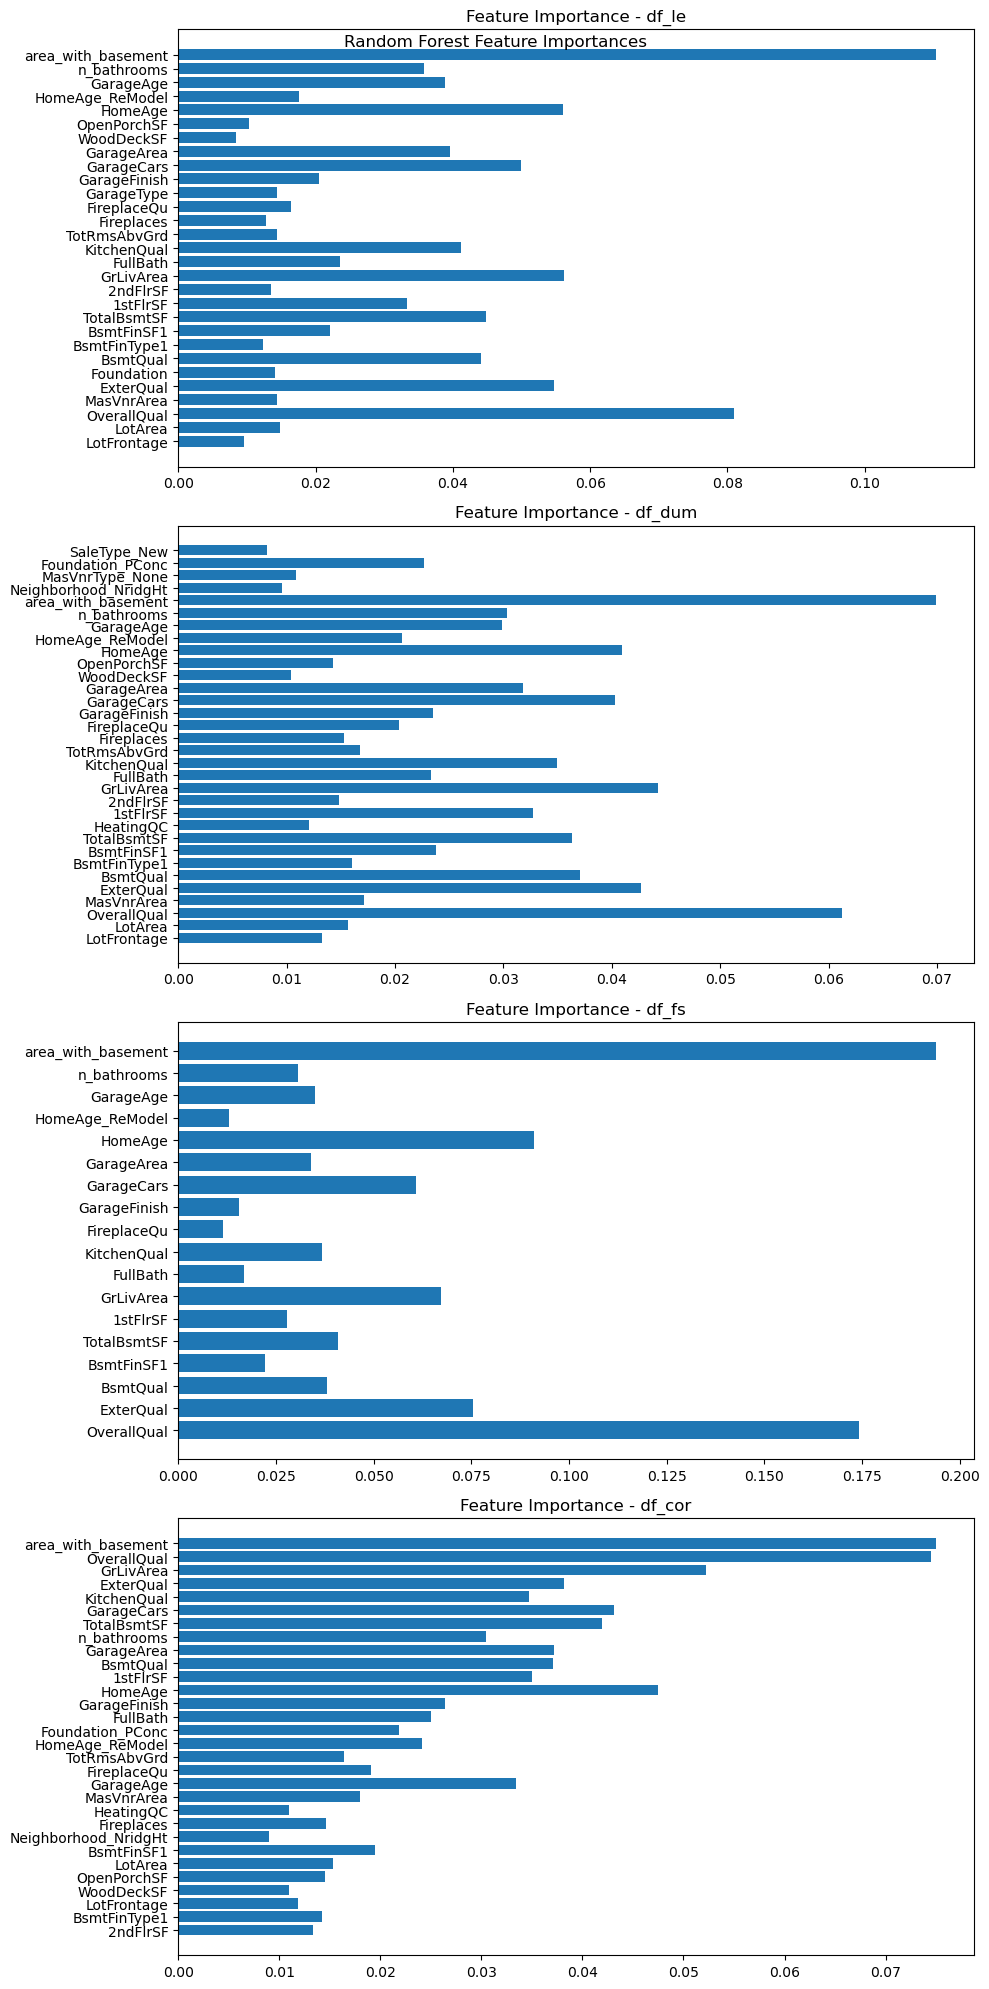

In [127]:
# Models from evaluated above
best_treele = RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5, n_estimators=1580, n_jobs=-1, random_state=42)
best_treedum = RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5, n_estimators=1580, n_jobs=-1, random_state=42)
best_treecor = RandomForestRegressor(max_depth=28, max_features='log2', min_samples_leaf=5, min_samples_split=8, n_estimators=1161, n_jobs=-1, random_state=42)
best_treefs = RandomForestRegressor(max_depth=28, max_features='log2', min_samples_leaf=5, min_samples_split=8, n_estimators=1161, n_jobs=-1, random_state=42)

# Fit models and retrieve feature importances
best_treele.fit(X_train_le, y_train_le)
feature_importance_le = best_treele.feature_importances_

best_treedum.fit(X_train_dum, y_train_dum)
feature_importance_dum = best_treedum.feature_importances_

best_treecor.fit(X_train_cor, y_train_cor)
feature_importance_cor = best_treecor.feature_importances_

best_treefs.fit(X_train_fs, y_train_fs)
feature_importance_fs = best_treefs.feature_importances_

# Plotting
# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot feature importance for model with df_le
axs[0].barh(y=X_train_le.columns[feature_importance_le > 0.008], width=feature_importance_le[feature_importance_le > 0.008])
axs[0].set_title('Feature Importance - df_le')

# Plot feature importance for model with df_dum
axs[1].barh(y=X_train_dum.columns[feature_importance_dum > 0.008], width=feature_importance_dum[feature_importance_dum > 0.008])
axs[1].set_title('Feature Importance - df_dum')

# Plot feature importance for model with df_cor
axs[3].barh(y=X_train_cor.columns[feature_importance_cor > 0.008], width=feature_importance_cor[feature_importance_cor > 0.008])
axs[3].set_title('Feature Importance - df_cor')

# Plot feature importance for model with df_fs
axs[2].barh(y=X_train_fs.columns[feature_importance_fs > 0.008], width=feature_importance_fs[feature_importance_fs > 0.008])
axs[2].set_title('Feature Importance - df_fs')

# Adjust spacing between subplots
plt.tight_layout()

plt.suptitle("Random Forest Feature Importances")
# Save the figure
plt.savefig("ranfeas.png")

# Show the plot
plt.show()


####  Gradient Boosting Regressor

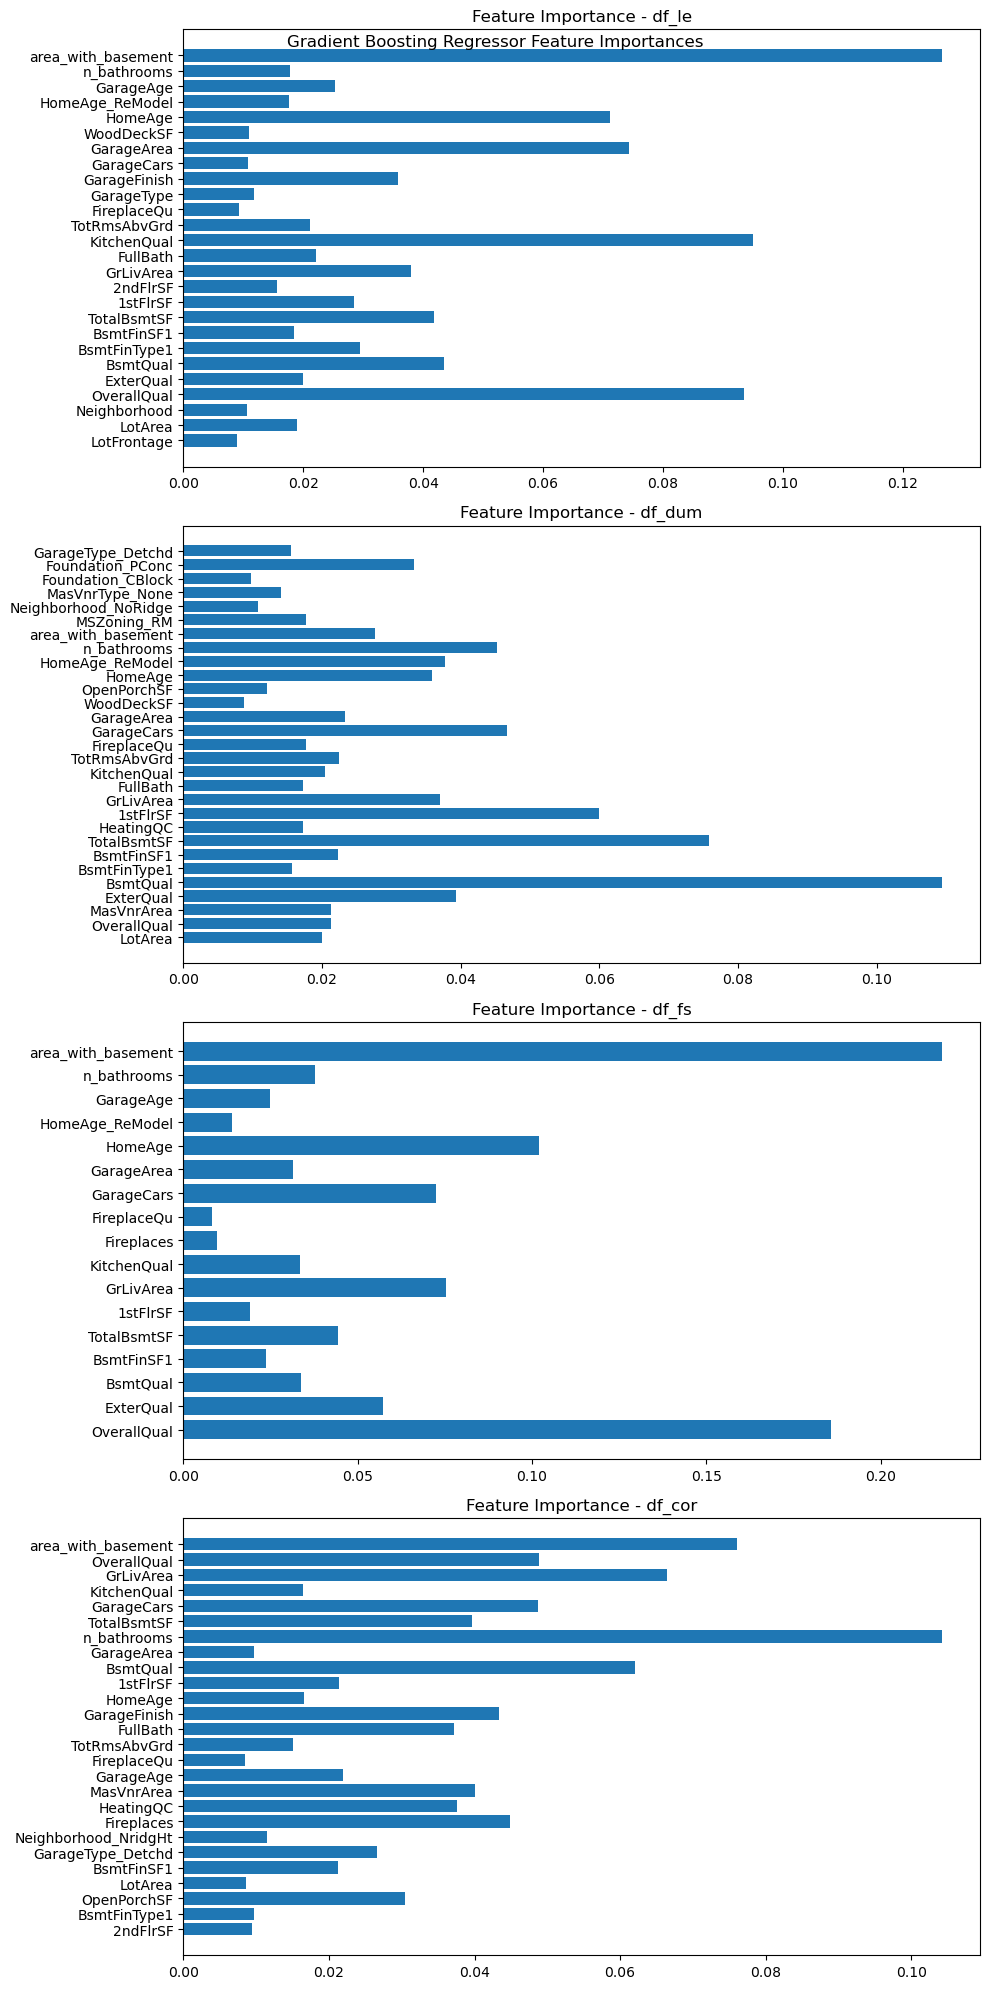

In [128]:
# Models from evaluated above
best_treele = GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=6, min_samples_split=12, random_state=42)
best_treedum = GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=10, min_samples_split=12, n_estimators=300, random_state=42)
best_treecor = GradientBoostingRegressor(max_features='log2', min_samples_split=10, n_estimators=300, random_state=42)
best_treefs = GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=8, min_samples_split=10, random_state=42)

# Fit models and retrieve feature importances
best_treele.fit(X_train_le, y_train_le)
feature_importance_le = best_treele.feature_importances_

best_treedum.fit(X_train_dum, y_train_dum)
feature_importance_dum = best_treedum.feature_importances_

best_treecor.fit(X_train_cor, y_train_cor)
feature_importance_cor = best_treecor.feature_importances_

best_treefs.fit(X_train_fs, y_train_fs)
feature_importance_fs = best_treefs.feature_importances_

# Plotting
# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot feature importance for model with df_le
axs[0].barh(y=X_train_le.columns[feature_importance_le > 0.008], width=feature_importance_le[feature_importance_le > 0.008])
axs[0].set_title('Feature Importance - df_le')

# Plot feature importance for model with df_dum
axs[1].barh(y=X_train_dum.columns[feature_importance_dum > 0.008], width=feature_importance_dum[feature_importance_dum > 0.008])
axs[1].set_title('Feature Importance - df_dum')


# Plot feature importance for model with df_cor
axs[3].barh(y=X_train_cor.columns[feature_importance_cor > 0.008], width=feature_importance_cor[feature_importance_cor > 0.008])
axs[3].set_title('Feature Importance - df_cor')

# Plot feature importance for model with df_fs
axs[2].barh(y=X_train_fs.columns[feature_importance_fs > 0.008], width=feature_importance_fs[feature_importance_fs > 0.008])
axs[2].set_title('Feature Importance - df_fs')

# Adjust spacing between subplots
plt.tight_layout()

plt.suptitle("Gradient Boosting Regressor Feature Importances")
# Save the figure
plt.savefig("GradientBoostingRegressor.png")

# Show the plot
plt.show()


#### Extra Trees Regressor

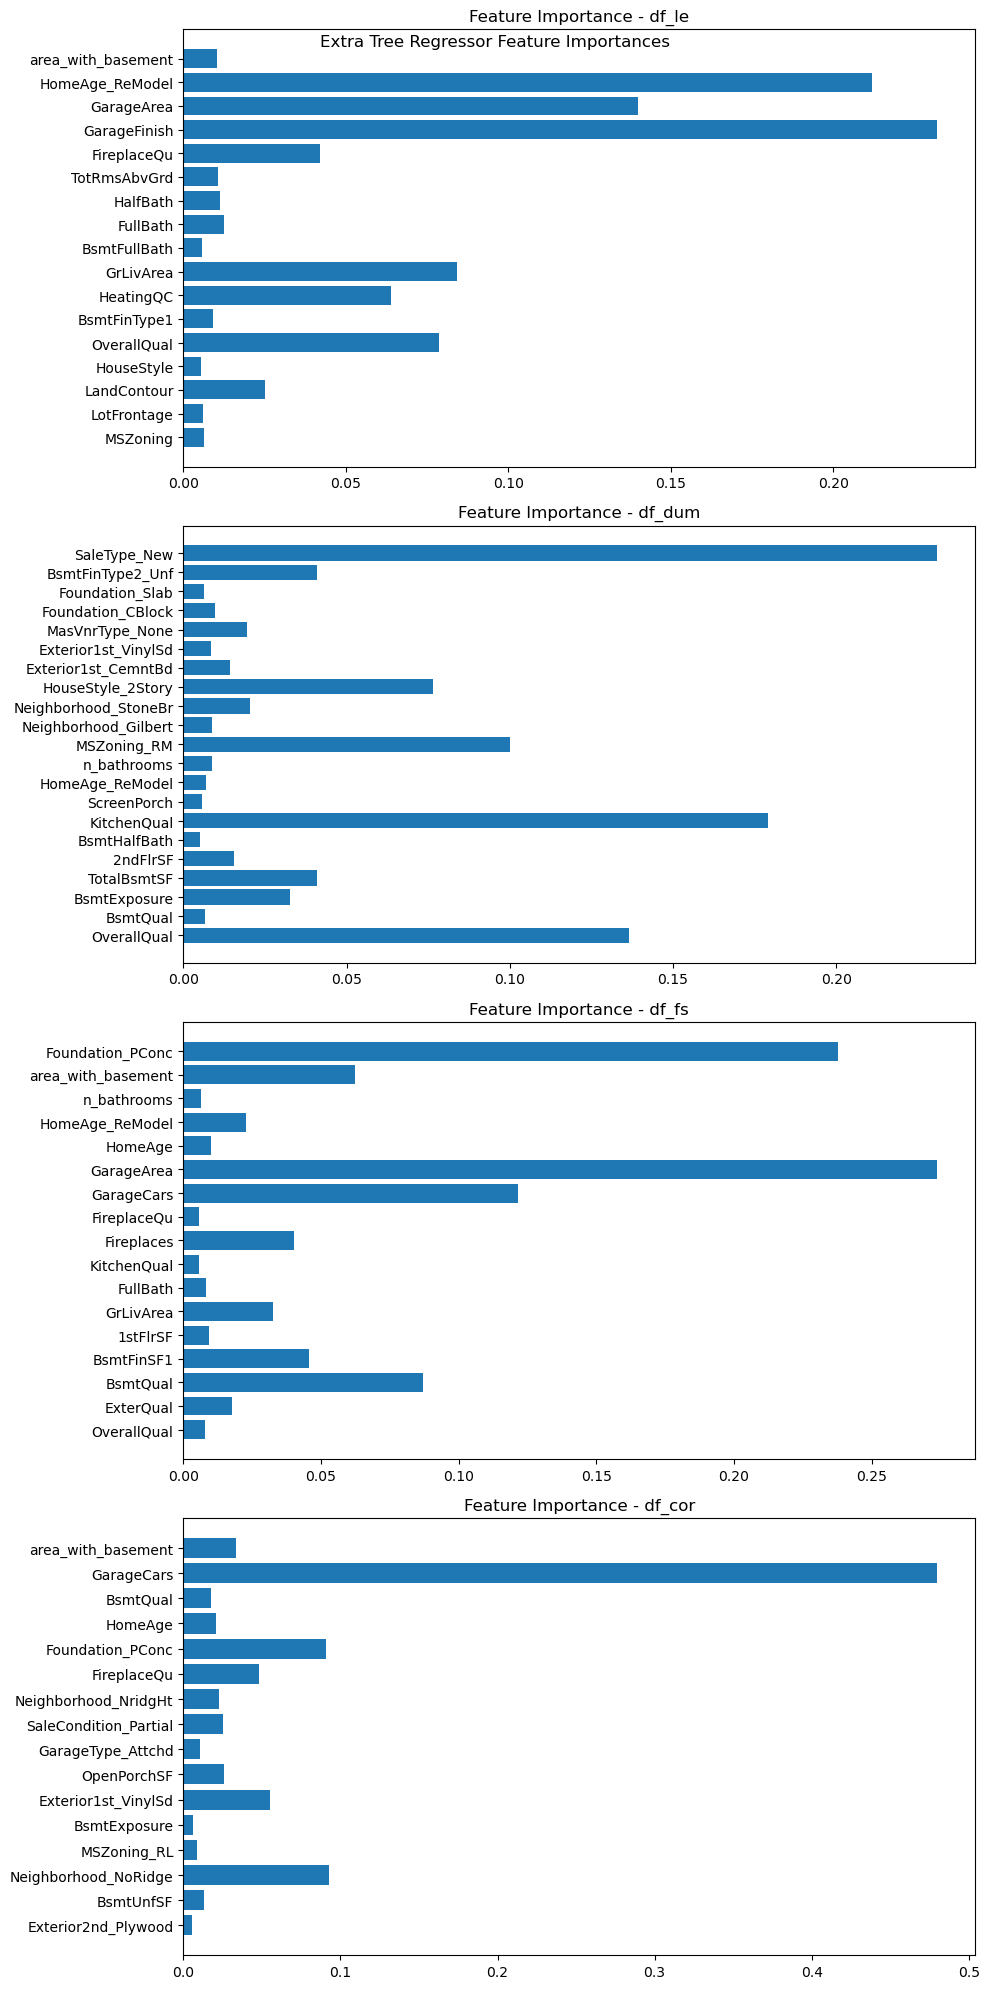

In [129]:

# Models from evaluated above
best_treele = ExtraTreeRegressor(max_depth=16, max_features='log2', min_samples_leaf=5, min_samples_split=4, random_state=42)
best_treedum = ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5, min_samples_split=8, random_state=42)
best_treecor = ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5, min_samples_split=8, random_state=42)
best_treefs = ExtraTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=5, min_samples_split=8, random_state=42)

# Fit models and retrieve feature importances
best_treele.fit(X_train_le, y_train_le)
feature_importance_le = best_treele.feature_importances_

best_treedum.fit(X_train_dum, y_train_dum)
feature_importance_dum = best_treedum.feature_importances_

best_treecor.fit(X_train_cor, y_train_cor)
feature_importance_cor = best_treecor.feature_importances_

best_treefs.fit(X_train_fs, y_train_fs)
feature_importance_fs = best_treefs.feature_importances_

# Plotting
# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot feature importance for model with df_le
axs[0].barh(y=X_train_le.columns[feature_importance_le > 0.005], width=feature_importance_le[feature_importance_le > 0.005])
axs[0].set_title('Feature Importance - df_le')

# Plot feature importance for model with df_dum
axs[1].barh(y=X_train_dum.columns[feature_importance_dum > 0.005], width=feature_importance_dum[feature_importance_dum > 0.005])
axs[1].set_title('Feature Importance - df_dum')


# Plot feature importance for model with df_cor
axs[3].barh(y=X_train_cor.columns[feature_importance_cor > 0.005], width=feature_importance_cor[feature_importance_cor > 0.005])
axs[3].set_title('Feature Importance - df_cor')

# Plot feature importance for model with df_fs
axs[2].barh(y=X_train_fs.columns[feature_importance_fs > 0.005], width=feature_importance_fs[feature_importance_fs > 0.005])
axs[2].set_title('Feature Importance - df_fs')

# Adjust spacing between subplots
plt.tight_layout()

plt.suptitle("Extra Tree Regressor Feature Importances")
# Save the figure
plt.savefig("etcfeas.png")

# Show the plot
plt.show()
